In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import optuna
import shap
from sklearn.preprocessing import MinMaxScaler
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance
import miceforest as mf

import sys
!{sys.executable} -m pip install eli5

import sys
!{sys.executable} -m pip install optuna

import sys
!{sys.executable} -m pip install eli5

import sys
!{sys.executable} -m pip install mlxtend

In [37]:
df = pd.read_excel("dr_above18.xls")

In [38]:
#data exploring

In [39]:
df.head()

,sex,age,duration,hbp,sbp,dbp,hb1ac,uric,bun,urea,...,ddimer,VitB12,utp,ualb,ucr,UACR,UPCR,eGFR,DRstage,drornot
0,1,43,10,1,125,84,8.6,421.0,6.13,135.14,...,390,452,4051.69,2207.83,7.51,2598.830519,4769.232969,54.936252,2,2
1,2,46,17,1,114,78,9.9,485.0,5.50,70.40,...,220,180,106.24,46.64,4.34,94.999447,216.396682,88.899905,4,2
2,1,51,15,1,105,70,12.8,645.0,6.80,73.40,...,330,462,499.67,290.72,9.57,268.543866,461.555152,101.862717,5,2
3,1,24,1,2,136,94,10.5,512.0,5.57,65.14,...,280,230,742.15,377.95,22.01,151.798183,298.073876,129.328786,1,1
4,1,64,16,2,159,79,6.2,379.0,11.60,202.00,...,700,0,4788.29,2201.24,5.25,3706.468876,8062.568305,29.156890,1,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       424 non-null    int64  
 1   age       424 non-null    int64  
 2   duration  424 non-null    int64  
 3   hbp       424 non-null    int64  
 4   sbp       424 non-null    int64  
 5   dbp       424 non-null    int64  
 6   hb1ac     419 non-null    float64
 7   uric      416 non-null    float64
 8   bun       424 non-null    float64
 9   urea      424 non-null    float64
 10  NEFA      424 non-null    float64
 11  HDL       424 non-null    float64
 12  LDL       424 non-null    float64
 13  TRIG      424 non-null    float64
 14  CHOL      424 non-null    float64
 15  Lpa       424 non-null    int64  
 16  APOA      424 non-null    float64
 17  APOB      424 non-null    float64
 18  ALT       424 non-null    int64  
 19  AST       424 non-null    int64  
 20  ChE       424 non-null    int64 

In [41]:
df.shape

(424, 33)

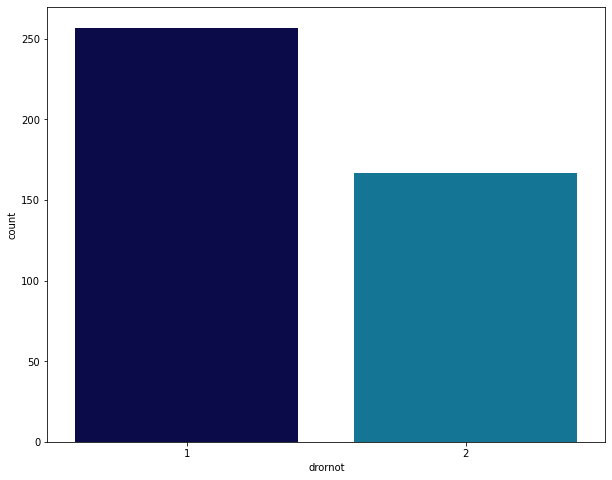

In [42]:
plt.figure(figsize=(10,8))
sns.countplot(x = "drornot", data=df, palette= 'ocean');

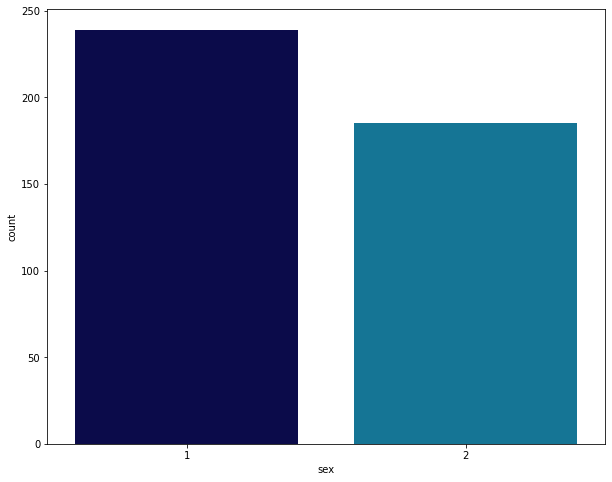

In [43]:
plt.figure(figsize=(10,8))
sns.countplot(x = "sex", data=df, palette= 'ocean');

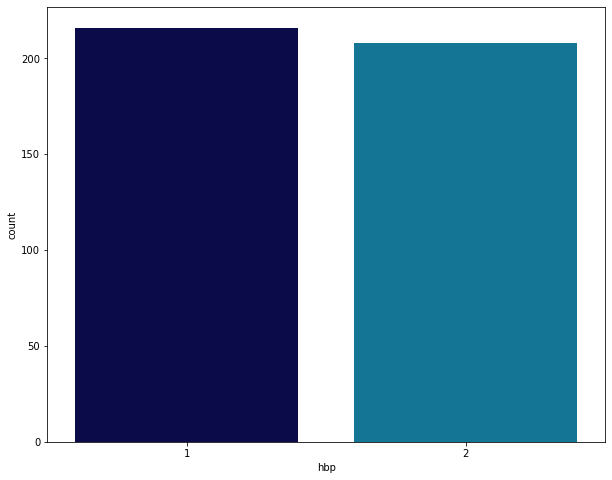

In [44]:
plt.figure(figsize=(10,8))
sns.countplot(x = "hbp", data=df, palette= 'ocean');

In [45]:
# check distribution of target variable
df.drornot.value_counts()

1    257
2    167
Name: drornot, dtype: int64

In [46]:
# check distribution of binary features
df.sex.value_counts()

1    239
2    185
Name: sex, dtype: int64

In [47]:
# check distribution of binary features
df.hbp.value_counts()

1    216
2    208
Name: hbp, dtype: int64

In [48]:
df.replace(0, np.nan, inplace=True)

In [49]:
df = df.drop(columns=['DRstage'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       424 non-null    int64  
 1   age       424 non-null    int64  
 2   duration  424 non-null    int64  
 3   hbp       424 non-null    int64  
 4   sbp       424 non-null    int64  
 5   dbp       424 non-null    int64  
 6   hb1ac     419 non-null    float64
 7   uric      416 non-null    float64
 8   bun       424 non-null    float64
 9   urea      424 non-null    float64
 10  NEFA      406 non-null    float64
 11  HDL       423 non-null    float64
 12  LDL       423 non-null    float64
 13  TRIG      423 non-null    float64
 14  CHOL      422 non-null    float64
 15  Lpa       389 non-null    float64
 16  APOA      389 non-null    float64
 17  APOB      389 non-null    float64
 18  ALT       424 non-null    int64  
 19  AST       424 non-null    int64  
 20  ChE       423 non-null    float6

In [51]:
df['sex'].replace(1,0, inplace=True)
df['sex'].replace(2,1, inplace=True)
df['hbp'].replace(1,0, inplace=True)
df['hbp'].replace(2,1, inplace=True)
df['drornot'].replace(1,0, inplace=True)
df['drornot'].replace(2,1, inplace=True)

In [52]:
# check distribution of binary features
df.sex.value_counts()

0    239
1    185
Name: sex, dtype: int64

In [53]:
# check distribution of binary features
df.hbp.value_counts()

0    216
1    208
Name: hbp, dtype: int64

In [54]:
# check distribution of target variable
df.drornot.value_counts()

0    257
1    167
Name: drornot, dtype: int64

In [55]:
features = df.columns.tolist()
Continuous_features = df.columns.tolist()
Continuous_features.remove('sex')
Continuous_features.remove('hbp')
Continuous_features.remove('drornot')
Continuous_features
Categorical_features = ['sex', 'hbp']
print(Continuous_features)
print(Categorical_features)

['age', 'duration', 'sbp', 'dbp', 'hb1ac', 'uric', 'bun', 'urea', 'NEFA', 'HDL', 'LDL', 'TRIG', 'CHOL', 'Lpa', 'APOA', 'APOB', 'ALT', 'AST', 'ChE', 'ALB', 'TP', 'ddimer', 'VitB12', 'utp', 'ualb', 'ucr', 'UACR', 'UPCR', 'eGFR']
['sex', 'hbp']


In [56]:
# imputing my data by random forest
# Create kernel. 
kds = mf.KernelDataSet(
  df,
  save_all_iterations=True,
  random_state=0
)

# Run the MICE algorithm for 3 iterations
kds.mice(3)

# Return the completed kernel data
df = kds.complete_data()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       424 non-null    int64  
 1   age       424 non-null    int64  
 2   duration  424 non-null    int64  
 3   hbp       424 non-null    int64  
 4   sbp       424 non-null    int64  
 5   dbp       424 non-null    int64  
 6   hb1ac     424 non-null    float64
 7   uric      424 non-null    float64
 8   bun       424 non-null    float64
 9   urea      424 non-null    float64
 10  NEFA      424 non-null    float64
 11  HDL       424 non-null    float64
 12  LDL       424 non-null    float64
 13  TRIG      424 non-null    float64
 14  CHOL      424 non-null    float64
 15  Lpa       424 non-null    float64
 16  APOA      424 non-null    float64
 17  APOB      424 non-null    float64
 18  ALT       424 non-null    int64  
 19  AST       424 non-null    int64  
 20  ChE       424 non-null    float6

# Descriptive statistical analysis

from sklearn.impute import KNNImputer
KI = KNNImputer(n_neighbors=5, weights='uniform')
df_transformed=KI.fit_transform(df)
df_transformed = pd.DataFrame(df_transformed)
for i in range(33):
    df_transformed.rename(columns={i:df.columns[i]},inplace=True)
df_transformed

In [58]:
# normality test for continuous variable of the first imputated dataset

In [59]:
from scipy.stats import shapiro

In [60]:
stat, p = shapiro(df['age'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.990, p=0.005


In [61]:
def normality(df, features):
    normal_features =[]
    Non_normal_features = []
    for feature in features:
        stat, p = shapiro(df[feature])
        print(feature, 'Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p >= alpha:
            normal_features.append(feature)
        else:
            Non_normal_features.append(feature)
    return normal_features, Non_normal_features
        

In [62]:
normal_features, Non_normal_features = normality(df,Continuous_features)
print(normal_features)
print(Non_normal_features)

age Statistics=0.990, p=0.005
duration Statistics=0.896, p=0.000
sbp Statistics=0.984, p=0.000
dbp Statistics=0.992, p=0.019
hb1ac Statistics=0.971, p=0.000
uric Statistics=0.988, p=0.001
bun Statistics=0.108, p=0.000
urea Statistics=0.587, p=0.000
NEFA Statistics=0.951, p=0.000
HDL Statistics=0.863, p=0.000
LDL Statistics=0.988, p=0.001
TRIG Statistics=0.250, p=0.000
CHOL Statistics=0.924, p=0.000
Lpa Statistics=0.725, p=0.000
APOA Statistics=0.930, p=0.000
APOB Statistics=0.989, p=0.003
ALT Statistics=0.398, p=0.000
AST Statistics=0.345, p=0.000
ChE Statistics=0.996, p=0.311
ALB Statistics=0.927, p=0.000
TP Statistics=0.973, p=0.000
ddimer Statistics=0.253, p=0.000
VitB12 Statistics=0.853, p=0.000
utp Statistics=0.419, p=0.000
ualb Statistics=0.408, p=0.000
ucr Statistics=0.589, p=0.000
UACR Statistics=0.406, p=0.000
UPCR Statistics=0.363, p=0.000
eGFR Statistics=0.839, p=0.000
['ChE']
['age', 'duration', 'sbp', 'dbp', 'hb1ac', 'uric', 'bun', 'urea', 'NEFA', 'HDL', 'LDL', 'TRIG', 'CH

In [63]:
df[df['drornot'] == 1]['age']

0      43
1      46
2      51
5      59
10     47
       ..
417    68
418    62
420    72
422    78
423    59
Name: age, Length: 167, dtype: int64

In [64]:
df[df['drornot'] == 0]['age']

3      24
4      64
6      32
7      39
8      64
       ..
411    80
413    41
416    78
419    62
421    81
Name: age, Length: 257, dtype: int64

In [65]:
df['duration'].std()

7.778840857872678

In [68]:
char2 = df[Continuous_features].describe().transpose()
char2

,count,mean,std,min,25%,50%,75%,max
age,424.0,59.000000,13.423983,19.000000,49.000000,60.000000,68.000000,92.000000
duration,424.0,9.766509,7.778841,1.000000,3.000000,10.000000,15.000000,59.000000
sbp,424.0,138.436321,21.172392,92.000000,124.000000,136.000000,152.000000,204.000000
dbp,424.0,80.179245,11.958002,50.000000,72.000000,80.000000,88.000000,127.000000
hb1ac,424.0,9.727948,2.348055,5.200000,7.900000,9.400000,11.200000,16.300000
uric,424.0,369.474788,111.665987,5.000000,295.000000,365.000000,435.250000,731.000000
bun,424.0,7.458939,17.225901,2.060000,4.497500,5.615000,7.400000,353.000000
urea,424.0,90.900094,64.398963,1.200000,62.682500,74.440000,91.447500,528.170000
NEFA,424.0,0.390472,0.203834,0.050000,0.237500,0.350000,0.520000,1.200000
HDL,424.0,1.028491,0.327992,0.410000,0.820000,0.980000,1.160000,3.430000


In [66]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
def mean_comparison(df, normal_features, non_normal_features):
    significant_features =[]
    insignificant_features =[]
    p_list = {}
    for feature in normal_features:
        stat, p = ttest_ind(df[df['drornot'] == 1][feature], df[df['drornot'] == 0][feature])
        print(feature, 'stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print(feature,'Probably the same distribution')
            insignificant_features.append(feature)
            p_list.update({feature: [p, df[df['drornot'] == 1][feature].mean(), df[df['drornot'] == 1][feature].std(), 
                                     df[df['drornot'] == 0][feature].mean(),df[df['drornot'] == 0][feature].std()]})
            #insignificant_features[features] = p;
        else:
            print(feature,'Probably not the same distribution')
            significant_features.append(feature)
            #significant_features[features] = p;
            p_list.update({feature: [p, df[df['drornot'] == 1][feature].mean(), df[df['drornot'] == 1][feature].std(), 
                                     df[df['drornot'] == 0][feature].mean(),df[df['drornot'] == 0][feature].std()]})
    for feature in non_normal_features:
        stat, p = mannwhitneyu(df[df['drornot'] == 1][feature], df[df['drornot'] == 0][feature])
        print(feature,'stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print(feature,'Probably the same distribution')
            insignificant_features.append(feature)
            #insignificant_features[features] = p;
            p_list.update({feature: [p, df[df['drornot'] == 1][feature].mean(), df[df['drornot'] == 1][feature].std(), 
                                     df[df['drornot'] == 0][feature].mean(),df[df['drornot'] == 0][feature].std()]})
        else:
            print(feature,'Probably not the same distribution')
            significant_features.append(feature)
            p_list.update({feature: [p, df[df['drornot'] == 1][feature].mean(), df[df['drornot'] == 1][feature].std(), 
                                     df[df['drornot'] == 0][feature].mean(),df[df['drornot'] == 0][feature].std()]})
    Char = pd.DataFrame.from_dict(p_list, orient='index', columns=['pvalue', 'mean(dr=1)', 'std(dr=1)', 'mean(dr=0)', 'std(dr=0)'])
    return significant_features, insignificant_features, Char
significant_features, insignificant_features, char = mean_comparison(df,normal_features, Non_normal_features)
print("Features show statistical significant", significant_features)
print("Features do not show statistical significant", insignificant_features)

ChE stat=-0.817, p=0.414
ChE Probably the same distribution
age stat=19477.000, p=0.054
age Probably the same distribution
duration stat=13736.500, p=0.000
duration Probably not the same distribution
sbp stat=17310.000, p=0.000
sbp Probably not the same distribution
dbp stat=21259.000, p=0.436
dbp Probably the same distribution
hb1ac stat=21440.500, p=0.494
hb1ac Probably the same distribution
uric stat=19405.500, p=0.048
uric Probably not the same distribution
bun stat=16087.500, p=0.000
bun Probably not the same distribution
urea stat=17439.500, p=0.001
urea Probably not the same distribution
NEFA stat=16140.500, p=0.000
NEFA Probably not the same distribution
HDL stat=18775.000, p=0.015
HDL Probably not the same distribution
LDL stat=18595.500, p=0.010
LDL Probably not the same distribution
TRIG stat=21438.500, p=0.493
TRIG Probably the same distribution
CHOL stat=18631.000, p=0.011
CHOL Probably not the same distribution
Lpa stat=18272.000, p=0.005
Lpa Probably not the same distrib

In [67]:
char

,pvalue,mean(dr=1),std(dr=1),mean(dr=0),std(dr=0)
ChE,4.144804e-01,8276.796407,2135.138100,8443.859922,2005.921719
age,5.390473e-02,60.413174,12.897766,58.081712,13.701802
duration,1.455421e-10,12.383234,7.274925,8.066148,7.635207
sbp,3.816561e-04,143.281437,23.305433,135.287938,19.058780
dbp,4.355434e-01,80.149701,12.471958,80.198444,11.636567
hb1ac,4.940133e-01,9.709880,2.276049,9.739689,2.398010
uric,4.789568e-02,381.798263,119.832225,361.466926,105.492668
bun,6.594827e-06,9.857246,27.159325,5.900506,2.409572
urea,5.566713e-04,111.158683,92.421082,77.735953,29.533253
NEFA,7.993300e-06,0.340120,0.190304,0.423191,0.206009


df_transformed = df_transformed.drop('DRstage',axis = 1)

In [69]:
#Correlation matrix


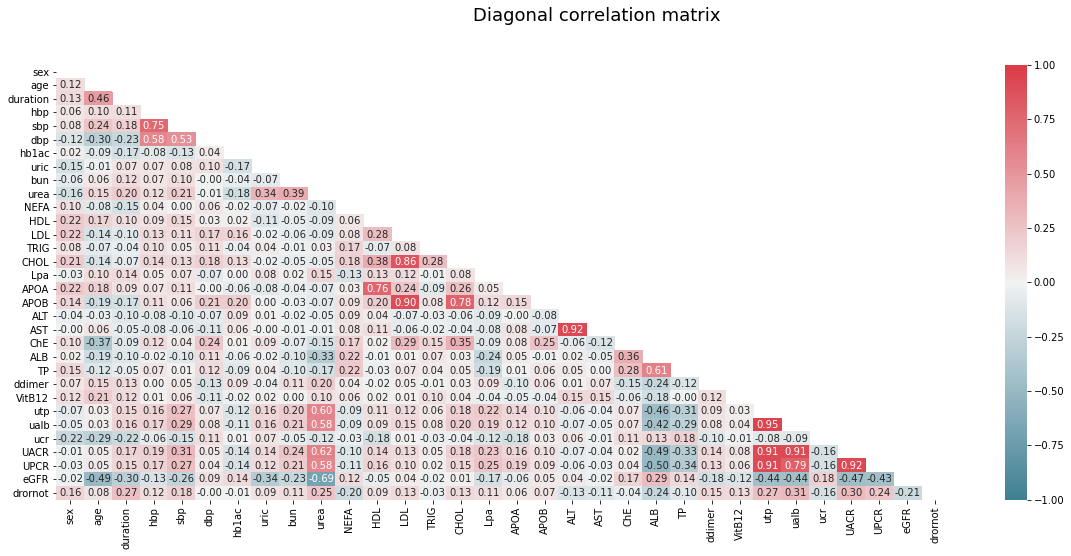

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

sns.heatmap(df.corr(), ax=ax, vmax=1, vmin=-1, center=0,
            annot=True, fmt=".2f",
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            mask=np.triu(np.ones_like(df.corr(), dtype=np.bool)))

fig.suptitle("Diagonal correlation matrix", fontsize=18);

In [71]:
df1 = df

In [287]:
#df = pd.read_excel("df_above_18_filled.xls")

num_features = df_transformed.columns.tolist()

num_features.remove('sex')
num_features.remove('drornot')
num_features_s = []
for i in range(len(num_features)):
    num_features_s.append(num_features[i]+'_s')
#sc = StandardScaler()
#df_transformed[num_features_s] = sc.fit_transform(df_transformed[num_features])
#df_transformed.head()

In [72]:
features = df.columns.tolist()

In [73]:
# spliting the train set and the test set

In [74]:
df

,sex,age,duration,hbp,sbp,dbp,hb1ac,uric,bun,urea,...,TP,ddimer,VitB12,utp,ualb,ucr,UACR,UPCR,eGFR,drornot
0,0,43,10,0,125,84,8.6,421.0,6.13,135.14,...,60.6,390.0,452.0,4051.69,2207.83,7.51,2598.830519,4769.232969,54.936252,1
1,1,46,17,0,114,78,9.9,485.0,5.50,70.40,...,60.8,220.0,180.0,106.24,46.64,4.34,94.999447,216.396682,88.899905,1
2,0,51,15,0,105,70,12.8,645.0,6.80,73.40,...,66.0,330.0,462.0,499.67,290.72,9.57,268.543866,461.555152,101.862717,1
3,0,24,1,1,136,94,10.5,512.0,5.57,65.14,...,72.5,280.0,230.0,742.15,377.95,22.01,151.798183,298.073876,129.328786,0
4,0,64,16,1,159,79,6.2,379.0,11.60,202.00,...,47.8,700.0,452.0,4788.29,2201.24,5.25,3706.468876,8062.568305,29.156890,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,0,62,1,0,136,71,9.4,463.0,4.10,49.20,...,52.9,2630.0,517.0,106.24,4.63,2.08,19.677500,451.520000,111.137447,0
420,1,72,15,0,118,59,7.8,465.0,15.93,307.25,...,59.1,2850.0,766.0,1766.55,670.39,2.93,2022.610102,5329.795904,12.471520,1
421,1,81,2,1,161,98,13.4,372.0,6.30,57.20,...,61.1,500.0,259.0,129.82,23.66,4.40,47.535091,260.820182,83.385930,0
422,0,78,17,1,169,95,10.3,620.0,23.10,212.40,...,63.6,1540.0,1107.0,571.94,304.72,6.34,424.877729,797.468391,24.869707,1


In [75]:

X = df.copy()
y = X['drornot']
X=X.drop(['drornot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=0)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_train.head()


,sex,age,duration,hbp,sbp,dbp,hb1ac,uric,bun,urea,...,ALB,TP,ddimer,VitB12,utp,ualb,ucr,UACR,UPCR,eGFR
0,0,38,2,0,127,81,10.9,405.0,5.71,64.54,...,41.2,71.4,320.0,484.0,87.16,17.42,15.68,9.820969,49.138673,117.662048
1,0,53,1,1,145,87,10.1,262.0,8.20,110.10,...,43.4,68.1,350.0,304.0,90.35,15.53,11.78,11.654092,67.800849,65.606731
2,0,68,19,1,163,83,8.2,482.0,5.35,75.34,...,42.5,67.9,380.0,357.0,60.20,16.67,4.75,31.023747,112.035368,89.432637
3,0,34,1,1,139,92,11.2,423.0,4.50,89.50,...,33.9,56.4,260.0,309.0,72.52,5.14,3.22,14.111056,199.092174,96.311799
4,0,53,5,0,116,77,12.3,260.0,3.74,55.68,...,32.4,59.2,310.0,288.0,68.63,9.08,7.56,10.617354,80.249894,112.520707


In [76]:
features.remove('drornot')


In [77]:
features

['sex',
 'age',
 'duration',
 'hbp',
 'sbp',
 'dbp',
 'hb1ac',
 'uric',
 'bun',
 'urea',
 'NEFA',
 'HDL',
 'LDL',
 'TRIG',
 'CHOL',
 'Lpa',
 'APOA',
 'APOB',
 'ALT',
 'AST',
 'ChE',
 'ALB',
 'TP',
 'ddimer',
 'VitB12',
 'utp',
 'ualb',
 'ucr',
 'UACR',
 'UPCR',
 'eGFR']

## RandomForest models by grid search
def decision_rf(df, rf):
    df= df.dropna()
    print(df.shape)
    X = df.drop('drornot', axis=1)
    y = df['drornot']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
    
   
    estimator = RandomForestClassifier()
    
    #grid search and crossvalidation
    param_dict = {"n_estimators": [100, 120 , 200, 300, 500, 800, 1200],
                 "max_depth": [5,8,15,25,30]}
    estimator = GridSearchCV(estimator, param_grid=param_dict, cv=10)
    estimator.fit(x_train, y_train)
    
    y_predict = estimator.predict(x_test)
    print("y_predict:\n", y_predict)
    
    score = estimator.score(x_test, y_test)
    rf.append(estimator)
    print("accuracy: \n", score)
    
    #print best parameter
    print("best parameter: \n", estimator.best_params_)
    #print best score
    print("best score: \n", estimator.best_score_)
    #print best estimator
    print("best estimator: \n", estimator.best_estimator_)
    #print cv result
    print("cv result: \n", estimator.cv_results_)
    return rf
rf = []
rf = decision_rf(df_transformed,rf)

feature_imp = pd.DataFrame(sorted(zip(np.mean(imp, axis=0), features), reverse=True), columns=["values", "features"])

In [ ]:
##

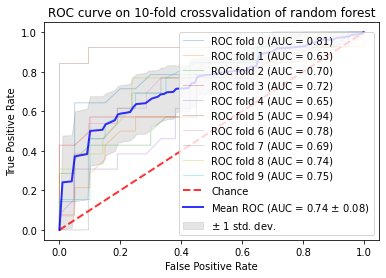

Out-of-fold accuracy: 0.7286135693215339
Out-of-fold F1 score: 0.5964912280701754
Test accuracy:        0.7764705882352941
Test F1 score:        0.6666666666666667


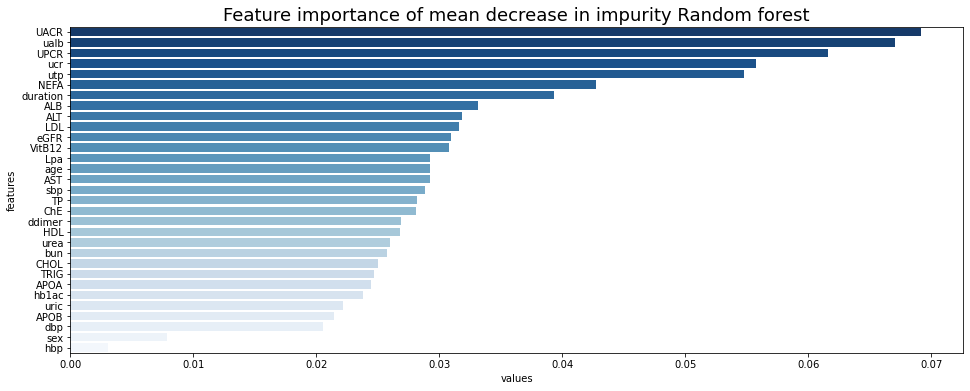

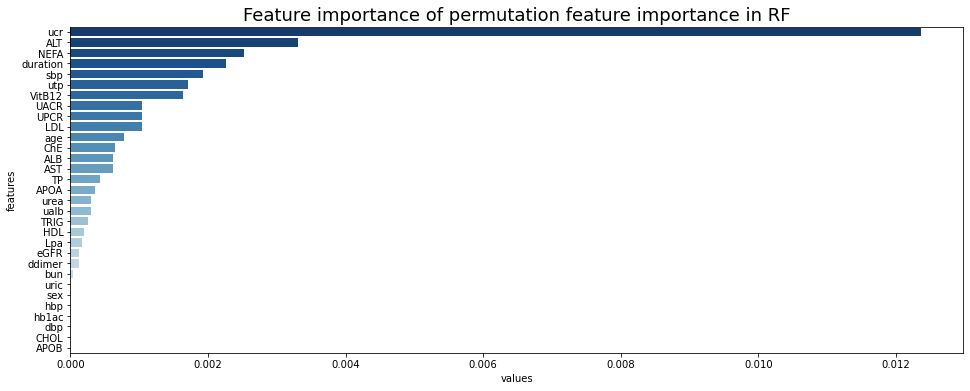

In [78]:
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
NFOLD = 10
skf = StratifiedKFold(n_splits=NFOLD)
models = []
imp = np.zeros((NFOLD, len(features)))
perimp = np.zeros((31))
oof = np.zeros((len(X_train), ))
y_preds = np.zeros((len(X_test), NFOLD))
#roc curve
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

for fold_id, (tr_idx, va_idx) in enumerate(skf.split(X_train, y_train)):
    # print(f"FOLD {fold_id+1}")
    X_tr, X_va = X_train[features].iloc[tr_idx], X_train[features].iloc[va_idx]
    y_tr, y_va = y_train.iloc[tr_idx], y_train.iloc[va_idx]
    
    clf = RandomForestClassifier(random_state = 42)
    clf.fit(X_tr, y_tr)
    oof[va_idx] = clf.predict(X_va)
    models.append(clf)
    imp[fold_id] = clf.feature_importances_
    result = permutation_importance(clf, X_tr, y_tr,n_repeats=10,
                                
                                random_state=42, n_jobs=2)
    perimp += result.importances_mean
    # for roc curve
    viz = plot_roc_curve(clf, X_va, y_va,
                         name='ROC fold {}'.format(fold_id),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve on 10-fold crossvalidation of random forest")
ax.legend(loc="lower right")
plt.show()
    
for fold_id, clf in enumerate(models):
    pred_ = clf.predict(X_test[features])
    y_preds[:, fold_id] = pred_
y_pred = np.rint(np.mean(y_preds, axis=1))

print(f"Out-of-fold accuracy: {accuracy_score(y_train, oof)}")
print(f"Out-of-fold F1 score: {f1_score(y_train, oof)}")
print(f"Test accuracy:        {accuracy_score(y_test, y_pred)}")
print(f"Test F1 score:        {f1_score(y_test, y_pred)}")

feature_imp = pd.DataFrame(sorted(zip(np.mean(imp, axis=0), features), reverse=True), columns=["values", "features"])


fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(x="values", y="features", data=feature_imp, palette="Blues_r")
plt.title("Feature importance of mean decrease in impurity Random forest", fontsize=18);

feature_perimp = pd.DataFrame(sorted(zip(perimp/10, features), reverse=True), columns=["values", "features"])
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(x="values", y="features", data=feature_perimp, palette="Blues_r")
plt.title("Feature importance of permutation feature importance in RF", fontsize=18);


In [79]:
models

[RandomForestClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 RandomForestClassifier(random_state=42)]

feature_perimp = pd.DataFrame(sorted(zip(perimp/10, features), reverse=True), columns=["values", "features"])
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(x="values", y="features", data=feature_perimp, palette="Blues_r")
plt.title("Feature importance of permutation feature importance in RF", fontsize=18);
perimp/10

In [83]:
def objective(trial):
    skf = StratifiedKFold(n_splits=NFOLD)
    models = []
    imp = np.zeros((NFOLD, len(features)))
    oof = np.zeros((len(X_train), ))
    y_preds = np.zeros((len(X_test), NFOLD))

    for fold_id, (tr_idx, va_idx) in enumerate(skf.split(X_train, y_train)):
        # print(f"FOLD {fold_id+1}")
        X_tr, X_va = X_train[features].iloc[tr_idx], X_train[features].iloc[va_idx]
        y_tr, y_va = y_train.iloc[tr_idx], y_train.iloc[va_idx]

        clf = RandomForestClassifier(random_state=42,
                                     n_estimators = trial.suggest_int("n_estimators", 20, 200),
                                     max_depth = trial.suggest_int("max_depth", 2, 32),
                                     min_samples_split = trial.suggest_int("min_samples_split", 2, 16),
                                     min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 16))
        clf.fit(X_tr, y_tr)
        oof[va_idx] = clf.predict(X_va)
        
    score = accuracy_score(y_train, oof)
    return score

study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=400)

[I 2021-04-14 01:41:48,601] A new study created in memory with name: no-name-6c31e9f2-e605-4d97-9d44-7985cd0831d8
[I 2021-04-14 01:41:51,847] Trial 0 finished with value: 0.7404129793510325 and parameters: {'n_estimators': 192, 'max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7404129793510325.
[I 2021-04-14 01:41:53,214] Trial 1 finished with value: 0.7256637168141593 and parameters: {'n_estimators': 87, 'max_depth': 29, 'min_samples_split': 5, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.7404129793510325.
[I 2021-04-14 01:41:53,740] Trial 2 finished with value: 0.7227138643067846 and parameters: {'n_estimators': 29, 'max_depth': 21, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.7404129793510325.
[I 2021-04-14 01:41:54,680] Trial 3 finished with value: 0.7315634218289085 and parameters: {'n_estimators': 56, 'max_depth': 25, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 0 with value: 0

[I 2021-04-14 01:42:43,184] Trial 34 finished with value: 0.7315634218289085 and parameters: {'n_estimators': 124, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 7 with value: 0.7492625368731564.
[I 2021-04-14 01:42:44,129] Trial 35 finished with value: 0.7374631268436578 and parameters: {'n_estimators': 58, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 7 with value: 0.7492625368731564.
[I 2021-04-14 01:42:45,841] Trial 36 finished with value: 0.7433628318584071 and parameters: {'n_estimators': 106, 'max_depth': 22, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 7 with value: 0.7492625368731564.
[I 2021-04-14 01:42:47,017] Trial 37 finished with value: 0.7345132743362832 and parameters: {'n_estimators': 70, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 7 with value: 0.7492625368731564.
[I 2021-04-14 01:42:48,526] Trial 38 finished with value: 0.7315634218289085 and parameter

[I 2021-04-14 01:43:45,673] Trial 69 finished with value: 0.7315634218289085 and parameters: {'n_estimators': 143, 'max_depth': 21, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 54 with value: 0.7522123893805309.
[I 2021-04-14 01:43:47,278] Trial 70 finished with value: 0.7345132743362832 and parameters: {'n_estimators': 104, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 54 with value: 0.7522123893805309.
[I 2021-04-14 01:43:48,753] Trial 71 finished with value: 0.7345132743362832 and parameters: {'n_estimators': 89, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 54 with value: 0.7522123893805309.
[I 2021-04-14 01:43:50,363] Trial 72 finished with value: 0.7463126843657817 and parameters: {'n_estimators': 98, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 54 with value: 0.7522123893805309.
[I 2021-04-14 01:43:51,970] Trial 73 finished with value: 0.7404129793510325 and para

[I 2021-04-14 01:44:22,892] Trial 103 finished with value: 0.7492625368731564 and parameters: {'n_estimators': 71, 'max_depth': 29, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 85 with value: 0.7581120943952803.
[I 2021-04-14 01:44:24,123] Trial 104 finished with value: 0.7433628318584071 and parameters: {'n_estimators': 72, 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 85 with value: 0.7581120943952803.
[I 2021-04-14 01:44:24,632] Trial 105 finished with value: 0.7256637168141593 and parameters: {'n_estimators': 28, 'max_depth': 24, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 85 with value: 0.7581120943952803.
[I 2021-04-14 01:44:25,400] Trial 106 finished with value: 0.7581120943952803 and parameters: {'n_estimators': 44, 'max_depth': 27, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 85 with value: 0.7581120943952803.
[I 2021-04-14 01:44:26,024] Trial 107 finished with value: 0.7463126843657817 and pa

[I 2021-04-14 01:44:58,028] Trial 137 finished with value: 0.7374631268436578 and parameters: {'n_estimators': 63, 'max_depth': 27, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 85 with value: 0.7581120943952803.
[I 2021-04-14 01:44:58,617] Trial 138 finished with value: 0.7256637168141593 and parameters: {'n_estimators': 32, 'max_depth': 30, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 85 with value: 0.7581120943952803.
[I 2021-04-14 01:44:59,512] Trial 139 finished with value: 0.7404129793510325 and parameters: {'n_estimators': 51, 'max_depth': 29, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 85 with value: 0.7581120943952803.
[I 2021-04-14 01:45:00,265] Trial 140 finished with value: 0.7492625368731564 and parameters: {'n_estimators': 42, 'max_depth': 29, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 85 with value: 0.7581120943952803.
[I 2021-04-14 01:45:01,489] Trial 141 finished with value: 0.7522123893805309 and pa

[I 2021-04-14 01:45:30,843] Trial 171 finished with value: 0.7492625368731564 and parameters: {'n_estimators': 61, 'max_depth': 26, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:45:31,911] Trial 172 finished with value: 0.7404129793510325 and parameters: {'n_estimators': 64, 'max_depth': 25, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:45:33,135] Trial 173 finished with value: 0.7522123893805309 and parameters: {'n_estimators': 72, 'max_depth': 27, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:45:34,086] Trial 174 finished with value: 0.7492625368731564 and parameters: {'n_estimators': 54, 'max_depth': 27, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:45:35,343] Trial 175 finished with value: 0.7522123893805309 an

[I 2021-04-14 01:46:03,549] Trial 205 finished with value: 0.7374631268436578 and parameters: {'n_estimators': 42, 'max_depth': 25, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:46:04,401] Trial 206 finished with value: 0.7374631268436578 and parameters: {'n_estimators': 48, 'max_depth': 26, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:46:05,187] Trial 207 finished with value: 0.7551622418879056 and parameters: {'n_estimators': 43, 'max_depth': 24, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:46:05,963] Trial 208 finished with value: 0.7227138643067846 and parameters: {'n_estimators': 43, 'max_depth': 22, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:46:06,550] Trial 209 finished with value: 0.7404129793510325 an

[I 2021-04-14 01:46:29,344] Trial 239 finished with value: 0.7138643067846607 and parameters: {'n_estimators': 39, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:46:30,174] Trial 240 finished with value: 0.7492625368731564 and parameters: {'n_estimators': 49, 'max_depth': 22, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:46:30,966] Trial 241 finished with value: 0.7581120943952803 and parameters: {'n_estimators': 44, 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:46:31,726] Trial 242 finished with value: 0.7551622418879056 and parameters: {'n_estimators': 43, 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:46:32,502] Trial 243 finished with value: 0.7404129793510325 an

[I 2021-04-14 01:46:55,438] Trial 273 finished with value: 0.7581120943952803 and parameters: {'n_estimators': 45, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:46:56,283] Trial 274 finished with value: 0.7227138643067846 and parameters: {'n_estimators': 48, 'max_depth': 25, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:46:57,026] Trial 275 finished with value: 0.7492625368731564 and parameters: {'n_estimators': 42, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:46:57,630] Trial 276 finished with value: 0.7433628318584071 and parameters: {'n_estimators': 34, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:46:58,323] Trial 277 finished with value: 0.7610619469026548 an

[I 2021-04-14 01:47:20,487] Trial 307 finished with value: 0.7581120943952803 and parameters: {'n_estimators': 44, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:47:21,212] Trial 308 finished with value: 0.7345132743362832 and parameters: {'n_estimators': 41, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:47:21,856] Trial 309 finished with value: 0.7522123893805309 and parameters: {'n_estimators': 36, 'max_depth': 27, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:47:22,767] Trial 310 finished with value: 0.7315634218289085 and parameters: {'n_estimators': 52, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:47:23,351] Trial 311 finished with value: 0.7404129793510325 an

[I 2021-04-14 01:47:45,697] Trial 341 finished with value: 0.7522123893805309 and parameters: {'n_estimators': 40, 'max_depth': 22, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:47:46,614] Trial 342 finished with value: 0.7492625368731564 and parameters: {'n_estimators': 54, 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:47:47,223] Trial 343 finished with value: 0.7433628318584071 and parameters: {'n_estimators': 34, 'max_depth': 21, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:47:47,979] Trial 344 finished with value: 0.7551622418879056 and parameters: {'n_estimators': 43, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:47:48,769] Trial 345 finished with value: 0.7404129793510325 an

[I 2021-04-14 01:48:11,023] Trial 375 finished with value: 0.7404129793510325 and parameters: {'n_estimators': 51, 'max_depth': 25, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:48:11,819] Trial 376 finished with value: 0.7581120943952803 and parameters: {'n_estimators': 45, 'max_depth': 22, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:48:12,521] Trial 377 finished with value: 0.7138643067846607 and parameters: {'n_estimators': 39, 'max_depth': 25, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:48:13,363] Trial 378 finished with value: 0.7492625368731564 and parameters: {'n_estimators': 46, 'max_depth': 21, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 164 with value: 0.7610619469026548.
[I 2021-04-14 01:48:14,131] Trial 379 finished with value: 0.7197640117994101 an

In [84]:
optuna.importance.get_param_importances(study)
study.best_params

{'n_estimators': 39,
 'max_depth': 28,
 'min_samples_split': 6,
 'min_samples_leaf': 4}

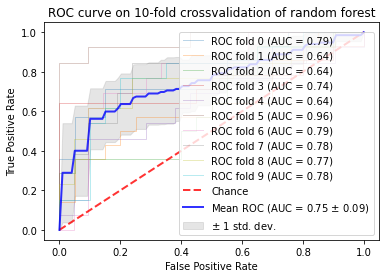

Out-of-fold accuracy: 0.7610619469026548
Out-of-fold F1 score: 0.6367713004484303
Test accuracy:        0.788235294117647
Test F1 score:        0.6785714285714286


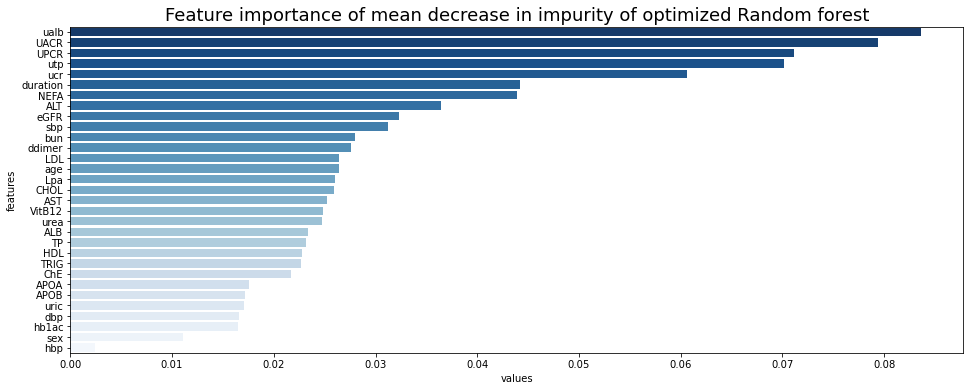

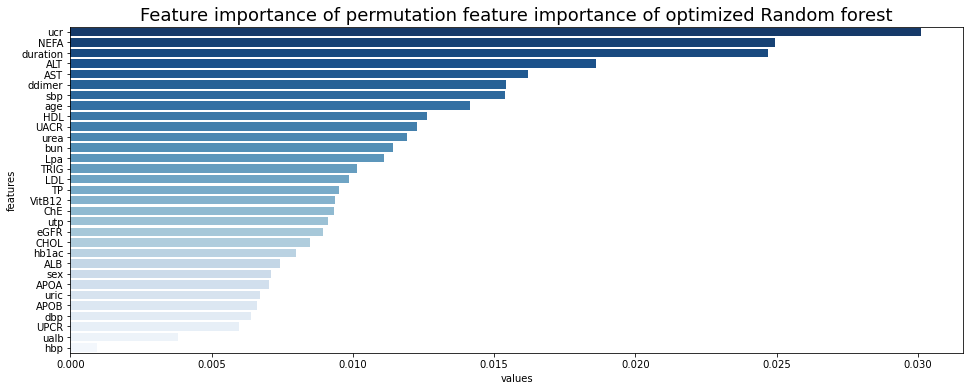

In [85]:
NFOLD = 10
skf = StratifiedKFold(n_splits=NFOLD)
models = []
imp = np.zeros((NFOLD, len(features)))
perimp = np.zeros((31))
oof = np.zeros((len(X_train), ))
y_preds = np.zeros((len(X_test), NFOLD))
#roc curve
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

for fold_id, (tr_idx, va_idx) in enumerate(skf.split(X_train, y_train)):
    # print(f"FOLD {fold_id+1}")
    X_tr, X_va = X_train[features].iloc[tr_idx], X_train[features].iloc[va_idx]
    y_tr, y_va = y_train.iloc[tr_idx], y_train.iloc[va_idx]
    
    clf = RandomForestClassifier(random_state = 42,
                                 **study.best_params)
    clf.fit(X_tr, y_tr)
    oof[va_idx] = clf.predict(X_va)
    models.append(clf)
    imp[fold_id] = clf.feature_importances_
    result = permutation_importance(clf, X_tr, y_tr,n_repeats=10,
                                
                                random_state=42, n_jobs=2)
    perimp += result.importances_mean
    # for roc curve
    viz = plot_roc_curve(clf, X_va, y_va,
                         name='ROC fold {}'.format(fold_id),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve on 10-fold crossvalidation of random forest")
ax.legend(loc="lower right")
plt.show()
    
for fold_id, clf in enumerate(models):
    pred_ = clf.predict(X_test[features])
    y_preds[:, fold_id] = pred_
y_pred = np.rint(np.mean(y_preds, axis=1))

print(f"Out-of-fold accuracy: {accuracy_score(y_train, oof)}")
print(f"Out-of-fold F1 score: {f1_score(y_train, oof)}")
print(f"Test accuracy:        {accuracy_score(y_test, y_pred)}")
print(f"Test F1 score:        {f1_score(y_test, y_pred)}")

feature_imp = pd.DataFrame(sorted(zip(np.mean(imp, axis=0), features), reverse=True), columns=["values", "features"])


fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(x="values", y="features", data=feature_imp, palette="Blues_r")
plt.title("Feature importance of mean decrease in impurity of optimized Random forest", fontsize=18);

feature_perimp = pd.DataFrame(sorted(zip(perimp/10, features), reverse=True), columns=["values", "features"])
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(x="values", y="features", data=feature_perimp, palette="Blues_r")
plt.title("Feature importance of permutation feature importance of optimized Random forest", fontsize=18);

In [86]:
# the score of feature importance
print(feature_imp)
feature_perimp

      values  features
0   0.083580      ualb
1   0.079367      UACR
2   0.071179      UPCR
3   0.070181       utp
4   0.060658       ucr
5   0.044234  duration
6   0.043913      NEFA
7   0.036418       ALT
8   0.032308      eGFR
9   0.031187       sbp
10  0.027951       bun
11  0.027558    ddimer
12  0.026415       LDL
13  0.026363       age
14  0.026042       Lpa
15  0.025949      CHOL
16  0.025182       AST
17  0.024828    VitB12
18  0.024694      urea
19  0.023352       ALB
20  0.023183        TP
21  0.022733       HDL
22  0.022711      TRIG
23  0.021657       ChE
24  0.017602      APOA
25  0.017188      APOB
26  0.017069      uric
27  0.016556       dbp
28  0.016435     hb1ac
29  0.011111       sex
30  0.002398       hbp


,values,features
0,0.030094,ucr
1,0.024941,NEFA
2,0.024681,duration
3,0.018622,ALT
4,0.016194,AST
5,0.015404,ddimer
6,0.015375,sbp
7,0.014160,age
8,0.012620,HDL
9,0.012258,UACR


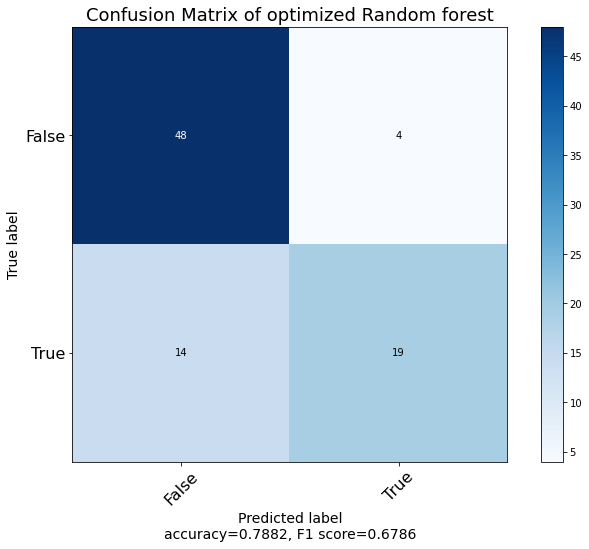

In [87]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(confusion_matrix(y_test, y_pred), figsize=(12,8), hide_ticks=True, colorbar=True, class_names=["true", "false"])

plt.title("Confusion Matrix of optimized Random forest", fontsize=18)
plt.ylabel("True label", fontsize=14)
plt.xlabel("Predicted label\naccuracy={:0.4f}, F1 score={:0.4f}".format(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)), fontsize=14)
plt.xticks(np.arange(2), [False, True], fontsize=16)
plt.yticks(np.arange(2), [False, True], fontsize=16);

In [ ]:
print()

In [88]:
rf_models = models
rf_models

[RandomForestClassifier(max_depth=28, min_samples_leaf=4, min_samples_split=6,
                        n_estimators=39, random_state=42),
 RandomForestClassifier(max_depth=28, min_samples_leaf=4, min_samples_split=6,
                        n_estimators=39, random_state=42),
 RandomForestClassifier(max_depth=28, min_samples_leaf=4, min_samples_split=6,
                        n_estimators=39, random_state=42),
 RandomForestClassifier(max_depth=28, min_samples_leaf=4, min_samples_split=6,
                        n_estimators=39, random_state=42),
 RandomForestClassifier(max_depth=28, min_samples_leaf=4, min_samples_split=6,
                        n_estimators=39, random_state=42),
 RandomForestClassifier(max_depth=28, min_samples_leaf=4, min_samples_split=6,
                        n_estimators=39, random_state=42),
 RandomForestClassifier(max_depth=28, min_samples_leaf=4, min_samples_split=6,
                        n_estimators=39, random_state=42),
 RandomForestClassifier(max_depth=

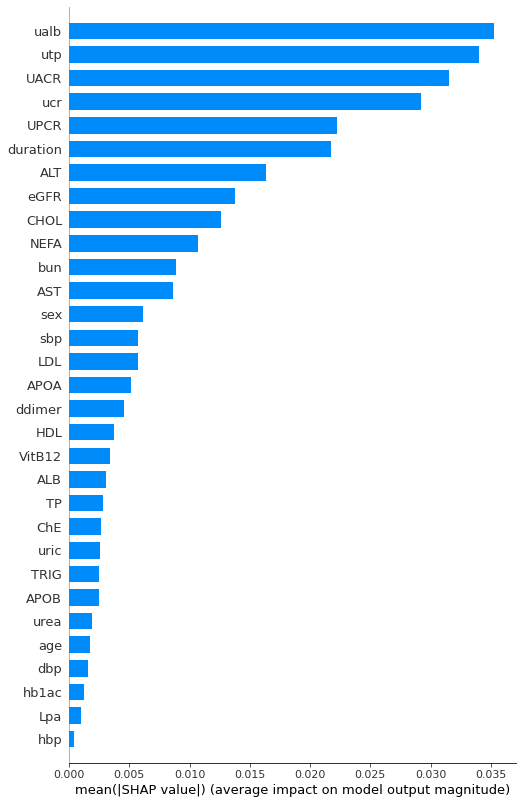

In [344]:
# load JS visualization code to notebook
shap.initjs()
# the shape values
for i in range(10):
    if i == 0:
        explainer = shap.TreeExplainer(rf_models[0])
        shap_values0 = explainer.shap_values(X_train)
        shap_values = shap_values0[0]
    else:
        explainer = shap.TreeExplainer(rf_models[i])
        shap_values0 = explainer.shap_values(X_train)
        shap_values += shap_values0[0]
shap_values = shap_values / 10.0
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar',max_display=32)


# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
rfs = models
for i in rfs:
    # predict probabilities
    lr_probs = i.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('random forest: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='randome forest')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

# GBM

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.518778
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.607383
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.468019
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.546775
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.584908
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[79]	valid_0's binary_logloss: 0.300082
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.484311
Training until validation scores don't improve f

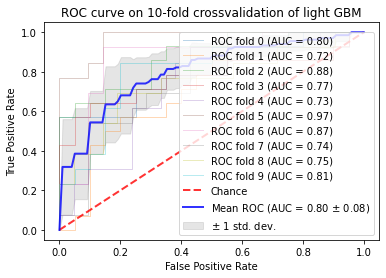

Out-of-fold accuracy: 0.7463126843657817
Out-of-fold F1 score: 0.6324786324786325
Test accuracy:        0.7647058823529411
Test F1 score:        0.6296296296296297


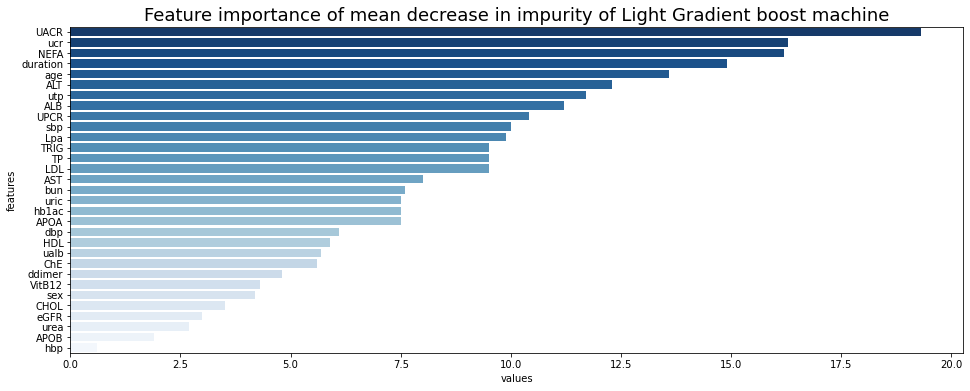

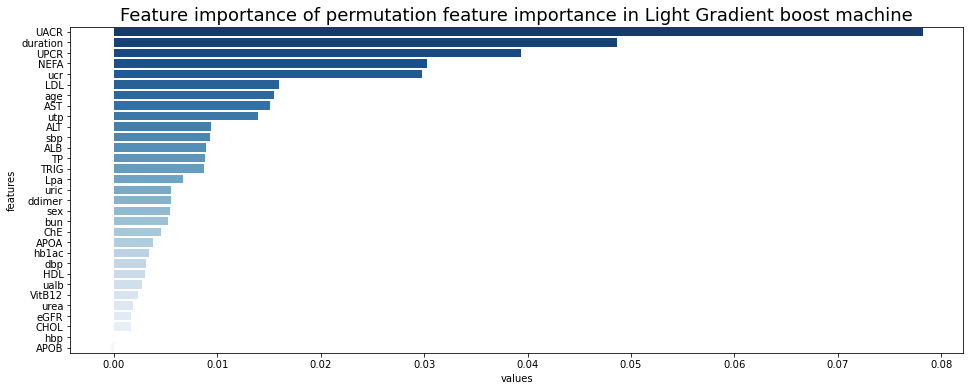

In [89]:
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
NFOLD = 10
skf = StratifiedKFold(n_splits=NFOLD)
models = []
imp = np.zeros((NFOLD, len(features)))
perimp = np.zeros((31))
oof = np.zeros((len(X_train), ))
y_preds = np.zeros((len(X_test), NFOLD))
#roc curve
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

for fold_id, (tr_idx, va_idx) in enumerate(skf.split(X_train, y_train)):
    # print(f"FOLD {fold_id+1}")
    X_tr, X_va = X_train[features].iloc[tr_idx], X_train[features].iloc[va_idx]
    y_tr, y_va = y_train.iloc[tr_idx], y_train.iloc[va_idx]
    
    
    clf = lgb.LGBMClassifier(random_state = 42,objective="binary",
                             metric="binary_logloss")
    clf.fit(X_tr, y_tr, eval_set = [(X_va, y_va)],
            early_stopping_rounds=10,
            verbose=-1)
    oof[va_idx] = clf.predict(X_va)
    models.append(clf)
    imp[fold_id] = clf.feature_importances_
    result = permutation_importance(clf, X_tr, y_tr,n_repeats=10,
                                
                                random_state=42, n_jobs=2)
    perimp += result.importances_mean
    # for roc curve
    viz = plot_roc_curve(clf, X_va, y_va,
                         name='ROC fold {}'.format(fold_id),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve on 10-fold crossvalidation of light GBM")
ax.legend(loc="lower right")
plt.show()
    
for fold_id, clf in enumerate(models):
    pred_ = clf.predict(X_test[features])
    y_preds[:, fold_id] = pred_
y_pred = np.rint(np.mean(y_preds, axis=1))

print(f"Out-of-fold accuracy: {accuracy_score(y_train, oof)}")
print(f"Out-of-fold F1 score: {f1_score(y_train, oof)}")
print(f"Test accuracy:        {accuracy_score(y_test, y_pred)}")
print(f"Test F1 score:        {f1_score(y_test, y_pred)}")

feature_imp = pd.DataFrame(sorted(zip(np.mean(imp, axis=0), features), reverse=True), columns=["values", "features"])


fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(x="values", y="features", data=feature_imp, palette="Blues_r")
plt.title("Feature importance of mean decrease in impurity of Light Gradient boost machine", fontsize=18);

feature_perimp = pd.DataFrame(sorted(zip(perimp/10, features), reverse=True), columns=["values", "features"])
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(x="values", y="features", data=feature_perimp, palette="Blues_r")
plt.title("Feature importance of permutation feature importance in Light Gradient boost machine", fontsize=18);

feature_perimp = pd.DataFrame(sorted(zip(perimp/10, features), reverse=True), columns=["values", "features"])
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(x="values", y="features", data=feature_perimp, palette="Blues_r")
plt.title("Feature importance of permutation feature importance in LightGBM", fontsize=18);
perimp/10

feature_imp_lGBM = feature_imp
feature_imp_lGBM

In [90]:
def objective(trial):
    skf = StratifiedKFold(n_splits=NFOLD)
    oof = np.zeros((len(X_train), ))

    for fold_id, (tr_idx, va_idx) in enumerate(skf.split(X_train, y_train)):
        print(f"FOLD {fold_id+1}")
        X_tr, X_va = X_train[features].iloc[tr_idx], X_train[features].iloc[va_idx]
        y_tr, y_va = y_train.iloc[tr_idx], y_train.iloc[va_idx]

        clf = lgb.LGBMClassifier(random_state = 42,
                                objective="binary",
                                 metric="binary_logloss",
                                 colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.4, 1.0),
                                 learning_rate = trial.suggest_uniform("learning_rate", 1e-8, 1.0),
                                 max_depth = trial.suggest_int("max_depth", -1, 32),
                                 min_child_samples = trial.suggest_int("min_child_samples", 3, 500),
                                 min_child_weight = trial.suggest_loguniform("min_child_weight", 1e-4, 1e+1),
                                 n_estimators = trial.suggest_int("n_estimators", 20, 200),
                                 num_leaves = trial.suggest_int("num_leaves", 2, 512),
                                 reg_alpha = trial.suggest_loguniform("reg_alpha", 1e-8, 10.0),
                                 reg_lambda = trial.suggest_loguniform("reg_lambda", 1e-8, 10.0),
                                 subsample = trial.suggest_uniform("subsample", 0.4, 1.0),
                                 subsample_freq = trial.suggest_int("subsample_freq", 0, 7),
                                )
        clf.fit(X_tr, y_tr, eval_set = [(X_va, y_va)],
                early_stopping_rounds=20,
                verbose=-1)
        oof[va_idx] = clf.predict(X_va)
        
    score = accuracy_score(y_train, oof)
    return score

study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=400)

[I 2021-04-14 01:52:52,266] A new study created in memory with name: no-name-8ef01813-747c-46d5-bbe2-d1d4439646f8


FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8

[I 2021-04-14 01:52:52,506] Trial 0 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.7292881023563949, 'learning_rate': 0.7151893692205258, 'max_depth': 2, 'min_child_samples': 254, 'min_child_weight': 0.05301709347576828, 'n_estimators': 29, 'num_leaves': 213, 'reg_alpha': 0.006502000785097662, 'reg_lambda': 8.675307976899775e-05, 'subsample': 0.9350638004692479, 'subsample_freq': 0}. Best is trial 0 with value: 0.6047197640117994.



Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.690631
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds


[I 2021-04-14 01:52:53,473] Trial 1 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.5635937767480679, 'learning_rate': 0.4776651225446987, 'max_depth': 22, 'min_child_samples': 177, 'min_child_weight': 0.0692185991020861, 'n_estimators': 185, 'num_leaves': 27, 'reg_alpha': 4.3583742877412676e-08, 'reg_lambda': 6.083642669826052e-08, 'subsample': 0.41213103846419546, 'subsample_freq': 3}. Best is trial 0 with value: 0.6047197640117994.


Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.690631
FOLD 1
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:52:53,671] Trial 2 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.9742930953718278, 'learning_rate': 0.14035078900913733, 'max_depth': -1, 'min_child_samples': 341, 'min_child_weight': 0.023336742079960365, 'n_estimators': 197, 'num_leaves': 245, 'reg_alpha': 0.0004833896150485521, 'reg_lambda': 0.012879997272918478, 'subsample': 0.8323795928355501, 'subsample_freq': 1}. Best is trial 0 with value: 0.6047197640117994.



Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Training until validation scores don't improve for 20 rounds
Early

[I 2021-04-14 01:52:53,828] Trial 3 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.4860119724454279, 'learning_rate': 0.9446689176028947, 'max_depth': 30, 'min_child_samples': 205, 'min_child_weight': 0.011838854959491772, 'n_estimators': 183, 'num_leaves': 512, 'reg_alpha': 0.09291871708031711, 'reg_lambda': 0.0001274538591583642, 'subsample': 0.7410603693211891, 'subsample_freq': 0}. Best is trial 0 with value: 0.6047197640117994.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.690631
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Trai

[I 2021-04-14 01:52:53,977] Trial 4 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.5944846046759285, 'learning_rate': 0.1496748756869345, 'max_depth': 16, 'min_child_samples': 338, 'min_child_weight': 3.258309822543473, 'n_estimators': 62, 'num_leaves': 444, 'reg_alpha': 0.0032928437320417997, 'reg_lambda': 1.3217132646113314, 'subsample': 0.45956821021538435, 'subsample_freq': 1}. Best is trial 0 with value: 0.6047197640117994.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.690631
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.494558
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.595576
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.524753
FOLD 4
Tr

[I 2021-04-14 01:52:54,137] Trial 5 finished with value: 0.7168141592920354 and parameters: {'colsample_bytree': 0.8000600292674006, 'learning_rate': 0.6706378729117808, 'max_depth': 17, 'min_child_samples': 94, 'min_child_weight': 0.5668011282865969, 'n_estimators': 119, 'num_leaves': 55, 'reg_alpha': 8.422190512637892e-06, 'reg_lambda': 2.217322368713513e-08, 'subsample': 0.780564434774401, 'subsample_freq': 6}. Best is trial 5 with value: 0.7168141592920354.



Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.63941
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.58474
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:52:54,404] Trial 6 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.4612268864488169, 'learning_rate': 0.2088767640060671, 'max_depth': 2, 'min_child_samples': 463, 'min_child_weight': 0.1843069139534015, 'n_estimators': 98, 'num_leaves': 145, 'reg_alpha': 0.0001871877915933143, 'reg_lambda': 0.0040887533238948975, 'subsample': 0.602804568903335, 'subsample_freq': 5}. Best is trial 5 with value: 0.7168141592920354.



Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.690631
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's binary_logloss: 0.550873
FOLD 2
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's binary_logloss: 0.57927
FOLD 3
Training until validation scores don't

[I 2021-04-14 01:52:54,705] Trial 7 finished with value: 0.7079646017699115 and parameters: {'colsample_bytree': 0.793797753679164, 'learning_rate': 0.13818295996678429, 'max_depth': -1, 'min_child_samples': 98, 'min_child_weight': 1.2734038226347186, 'n_estimators': 20, 'num_leaves': 371, 'reg_alpha': 0.34793984646334997, 'reg_lambda': 7.326316408987164e-08, 'subsample': 0.9858756790080374, 'subsample_freq': 2}. Best is trial 5 with value: 0.7168141592920354.
[I 2021-04-14 01:52:54,838] Trial 8 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.7057746260319401, 'learning_rate': 0.05571470314445937, 'max_depth': 20, 'min_child_samples': 204, 'min_child_weight': 0.00012587466479773425, 'n_estimators': 158, 'num_leaves': 372, 'reg_alpha': 6.550592133213938, 'reg_lambda': 1.717909082256476e-05, 'subsample': 0.6885361185016977, 'subsample_freq': 1}. Best is trial 5 with value: 0.7168141592920354.



Did not meet early stopping. Best iteration is:
[6]	valid_0's binary_logloss: 0.612398
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[16]	valid_0's binary_logloss: 0.634474
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't

[I 2021-04-14 01:52:55,024] Trial 9 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.5907899076363856, 'learning_rate': 0.41426300037204, 'max_depth': 2, 'min_child_samples': 85, 'min_child_weight': 0.06697987504844606, 'n_estimators': 168, 'num_leaves': 211, 'reg_alpha': 0.00038082078682152127, 'reg_lambda': 1.780354908138376, 'subsample': 0.9526945661423198, 'subsample_freq': 4}. Best is trial 9 with value: 0.7522123893805309.



Early stopping, best iteration is:
[66]	valid_0's binary_logloss: 0.450794
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.550822
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.567144
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.605923
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.61288
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.368619
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid_0's binary_logloss: 0.484006
FOLD 8
Training until validation scores don't improve for 20 rounds


[I 2021-04-14 01:52:55,431] Trial 10 finished with value: 0.7286135693215339 and parameters: {'colsample_bytree': 0.9638190058451039, 'learning_rate': 0.41761219371672104, 'max_depth': 7, 'min_child_samples': 8, 'min_child_weight': 0.0011942642635731867, 'n_estimators': 144, 'num_leaves': 131, 'reg_alpha': 1.2080920940950592e-06, 'reg_lambda': 8.865973672831304, 'subsample': 0.8926219624163759, 'subsample_freq': 7}. Best is trial 9 with value: 0.7522123893805309.


Early stopping, best iteration is:
[53]	valid_0's binary_logloss: 0.320587
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.520916
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.588868
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.585041
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.54196
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.515614
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.577569
FOLD 3
Training until validation scores don't improve for 20 rounds
E

[I 2021-04-14 01:52:55,740] Trial 11 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.9886352720943467, 'learning_rate': 0.3865236665616491, 'max_depth': 9, 'min_child_samples': 28, 'min_child_weight': 0.0007964989252837236, 'n_estimators': 147, 'num_leaves': 119, 'reg_alpha': 1.4920459629634705e-06, 'reg_lambda': 7.158326085011011, 'subsample': 0.9098291218947916, 'subsample_freq': 7}. Best is trial 11 with value: 0.7551622418879056.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.612978
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.491872
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.545628
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.660708
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.556834

[I 2021-04-14 01:52:56,036] Trial 12 finished with value: 0.696165191740413 and parameters: {'colsample_bytree': 0.6014329927678211, 'learning_rate': 0.345366345856159, 'max_depth': 8, 'min_child_samples': 6, 'min_child_weight': 0.0020054320812795913, 'n_estimators': 150, 'num_leaves': 126, 'reg_alpha': 1.0651440627271488e-08, 'reg_lambda': 0.38294226430845035, 'subsample': 0.9808180068674563, 'subsample_freq': 5}. Best is trial 11 with value: 0.7551622418879056.



FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.641462
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.546575
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.526337
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.530837
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.667275
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.652645
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.599292
FOL

[I 2021-04-14 01:52:56,243] Trial 13 finished with value: 0.7817109144542773 and parameters: {'colsample_bytree': 0.8990264301389786, 'learning_rate': 0.6309195041652069, 'max_depth': 9, 'min_child_samples': 88, 'min_child_weight': 0.00010711194230679391, 'n_estimators': 122, 'num_leaves': 288, 'reg_alpha': 4.321425984572378e-06, 'reg_lambda': 7.359639788949761, 'subsample': 0.8712965620315333, 'subsample_freq': 7}. Best is trial 13 with value: 0.7817109144542773.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid_0's binary_logloss: 0.455269
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.52683
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.498773
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.613995
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.618247
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.411573
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.50848
FOLD 8
T

[I 2021-04-14 01:52:56,531] Trial 14 finished with value: 0.6873156342182891 and parameters: {'colsample_bytree': 0.8863652645952425, 'learning_rate': 0.6407755216559095, 'max_depth': 10, 'min_child_samples': 9, 'min_child_weight': 0.00013509998721961748, 'n_estimators': 108, 'num_leaves': 330, 'reg_alpha': 6.646003819158508e-07, 'reg_lambda': 0.06226915623902641, 'subsample': 0.8600019280480361, 'subsample_freq': 7}. Best is trial 13 with value: 0.7817109144542773.



FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.668189
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.576493
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.446953
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.574007
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.526079
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.6207
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.504493
FOL

[I 2021-04-14 01:52:56,723] Trial 15 finished with value: 0.7463126843657817 and parameters: {'colsample_bytree': 0.8939142155557549, 'learning_rate': 0.8215318084709782, 'max_depth': 11, 'min_child_samples': 64, 'min_child_weight': 0.0007070586058060702, 'n_estimators': 127, 'num_leaves': 300, 'reg_alpha': 8.551522015479627e-06, 'reg_lambda': 0.16047278447572785, 'subsample': 0.6609064086626086, 'subsample_freq': 7}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.515642
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.503641
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.63321
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.520554
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4
Training until validation scores don't improve for 20 rounds
Ear

[I 2021-04-14 01:52:56,903] Trial 16 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.9947888179226166, 'learning_rate': 0.562663788842233, 'max_depth': 12, 'min_child_samples': 143, 'min_child_weight': 0.0004285179595663951, 'n_estimators': 68, 'num_leaves': 76, 'reg_alpha': 9.930543751076441e-08, 'reg_lambda': 7.862373138871596, 'subsample': 0.783785023567882, 'subsample_freq': 6}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.690631
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.482403
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.580542
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.473102
FOLD 4
Training until validation scores don't improve for 20 rounds
Ea

[I 2021-04-14 01:52:57,124] Trial 17 finished with value: 0.7463126843657817 and parameters: {'colsample_bytree': 0.8805000738206158, 'learning_rate': 0.319524162066805, 'max_depth': 6, 'min_child_samples': 40, 'min_child_weight': 0.004910457058455209, 'n_estimators': 85, 'num_leaves': 275, 'reg_alpha': 2.4908945333258457e-05, 'reg_lambda': 0.0011711908218770485, 'subsample': 0.5591771800776879, 'subsample_freq': 6}. Best is trial 13 with value: 0.7817109144542773.



FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.489452
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.517827
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.618187
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.534616
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FO

[I 2021-04-14 01:52:57,326] Trial 18 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.9277862671631447, 'learning_rate': 0.7923060035577136, 'max_depth': 27, 'min_child_samples': 296, 'min_child_weight': 0.00010617227998919761, 'n_estimators': 126, 'num_leaves': 189, 'reg_alpha': 5.705132456276254e-07, 'reg_lambda': 1.171202467619536e-06, 'subsample': 0.8973670511003262, 'subsample_freq': 5}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.690631
FOLD 1
Training until validation scores don't improve for 20 rounds
Earl

[I 2021-04-14 01:52:57,483] Trial 19 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.8333774587914587, 'learning_rate': 0.5460063595291016, 'max_depth': 13, 'min_child_samples': 137, 'min_child_weight': 0.0003180767590649803, 'n_estimators': 137, 'num_leaves': 9, 'reg_alpha': 8.368115091792141e-08, 'reg_lambda': 5.56123329740922, 'subsample': 0.8117885003296343, 'subsample_freq': 7}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.690631
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Trai

[I 2021-04-14 01:52:57,631] Trial 20 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.7524548067511718, 'learning_rate': 0.9715152415488251, 'max_depth': 5, 'min_child_samples': 499, 'min_child_weight': 0.003289411953584581, 'n_estimators': 93, 'num_leaves': 444, 'reg_alpha': 5.135060595438046e-05, 'reg_lambda': 0.02497052447087629, 'subsample': 0.89453959948414, 'subsample_freq': 4}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.690631
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.471678
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.536144
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.533686
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.597655
FOLD 5
T

[I 2021-04-14 01:52:57,851] Trial 21 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.6556252958025113, 'learning_rate': 0.343377847797278, 'max_depth': 3, 'min_child_samples': 90, 'min_child_weight': 0.24688610188872365, 'n_estimators': 176, 'num_leaves': 191, 'reg_alpha': 0.0012021851366089368, 'reg_lambda': 1.0932210961065103, 'subsample': 0.9959608964162384, 'subsample_freq': 4}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.487388
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.521678
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.578828
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[67]	valid_0's binary_logloss: 0.527088
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.470016
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.59026
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.466441
FOLD 4
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:52:58,105] Trial 22 finished with value: 0.7404129793510325 and parameters: {'colsample_bytree': 0.6580253643629943, 'learning_rate': 0.2797631461582916, 'max_depth': 5, 'min_child_samples': 47, 'min_child_weight': 0.4226026782361038, 'n_estimators': 169, 'num_leaves': 179, 'reg_alpha': 4.0955865882954615e-06, 'reg_lambda': 0.6811806499176417, 'subsample': 0.9976300443433377, 'subsample_freq': 3}. Best is trial 13 with value: 0.7817109144542773.


FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.562919
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.382521
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.520606
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.545602
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.598901
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.541312
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.556147


[I 2021-04-14 01:52:58,305] Trial 23 finished with value: 0.696165191740413 and parameters: {'colsample_bytree': 0.6601204294210765, 'learning_rate': 0.4667799347359273, 'max_depth': 9, 'min_child_samples': 136, 'min_child_weight': 4.794882037508124, 'n_estimators': 199, 'num_leaves': 80, 'reg_alpha': 0.0019253400994392678, 'reg_lambda': 9.540277552568808, 'subsample': 0.9388398269770521, 'subsample_freq': 6}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.651739
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.588136
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.622409
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's binary_logloss: 0.433501
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.528727
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.578488
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.636834
FOLD 10


[I 2021-04-14 01:52:58,672] Trial 24 finished with value: 0.7315634218289085 and parameters: {'colsample_bytree': 0.4083842068294578, 'learning_rate': 0.56148337568938, 'max_depth': 14, 'min_child_samples': 38, 'min_child_weight': 0.000255387837031117, 'n_estimators': 170, 'num_leaves': 252, 'reg_alpha': 0.02662610326865486, 'reg_lambda': 0.15517777785611547, 'subsample': 0.8578830752563453, 'subsample_freq': 5}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.587628
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.618192
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.391377
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.505427
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.584559
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.579905
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.533659
FOLD 1
Training until validation scores don't improve for 20 rounds
Earl

[I 2021-04-14 01:52:58,881] Trial 25 finished with value: 0.7315634218289085 and parameters: {'colsample_bytree': 0.6553003207332467, 'learning_rate': 0.26250295330364026, 'max_depth': 3, 'min_child_samples': 117, 'min_child_weight': 0.184181308638198, 'n_estimators': 138, 'num_leaves': 157, 'reg_alpha': 7.364185456048086e-05, 'reg_lambda': 1.957772498658311, 'subsample': 0.9991267772593668, 'subsample_freq': 7}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.565415
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.583637
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.59617
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.624162
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[100]	valid_0's binary_logloss: 0.413
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[55]	valid_0's binary_logloss: 0.467048
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.491195
FOLD 9
Training until validation scores don't improve for 20 rounds
E

[I 2021-04-14 01:52:59,055] Trial 26 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.5234229880032418, 'learning_rate': 0.3638655475823436, 'max_depth': -1, 'min_child_samples': 180, 'min_child_weight': 0.015012775503515192, 'n_estimators': 159, 'num_leaves': 114, 'reg_alpha': 2.1453093386978207e-06, 'reg_lambda': 3.2187898594311206, 'subsample': 0.9187228297978802, 'subsample_freq': 4}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Training until validation scores don't improve for 20 rounds
Early

[I 2021-04-14 01:52:59,319] Trial 27 finished with value: 0.7109144542772862 and parameters: {'colsample_bytree': 0.8433369430058775, 'learning_rate': 0.6118206445187221, 'max_depth': 8, 'min_child_samples': 6, 'min_child_weight': 1.4238806874819965, 'n_estimators': 112, 'num_leaves': 312, 'reg_alpha': 4.027035060228803e-07, 'reg_lambda': 0.5388760772931603, 'subsample': 0.7571627517496624, 'subsample_freq': 6}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.587556
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[185]	valid_0's binary_logloss: 0.62258
FOLD 2
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[185]	valid_0's binary_logloss: 0.637428
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[185]	valid_0's binary_logloss: 0.654312
FOLD 4
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[185]	valid_0's binary_logloss: 0.640298
FOLD 5
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[183]	valid_0's binary_logloss: 0.649206
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[185]	valid_0's binary_lo

[I 2021-04-14 01:52:59,686] Trial 28 finished with value: 0.6106194690265486 and parameters: {'colsample_bytree': 0.9462010528583894, 'learning_rate': 0.002111291921463976, 'max_depth': 18, 'min_child_samples': 75, 'min_child_weight': 0.005839871154612225, 'n_estimators': 185, 'num_leaves': 217, 'reg_alpha': 1.3185415813789551e-08, 'reg_lambda': 0.01001760268083953, 'subsample': 0.8545110988167375, 'subsample_freq': 3}. Best is trial 13 with value: 0.7817109144542773.
[I 2021-04-14 01:52:59,827] Trial 29 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.7305211666715935, 'learning_rate': 0.7405132995076438, 'max_depth': 3, 'min_child_samples': 252, 'min_child_weight': 0.16015385915147023, 'n_estimators': 152, 'num_leaves': 231, 'reg_alpha': 0.00087654610073457, 'reg_lambda': 1.2197780653104409e-05, 'subsample': 0.9437554557815925, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 

[I 2021-04-14 01:52:59,979] Trial 30 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.7674899309089256, 'learning_rate': 0.413635710349441, 'max_depth': 14, 'min_child_samples': 223, 'min_child_weight': 0.0010500685589507534, 'n_estimators': 133, 'num_leaves': 183, 'reg_alpha': 1.6828994293389192e-05, 'reg_lambda': 0.0017195624016408187, 'subsample': 0.9561571024190328, 'subsample_freq': 6}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Training until validation scores don't improve for 20 rounds
Early

[I 2021-04-14 01:53:00,182] Trial 31 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.6101312655816424, 'learning_rate': 0.41517334166359043, 'max_depth': 1, 'min_child_samples': 90, 'min_child_weight': 0.09570612345986916, 'n_estimators': 173, 'num_leaves': 206, 'reg_alpha': 0.013845805341384703, 'reg_lambda': 9.589482036407897, 'subsample': 0.9525123655750038, 'subsample_freq': 4}. Best is trial 13 with value: 0.7817109144542773.



FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.521313
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.574102
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.62371
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[64]	valid_0's binary_logloss: 0.383846
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.457607
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.485385
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.589513


[I 2021-04-14 01:53:00,358] Trial 32 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.6316750682703172, 'learning_rate': 0.4909849235591457, 'max_depth': 0, 'min_child_samples': 148, 'min_child_weight': 0.04684567615370548, 'n_estimators': 180, 'num_leaves': 273, 'reg_alpha': 0.011539591575855672, 'reg_lambda': 9.395002656806978, 'subsample': 0.9104608828756224, 'subsample_freq': 4}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 9
Train

[I 2021-04-14 01:53:00,566] Trial 33 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.5425847989242416, 'learning_rate': 0.227639678730241, 'max_depth': 4, 'min_child_samples': 44, 'min_child_weight': 0.10300509682934562, 'n_estimators': 199, 'num_leaves': 94, 'reg_alpha': 0.21307152811283123, 'reg_lambda': 0.14389896254459406, 'subsample': 0.9739609753652201, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.576797
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[83]	valid_0's binary_logloss: 0.455464
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.561173
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.579999
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.357446
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.489295
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.551687
FOLD 9
Training until validation scores don't improve for 20 rounds


[I 2021-04-14 01:53:00,779] Trial 34 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.5502579333923134, 'learning_rate': 0.21781638097355613, 'max_depth': 1, 'min_child_samples': 112, 'min_child_weight': 0.0888011780193864, 'n_estimators': 194, 'num_leaves': 34, 'reg_alpha': 0.8960948344592007, 'reg_lambda': 0.19050180783066858, 'subsample': 0.9938369931452098, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[89]	valid_0's binary_logloss: 0.485681
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid_0's binary_logloss: 0.560679
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.580071
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.606253
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.628583
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[135]	valid_0's binary_logloss: 0.413503
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[68]	valid_0's binary_logloss: 0.470231
FOLD 8
Training until validation scores don't improve for 20 roun

[I 2021-04-14 01:53:00,937] Trial 35 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.5094416256486318, 'learning_rate': 0.2788310295543853, 'max_depth': 4, 'min_child_samples': 173, 'min_child_weight': 0.03048188644655137, 'n_estimators': 199, 'num_leaves': 357, 'reg_alpha': 0.03560944510587104, 'reg_lambda': 0.037410075579715436, 'subsample': 0.9691850523174561, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Traini

[I 2021-04-14 01:53:01,187] Trial 36 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.4485455568661578, 'learning_rate': 0.09933684653042435, 'max_depth': 6, 'min_child_samples': 62, 'min_child_weight': 0.4933427864564697, 'n_estimators': 189, 'num_leaves': 204, 'reg_alpha': 0.20178582788828756, 'reg_lambda': 1.413076165201103, 'subsample': 0.8189487925393193, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[133]	valid_0's binary_logloss: 0.502926
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.599398
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.643944
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[86]	valid_0's binary_logloss: 0.383726
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[74]	valid_0's binary_logloss: 0.496645
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.551166
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.57864

[I 2021-04-14 01:53:01,340] Trial 37 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.5603459912985087, 'learning_rate': 0.18513904248980464, 'max_depth': 1, 'min_child_samples': 170, 'min_child_weight': 0.12696510776471667, 'n_estimators': 179, 'num_leaves': 164, 'reg_alpha': 2.4584229125106987, 'reg_lambda': 0.550014234406982, 'subsample': 0.8624784925676913, 'subsample_freq': 3}. Best is trial 13 with value: 0.7817109144542773.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Traini

[I 2021-04-14 01:53:01,542] Trial 38 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.6843931549779568, 'learning_rate': 0.45899161786691195, 'max_depth': -1, 'min_child_samples': 101, 'min_child_weight': 0.374498067269799, 'n_estimators': 71, 'num_leaves': 92, 'reg_alpha': 0.006401575335949587, 'reg_lambda': 0.0004957677668459926, 'subsample': 0.9988958555979245, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.520411
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.59099
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.625191
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.418273
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.471927
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.469817
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.596508
FOLD 10
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:01,695] Trial 39 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.7102772844153239, 'learning_rate': 0.4721779443812894, 'max_depth': -1, 'min_child_samples': 369, 'min_child_weight': 1.7558367731592601, 'n_estimators': 42, 'num_leaves': 90, 'reg_alpha': 0.004726145173375595, 'reg_lambda': 0.0001299727088694689, 'subsample': 0.4279960001660885, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.690631
FOLD

[I 2021-04-14 01:53:01,894] Trial 40 finished with value: 0.7463126843657817 and parameters: {'colsample_bytree': 0.6110898292784174, 'learning_rate': 0.7133224487743534, 'max_depth': 4, 'min_child_samples': 67, 'min_child_weight': 0.011293946821271576, 'n_estimators': 174, 'num_leaves': 240, 'reg_alpha': 0.05799399198495091, 'reg_lambda': 0.07260910762670274, 'subsample': 0.9314230429734129, 'subsample_freq': 3}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.58281
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.374954
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[64]	valid_0's binary_logloss: 0.391458
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.529121
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.628635
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.513867
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[45]	valid_0's binary_logloss: 0.480452
FOLD 2
Training until validation scores don't improve 

[I 2021-04-14 01:53:02,081] Trial 41 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.6779677801444677, 'learning_rate': 0.3158293610436502, 'max_depth': 1, 'min_child_samples': 105, 'min_child_weight': 0.32356696370872473, 'n_estimators': 49, 'num_leaves': 40, 'reg_alpha': 0.01165827452805597, 'reg_lambda': 1.7232896772201223e-05, 'subsample': 0.969367141327938, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.592133
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.610072
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[47]	valid_0's binary_logloss: 0.40574
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[43]	valid_0's binary_logloss: 0.458712
FOLD 8
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[39]	valid_0's binary_logloss: 0.482624
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.589556
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[37]	valid_0's binary_logloss: 0.584816
FOLD 1
Training

[I 2021-04-14 01:53:02,276] Trial 42 finished with value: 0.7433628318584071 and parameters: {'colsample_bytree': 0.6218692724773875, 'learning_rate': 0.44057545781428303, 'max_depth': 3, 'min_child_samples': 88, 'min_child_weight': 0.962356557578768, 'n_estimators': 72, 'num_leaves': 6, 'reg_alpha': 0.0010894995733801204, 'reg_lambda': 5.231132329788523e-07, 'subsample': 0.9962874660999111, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.


FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.619144
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.642959
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.417633
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.51216
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.541257
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.567085
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.586973
FOL

[I 2021-04-14 01:53:02,459] Trial 43 finished with value: 0.7256637168141593 and parameters: {'colsample_bytree': 0.5758383450821928, 'learning_rate': 0.5256108110199023, 'max_depth': -1, 'min_child_samples': 123, 'min_child_weight': 0.29219759142101354, 'n_estimators': 82, 'num_leaves': 59, 'reg_alpha': 0.0001769136341556796, 'reg_lambda': 0.008027262927445105, 'subsample': 0.9581087358379825, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.613936
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.417225
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.488646
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.52674
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.638256
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.579488
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.528677
FOLD 2
Training until validation scores don't improve for 20 rounds
E

[I 2021-04-14 01:53:02,690] Trial 44 finished with value: 0.7463126843657817 and parameters: {'colsample_bytree': 0.5339765121787228, 'learning_rate': 0.23798053476759695, 'max_depth': 7, 'min_child_samples': 24, 'min_child_weight': 0.05484828630287188, 'n_estimators': 50, 'num_leaves': 110, 'reg_alpha': 0.1926132525292788, 'reg_lambda': 0.00039800556815069576, 'subsample': 0.9968260588469771, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.601644
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.596304
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[38]	valid_0's binary_logloss: 0.307237
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.437474
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.554821
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.619217
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.553408
FOLD 1
Training until validation scores don't improve 

[I 2021-04-14 01:53:02,871] Trial 45 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.6819376357618931, 'learning_rate': 0.6105121875761952, 'max_depth': 1, 'min_child_samples': 91, 'min_child_weight': 0.7583372899334161, 'n_estimators': 160, 'num_leaves': 274, 'reg_alpha': 0.009271429413284129, 'reg_lambda': 2.492363053617232, 'subsample': 0.8871752291768036, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.543787
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.494725
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.576051
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.627484
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.380577
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.481641
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.480932
FOLD 

[I 2021-04-14 01:53:03,068] Trial 46 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.6920379052577631, 'learning_rate': 0.6100184587336697, 'max_depth': 1, 'min_child_samples': 50, 'min_child_weight': 2.7265365559942674, 'n_estimators': 157, 'num_leaves': 278, 'reg_alpha': 0.01051111895244522, 'reg_lambda': 3.040107545703713, 'subsample': 0.87610381498881, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.531525
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.47919
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.574494
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.636558
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.363095
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.481474
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.483394
FOLD 9
Training until validation scores don't improve for 20 rounds


[I 2021-04-14 01:53:03,246] Trial 47 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.4803002422687366, 'learning_rate': 0.6765701999778, 'max_depth': 5, 'min_child_samples': 55, 'min_child_weight': 2.687724614204993, 'n_estimators': 189, 'num_leaves': 339, 'reg_alpha': 1.1517430671145263, 'reg_lambda': 1.1017523000170137, 'subsample': 0.8004077440252736, 'subsample_freq': 4}. Best is trial 13 with value: 0.7817109144542773.



FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.604108
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.501916
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.654716
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.615483
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.38718
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.46384
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.51301
FOLD 9

[I 2021-04-14 01:53:03,534] Trial 48 finished with value: 0.7404129793510325 and parameters: {'colsample_bytree': 0.7765291030957613, 'learning_rate': 0.612107886038938, 'max_depth': -1, 'min_child_samples': 33, 'min_child_weight': 6.5254244147245295, 'n_estimators': 106, 'num_leaves': 310, 'reg_alpha': 0.13695774278534434, 'reg_lambda': 4.186286552060548, 'subsample': 0.7331675734959464, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.520541
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.480958
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.60073
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.439273
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.612397
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.584584
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.348908
FO

[I 2021-04-14 01:53:03,751] Trial 49 finished with value: 0.7374631268436578 and parameters: {'colsample_bytree': 0.6353998028529392, 'learning_rate': 0.8124636593338239, 'max_depth': 10, 'min_child_samples': 77, 'min_child_weight': 9.270453805848318, 'n_estimators': 157, 'num_leaves': 402, 'reg_alpha': 0.002394594140083848, 'reg_lambda': 0.2553355750618188, 'subsample': 0.9277995522437577, 'subsample_freq': 5}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.481725
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.500449
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.689414
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.437794
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.478751
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.582892
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.499379
FOLD 4
Training until validation scores don't improve for 20 round

[I 2021-04-14 01:53:03,960] Trial 50 finished with value: 0.7433628318584071 and parameters: {'colsample_bytree': 0.7280348735889219, 'learning_rate': 0.18249145914729567, 'max_depth': 2, 'min_child_samples': 21, 'min_child_weight': 0.08465576254964169, 'n_estimators': 162, 'num_leaves': 297, 'reg_alpha': 0.023995004676267695, 'reg_lambda': 0.8195463206320669, 'subsample': 0.8382361627377541, 'subsample_freq': 3}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.333937
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.522222
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.536024
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.588098
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.478507
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.455144
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.544273
FOLD 3
Training until validation scores don't improve for 20 round

[I 2021-04-14 01:53:04,142] Trial 51 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.5838525517950284, 'learning_rate': 0.5843517491424441, 'max_depth': 1, 'min_child_samples': 90, 'min_child_weight': 0.8386777800087827, 'n_estimators': 165, 'num_leaves': 275, 'reg_alpha': 0.0006362418669848544, 'reg_lambda': 2.7441074557298752, 'subsample': 0.8874768703181153, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.632557
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.372124
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.491644
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.476359
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.564128
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[63]	valid_0's binary_logloss: 0.561449
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2


[I 2021-04-14 01:53:04,295] Trial 52 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.5801398020641264, 'learning_rate': 0.5175037993749717, 'max_depth': 3, 'min_child_samples': 153, 'min_child_weight': 0.8225035955643265, 'n_estimators': 176, 'num_leaves': 262, 'reg_alpha': 0.0002785783774980556, 'reg_lambda': 3.697021459385099, 'subsample': 0.8780029931871765, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.663252
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.389474
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.609884
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.568158
FOLD 4
Tra

[I 2021-04-14 01:53:04,503] Trial 53 finished with value: 0.7256637168141593 and parameters: {'colsample_bytree': 0.5925238850558733, 'learning_rate': 0.5776253184046403, 'max_depth': 0, 'min_child_samples': 54, 'min_child_weight': 2.381176353494677, 'n_estimators': 145, 'num_leaves': 287, 'reg_alpha': 0.04930728793276493, 'reg_lambda': 0.09895552928504883, 'subsample': 0.8297817810845541, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.484496
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.529002
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.639237
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.590884
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.524399
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.548137
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.56732
FO

[I 2021-04-14 01:53:04,703] Trial 54 finished with value: 0.7374631268436578 and parameters: {'colsample_bytree': 0.690022994638392, 'learning_rate': 0.667868056044361, 'max_depth': 23, 'min_child_samples': 103, 'min_child_weight': 0.11740401154663299, 'n_estimators': 124, 'num_leaves': 325, 'reg_alpha': 0.005080318720391599, 'reg_lambda': 8.882276123432462, 'subsample': 0.876509541980252, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.399073
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.458787
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.491015
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.615756
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.597474
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.518662
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.590847
FOLD 3
Training until validation scores don't improve for 20 rounds
E

[I 2021-04-14 01:53:04,897] Trial 55 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.5430904483821899, 'learning_rate': 0.8770437690264776, 'max_depth': 0, 'min_child_samples': 118, 'min_child_weight': 0.6639494636152378, 'n_estimators': 97, 'num_leaves': 227, 'reg_alpha': 0.4986962737465424, 'reg_lambda': 0.3362410580310549, 'subsample': 0.5323836262273202, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.620994
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.387518
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.43453
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.508378
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.559567
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.575211
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Ea

[I 2021-04-14 01:53:05,092] Trial 56 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.5078637557903274, 'learning_rate': 0.7640008890024395, 'max_depth': 7, 'min_child_samples': 206, 'min_child_weight': 0.03999432694571843, 'n_estimators': 25, 'num_leaves': 139, 'reg_alpha': 0.0005051660802782527, 'reg_lambda': 4.6135308053333776e-05, 'subsample': 0.9087645724933093, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.690631
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.522971
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.594376
FOLD 3
Tr

[I 2021-04-14 01:53:05,271] Trial 57 finished with value: 0.696165191740413 and parameters: {'colsample_bytree': 0.5426051408035852, 'learning_rate': 0.8911507982394066, 'max_depth': 2, 'min_child_samples': 128, 'min_child_weight': 0.6384891443463758, 'n_estimators': 98, 'num_leaves': 227, 'reg_alpha': 3.9310792328439548, 'reg_lambda': 0.31191347960899546, 'subsample': 0.48366407584751225, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.601871
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.61826
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.473179
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[56]	valid_0's binary_logloss: 0.487502
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.510039
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.630574
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.595128
FOLD 1
Training until validation scores don't improve for 20 rounds
Ea

[I 2021-04-14 01:53:05,455] Trial 58 finished with value: 0.7315634218289085 and parameters: {'colsample_bytree': 0.43215181024485033, 'learning_rate': 0.8569669619916236, 'max_depth': 5, 'min_child_samples': 16, 'min_child_weight': 4.884499326184473, 'n_estimators': 88, 'num_leaves': 247, 'reg_alpha': 0.60143097948864, 'reg_lambda': 0.021729757187809465, 'subsample': 0.5838682770547229, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.534151
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.322542
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.562743
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.567312
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.566869
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.567032
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.470013
FOLD 2
T

[I 2021-04-14 01:53:05,667] Trial 59 finished with value: 0.7286135693215339 and parameters: {'colsample_bytree': 0.724741552870881, 'learning_rate': 0.6912484079912474, 'max_depth': 32, 'min_child_samples': 46, 'min_child_weight': 0.02270092343309146, 'n_estimators': 115, 'num_leaves': 358, 'reg_alpha': 0.0029320221845080983, 'reg_lambda': 0.0035034077245403323, 'subsample': 0.6478028682115449, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.586434
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.619651
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.319233
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.534232
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.534052
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.607314
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.538395
FOLD 1
Training until validation scores don't improve for 20 rounds
Ea

[I 2021-04-14 01:53:05,873] Trial 60 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.6122248268308207, 'learning_rate': 0.6053732063262562, 'max_depth': 1, 'min_child_samples': 77, 'min_child_weight': 1.1331859475438004, 'n_estimators': 163, 'num_leaves': 274, 'reg_alpha': 0.011712069582860038, 'reg_lambda': 2.3128223548989673, 'subsample': 0.877939939680729, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.485901
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.569476
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.636177
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.371368
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.46654
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.518684
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.561687
FOLD 10
Training until validation scores don't improve for 20 rounds
Ea

[I 2021-04-14 01:53:06,069] Trial 61 finished with value: 0.7286135693215339 and parameters: {'colsample_bytree': 0.6402514114881419, 'learning_rate': 0.6408777738675253, 'max_depth': 0, 'min_child_samples': 74, 'min_child_weight': 1.1222071369680207, 'n_estimators': 152, 'num_leaves': 260, 'reg_alpha': 0.01727906968924156, 'reg_lambda': 2.346543811535141, 'subsample': 0.7801559501887414, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.570393
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.47501
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.579287
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.611663
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.408238
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.533622
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.506701
FOLD 9
Training until validation scores don't improve for 20 rounds
Ea

[I 2021-04-14 01:53:06,266] Trial 62 finished with value: 0.7286135693215339 and parameters: {'colsample_bytree': 0.5955478384032871, 'learning_rate': 0.5907943902214082, 'max_depth': 4, 'min_child_samples': 88, 'min_child_weight': 0.26898596891948373, 'n_estimators': 169, 'num_leaves': 200, 'reg_alpha': 0.001151597293823007, 'reg_lambda': 1.1434354769137745, 'subsample': 0.8425946209200421, 'subsample_freq': 4}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.482726
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.541347
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.543528
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.597555
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.611287
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid_0's binary_logloss: 0.386717
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.505339
FOLD 8
Training until validation scores don't improve for 20 rounds
E

[I 2021-04-14 01:53:06,475] Trial 63 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.6104996089875112, 'learning_rate': 0.6427688926526732, 'max_depth': 1, 'min_child_samples': 42, 'min_child_weight': 1.5921031806170591, 'n_estimators': 164, 'num_leaves': 281, 'reg_alpha': 0.10485762342992182, 'reg_lambda': 4.668020026252219, 'subsample': 0.8768791661225181, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.471927
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.5512
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[56]	valid_0's binary_logloss: 0.446771
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.561511
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.636993
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.389051
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.48089
FOLD 8
Training until validation scores don't improve for 20 rounds
Ea

[I 2021-04-14 01:53:06,654] Trial 64 finished with value: 0.7345132743362832 and parameters: {'colsample_bytree': 0.5650410837960782, 'learning_rate': 0.5428200166880681, 'max_depth': 2, 'min_child_samples': 118, 'min_child_weight': 2.028496405408255, 'n_estimators': 141, 'num_leaves': 220, 'reg_alpha': 0.35175109304691565, 'reg_lambda': 0.40775223862513393, 'subsample': 0.4937592250883271, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.50606
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.583752
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.565011
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.587152
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.614927
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.426012
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.463218
FOLD 8
T

[I 2021-04-14 01:53:06,851] Trial 65 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.7006672079963041, 'learning_rate': 0.6203275302906204, 'max_depth': 6, 'min_child_samples': 3, 'min_child_weight': 4.843007082270115, 'n_estimators': 155, 'num_leaves': 291, 'reg_alpha': 0.012613144409829935, 'reg_lambda': 2.10209306279305, 'subsample': 0.8878650912465921, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.60769
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.427261
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.521484
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.577417
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.348684
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.383422
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.566446
FOLD 9
Tra

[I 2021-04-14 01:53:07,039] Trial 66 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.749838242909618, 'learning_rate': 0.7253045851656413, 'max_depth': 1, 'min_child_samples': 88, 'min_child_weight': 3.1365695308701556, 'n_estimators': 165, 'num_leaves': 314, 'reg_alpha': 0.07097595172888013, 'reg_lambda': 5.978220939069889, 'subsample': 0.9210117467884043, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[53]	valid_0's binary_logloss: 0.469228
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.546073
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.505186
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.587014
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.631734
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.38466
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.483485
FOLD 8
Training until validation scores don't improve for 20 rounds


[I 2021-04-14 01:53:07,197] Trial 67 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.8030230956034773, 'learning_rate': 0.7456629233194445, 'max_depth': 4, 'min_child_samples': 158, 'min_child_weight': 3.6060501332958097, 'n_estimators': 184, 'num_leaves': 322, 'reg_alpha': 0.07736952057783986, 'reg_lambda': 6.1521601905724115, 'subsample': 0.9148533123173292, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Training until validation scores don't improve for 20 rounds
Early

[I 2021-04-14 01:53:07,387] Trial 68 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.8629603466032404, 'learning_rate': 0.6915706061535243, 'max_depth': 2, 'min_child_samples': 69, 'min_child_weight': 9.140840519628798, 'n_estimators': 131, 'num_leaves': 396, 'reg_alpha': 0.03731947715535918, 'reg_lambda': 6.101896047984129, 'subsample': 0.942858143288472, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.


Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.422504
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.568546
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.644599
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.333895
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid_0's binary_logloss: 0.430542
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.506331
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.569157
FOLD 10
Training until validation scores don't improve for 20 rounds
E

[I 2021-04-14 01:53:07,604] Trial 69 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.5172219051455953, 'learning_rate': 0.49987544278834384, 'max_depth': 8, 'min_child_samples': 57, 'min_child_weight': 1.2465544557135257, 'n_estimators': 164, 'num_leaves': 310, 'reg_alpha': 7.186090283425226e-05, 'reg_lambda': 9.782654392788727, 'subsample': 0.9688921373417185, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.582741
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.595155
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.354957
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.501602
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.533284
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.606313
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.527671

[I 2021-04-14 01:53:07,825] Trial 70 finished with value: 0.6578171091445427 and parameters: {'colsample_bytree': 0.9026592778376683, 'learning_rate': 0.5004577109249955, 'max_depth': 11, 'min_child_samples': 139, 'min_child_weight': 3.4518841429783786, 'n_estimators': 165, 'num_leaves': 345, 'reg_alpha': 0.00011070235171829574, 'reg_lambda': 3.678577972712767, 'subsample': 0.9031490235328209, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.604268
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.662573
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.584768
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.629591
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[85]	valid_0's binary_logloss: 0.439483
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[68]	valid_0's binary_logloss: 0.506687
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.597544
FOLD 

[I 2021-04-14 01:53:08,042] Trial 71 finished with value: 0.7463126843657817 and parameters: {'colsample_bytree': 0.4881680654059225, 'learning_rate': 0.3883095430813308, 'max_depth': 7, 'min_child_samples': 53, 'min_child_weight': 1.6200213756187056, 'n_estimators': 149, 'num_leaves': 380, 'reg_alpha': 3.6641934007985303e-05, 'reg_lambda': 1.6830394114939764, 'subsample': 0.9670648409524361, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.444081
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.600255
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.493687
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.59767
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.591762
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.35684
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.455111
FOLD 8
Tr

[I 2021-04-14 01:53:08,287] Trial 72 finished with value: 0.7345132743362832 and parameters: {'colsample_bytree': 0.5659270213282392, 'learning_rate': 0.5696592528974236, 'max_depth': 9, 'min_child_samples': 32, 'min_child_weight': 1.2022695000886434, 'n_estimators': 172, 'num_leaves': 309, 'reg_alpha': 9.909091400160267e-06, 'reg_lambda': 9.492055920748061, 'subsample': 0.9285638910582864, 'subsample_freq': 3}. Best is trial 13 with value: 0.7817109144542773.



FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.544788
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.53431
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.476815
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.568418
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.510107
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.566796
FOLD 5

[I 2021-04-14 01:53:08,584] Trial 73 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.5200308311209481, 'learning_rate': 0.5550853032458376, 'max_depth': 8, 'min_child_samples': 82, 'min_child_weight': 6.813714114522353, 'n_estimators': 192, 'num_leaves': 264, 'reg_alpha': 2.4287354977005974e-07, 'reg_lambda': 9.555844646698677, 'subsample': 0.9808258162028481, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.642296
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.384422
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.542874
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.5172
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.582856
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.519246
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.475769
FOLD 2
T

[I 2021-04-14 01:53:09,571] Trial 74 finished with value: 0.7345132743362832 and parameters: {'colsample_bytree': 0.4881417384490077, 'learning_rate': 0.6565017097976785, 'max_depth': 12, 'min_child_samples': 61, 'min_child_weight': 0.5419672083303649, 'n_estimators': 166, 'num_leaves': 301, 'reg_alpha': 2.7088907077361846e-06, 'reg_lambda': 0.8170023353143377, 'subsample': 0.8617291864301821, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.


Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.599452
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.43531
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.60731
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.61183
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.338995
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.533275
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.504507
FOLD 9
Training until validation scores don't improve for 20 rounds
Early 

[I 2021-04-14 01:53:09,723] Trial 75 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.6449194027977286, 'learning_rate': 0.7173146627002965, 'max_depth': 0, 'min_child_samples': 300, 'min_child_weight': 0.2255668025034727, 'n_estimators': 182, 'num_leaves': 247, 'reg_alpha': 4.543723282252942e-06, 'reg_lambda': 2.227593643510019, 'subsample': 0.9454651481399902, 'subsample_freq': 5}. Best is trial 13 with value: 0.7817109144542773.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Traini

[I 2021-04-14 01:53:09,940] Trial 76 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.6693837159993871, 'learning_rate': 0.5949939360281532, 'max_depth': 16, 'min_child_samples': 107, 'min_child_weight': 2.769907160301067, 'n_estimators': 144, 'num_leaves': 334, 'reg_alpha': 0.02306707070526874, 'reg_lambda': 4.257266941596128, 'subsample': 0.9264378011787895, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.599426
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.613151
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.397174
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.461548
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.457027
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.58868
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.5743
FOLD 1
Training until validation scores don't improve for 20 rounds
Ear

[I 2021-04-14 01:53:10,241] Trial 77 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.6161196737295841, 'learning_rate': 0.5195505015563016, 'max_depth': 3, 'min_child_samples': 96, 'min_child_weight': 1.1658317173504513, 'n_estimators': 154, 'num_leaves': 319, 'reg_alpha': 0.0006485849823292423, 'reg_lambda': 0.14169024445065065, 'subsample': 0.9790244620149755, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.475918
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.58964
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid_0's binary_logloss: 0.592234
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[175]	valid_0's binary_logloss: 0.497642
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[88]	valid_0's binary_logloss: 0.584145
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[174]	valid_0's binary_logloss: 0.580693
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[81]	valid_0's binary_logloss: 0.601619
FOLD 5

[I 2021-04-14 01:53:10,508] Trial 78 finished with value: 0.7374631268436578 and parameters: {'colsample_bytree': 0.5784317289505777, 'learning_rate': 0.03148684035752819, 'max_depth': 4, 'min_child_samples': 76, 'min_child_weight': 0.16309451727168411, 'n_estimators': 175, 'num_leaves': 286, 'reg_alpha': 0.0016103166779382941, 'reg_lambda': 1.0092807041567756e-08, 'subsample': 0.8078484834186916, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.645646
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[175]	valid_0's binary_logloss: 0.406049
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[174]	valid_0's binary_logloss: 0.496375
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[140]	valid_0's binary_logloss: 0.532621
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.602105
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.630448
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's 

[I 2021-04-14 01:53:10,702] Trial 79 finished with value: 0.775811209439528 and parameters: {'colsample_bytree': 0.8165979946934774, 'learning_rate': 0.43305890916285494, 'max_depth': 1, 'min_child_samples': 14, 'min_child_weight': 0.4433943136756635, 'n_estimators': 135, 'num_leaves': 358, 'reg_alpha': 8.991477728631883e-05, 'reg_lambda': 0.5755486258051902, 'subsample': 0.9531662670349328, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.


FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.570528
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.448385
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.576068
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.598303
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.369908
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.473962
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.520221


[I 2021-04-14 01:53:10,921] Trial 80 finished with value: 0.7227138643067846 and parameters: {'colsample_bytree': 0.9815151038174659, 'learning_rate': 0.4428075592178064, 'max_depth': 5, 'min_child_samples': 13, 'min_child_weight': 0.44662989983072, 'n_estimators': 124, 'num_leaves': 509, 'reg_alpha': 7.104683645847082e-05, 'reg_lambda': 0.5991963468315062, 'subsample': 0.9625572357870993, 'subsample_freq': 3}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.62544
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.565002
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.566315
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.63512
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.268154
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.451976
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.616042
FOLD 9
Training until validation scores don't improve for 20 rounds
Early

[I 2021-04-14 01:53:11,183] Trial 81 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.7983044033399668, 'learning_rate': 0.49680655685288255, 'max_depth': 1, 'min_child_samples': 31, 'min_child_weight': 0.9670188754399929, 'n_estimators': 134, 'num_leaves': 352, 'reg_alpha': 1.8234909301481616e-05, 'reg_lambda': 1.251894998170038, 'subsample': 0.8958912851755864, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.545985
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid_0's binary_logloss: 0.45928
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.577524
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.453206
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.564179
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.591305
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.380172
FOLD 7
Training until validation scores don't improve for 20 rounds


[I 2021-04-14 01:53:11,378] Trial 82 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.8008659825562522, 'learning_rate': 0.4328622175855815, 'max_depth': 1, 'min_child_samples': 25, 'min_child_weight': 0.8835550511780466, 'n_estimators': 130, 'num_leaves': 353, 'reg_alpha': 1.404569471504306e-05, 'reg_lambda': 1.2760097184496904, 'subsample': 0.896532056488246, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.55857
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.553403
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.44788
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.580238
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.431516
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.542801
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.567096
FOLD 6
Trai

[I 2021-04-14 01:53:11,631] Trial 83 finished with value: 0.7404129793510325 and parameters: {'colsample_bytree': 0.8419726781408572, 'learning_rate': 0.38359142025072346, 'max_depth': 0, 'min_child_samples': 32, 'min_child_weight': 0.0715193175909829, 'n_estimators': 120, 'num_leaves': 416, 'reg_alpha': 1.606779277149042e-05, 'reg_lambda': 1.2076107978258512, 'subsample': 0.9010613708920824, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[77]	valid_0's binary_logloss: 0.40652
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.547501
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.570553
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.555355
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.480738
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.60954
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.481789

[I 2021-04-14 01:53:11,878] Trial 84 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.8080295080382619, 'learning_rate': 0.3362594748925086, 'max_depth': 3, 'min_child_samples': 22, 'min_child_weight': 0.11469516320936092, 'n_estimators': 135, 'num_leaves': 354, 'reg_alpha': 5.0416425719064045e-06, 'reg_lambda': 0.050261178236479784, 'subsample': 0.9538600806329511, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.546497
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.581563
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.356756
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.491716
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.591693
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.591391
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.501199


[I 2021-04-14 01:53:12,099] Trial 85 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.8173842382115776, 'learning_rate': 0.30940989859678814, 'max_depth': 2, 'min_child_samples': 4, 'min_child_weight': 0.3859001162197281, 'n_estimators': 136, 'num_leaves': 355, 'reg_alpha': 1.0544603094175698e-06, 'reg_lambda': 0.041299348982275684, 'subsample': 0.854321455933301, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.


FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.463542
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.643229
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.371662
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.542147
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.6014
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.344926
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.399636
FOLD 

[I 2021-04-14 01:53:12,348] Trial 86 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.7897322095127534, 'learning_rate': 0.4172252869000787, 'max_depth': -1, 'min_child_samples': 21, 'min_child_weight': 1.9197489051147456, 'n_estimators': 132, 'num_leaves': 373, 'reg_alpha': 2.537442335793783e-05, 'reg_lambda': 0.6151281070694559, 'subsample': 0.9435350719810972, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.582155
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.573794
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.455178
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.573226
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.44682
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.606213
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.537488

[I 2021-04-14 01:53:12,577] Trial 87 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.7451981695622423, 'learning_rate': 0.36596324368390176, 'max_depth': 3, 'min_child_samples': 40, 'min_child_weight': 0.13863936671506852, 'n_estimators': 106, 'num_leaves': 432, 'reg_alpha': 3.6545330851146366e-06, 'reg_lambda': 6.072510292717429, 'subsample': 0.9186483403548393, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[106]	valid_0's binary_logloss: 0.336616
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.512939
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.491064
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.619691
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.476087
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.52105
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_loglos

[I 2021-04-14 01:53:12,809] Trial 88 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.8226069487848884, 'learning_rate': 0.4846026837145181, 'max_depth': 6, 'min_child_samples': 51, 'min_child_weight': 0.11322262962297913, 'n_estimators': 128, 'num_leaves': 347, 'reg_alpha': 5.869963718590817e-06, 'reg_lambda': 0.10845566163721115, 'subsample': 0.9535586097282991, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.607391
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.576916
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.361933
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.504318
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.476361
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.598075
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.554739
FOLD 1
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:12,976] Trial 89 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.8649747407166458, 'learning_rate': 0.44194639099194066, 'max_depth': 6, 'min_child_samples': 428, 'min_child_weight': 0.21637533147764532, 'n_estimators': 128, 'num_leaves': 345, 'reg_alpha': 1.115650265909718e-05, 'reg_lambda': 0.09754142748070249, 'subsample': 0.9548400718690396, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Training until validation scores don't improve for 20 rounds
Early

[I 2021-04-14 01:53:13,342] Trial 90 finished with value: 0.6932153392330384 and parameters: {'colsample_bytree': 0.8205610998779086, 'learning_rate': 0.4904198075367422, 'max_depth': 8, 'min_child_samples': 3, 'min_child_weight': 0.06126004222898971, 'n_estimators': 119, 'num_leaves': 391, 'reg_alpha': 6.380353341682845e-06, 'reg_lambda': 0.19252748238075215, 'subsample': 0.9869353266732571, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.487309
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.741708
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.679118
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.696781
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.497951
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.621732
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.513973
FOLD 4
Training until validation scores don't improve for 20 rounds
Ea

[I 2021-04-14 01:53:13,652] Trial 91 finished with value: 0.7345132743362832 and parameters: {'colsample_bytree': 0.783755916084138, 'learning_rate': 0.46540849306138077, 'max_depth': 6, 'min_child_samples': 58, 'min_child_weight': 0.6921130782802395, 'n_estimators': 140, 'num_leaves': 367, 'reg_alpha': 0.00015712944047101848, 'reg_lambda': 1.4597732606292715, 'subsample': 0.8946288839375113, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.59177
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.544234
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.544363
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.623969
FOLD 3
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:13,943] Trial 92 finished with value: 0.7463126843657817 and parameters: {'colsample_bytree': 0.807495918118277, 'learning_rate': 0.3912737344650117, 'max_depth': 10, 'min_child_samples': 30, 'min_child_weight': 0.9902706569995242, 'n_estimators': 135, 'num_leaves': 335, 'reg_alpha': 3.210129444909697e-05, 'reg_lambda': 0.4531203003266318, 'subsample': 0.8685800405690425, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.401316
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.533446
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.579335
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.418385
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.505789
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.562431
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.546489
FOLD 10
Training until validation scores don't improve for 20 rounds
Ea

[I 2021-04-14 01:53:14,156] Trial 93 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.902840963453662, 'learning_rate': 0.5388975778730631, 'max_depth': 2, 'min_child_samples': 16, 'min_child_weight': 0.034427398814333654, 'n_estimators': 129, 'num_leaves': 351, 'reg_alpha': 1.5814663126446445e-05, 'reg_lambda': 0.05508546229167468, 'subsample': 0.9365009398417, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.536854
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.626088
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.427555
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.557225
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.625894
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.299533
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.540869
FOLD 8
Training until validation scores don't improve for 20 rounds


[I 2021-04-14 01:53:14,417] Trial 94 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.7698838258309951, 'learning_rate': 0.3317756267053388, 'max_depth': 0, 'min_child_samples': 49, 'min_child_weight': 0.33573936848338076, 'n_estimators': 113, 'num_leaves': 383, 'reg_alpha': 8.231866555870203e-05, 'reg_lambda': 0.790811805502986, 'subsample': 0.9541815537844297, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.600975
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.517845
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.45315
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.564302
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.511311
FOLD 4

[I 2021-04-14 01:53:14,671] Trial 95 finished with value: 0.7374631268436578 and parameters: {'colsample_bytree': 0.9303219656642809, 'learning_rate': 0.49782182130040764, 'max_depth': 3, 'min_child_samples': 70, 'min_child_weight': 0.5047695605078999, 'n_estimators': 147, 'num_leaves': 367, 'reg_alpha': 1.9305273067481827e-06, 'reg_lambda': 0.3100530542258467, 'subsample': 0.8402334747642978, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.594049
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.616357
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.394359
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.456356
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.536949
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.583119
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.523813
FOLD 1

[I 2021-04-14 01:53:14,973] Trial 96 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.8303929077955197, 'learning_rate': 0.42140701106443323, 'max_depth': 1, 'min_child_samples': 24, 'min_child_weight': 0.8544516078085713, 'n_estimators': 142, 'num_leaves': 331, 'reg_alpha': 4.7089935819711114e-05, 'reg_lambda': 3.0249575048028636, 'subsample': 0.9078880239637458, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.575389
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid_0's binary_logloss: 0.550228
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[50]	valid_0's binary_logloss: 0.461342
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.581741
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.444051
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.571582
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.604941
FOLD 6
Training until validation scores don't improve for 20 round

[I 2021-04-14 01:53:15,187] Trial 97 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.8512367244327965, 'learning_rate': 0.36080141311939457, 'max_depth': 4, 'min_child_samples': 62, 'min_child_weight': 0.020388340917454832, 'n_estimators': 121, 'num_leaves': 305, 'reg_alpha': 6.998901721863756e-06, 'reg_lambda': 1.6320776506768824, 'subsample': 0.9733487159704913, 'subsample_freq': 7}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.495058
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.509604
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.562044
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.523248
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.415784
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.601098
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.452478
FOLD 4


[I 2021-04-14 01:53:15,419] Trial 98 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.7574197506740795, 'learning_rate': 0.4558609745670868, 'max_depth': 5, 'min_child_samples': 40, 'min_child_weight': 0.09391149364764666, 'n_estimators': 135, 'num_leaves': 239, 'reg_alpha': 0.0003333681651964303, 'reg_lambda': 0.20578669097189614, 'subsample': 0.8262299503462888, 'subsample_freq': 6}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.607355
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.604468
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.398789
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.503815
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.541304
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.619898
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.51552
FOLD 1
Training until validation scores don't improve for 20 rounds
Ear

[I 2021-04-14 01:53:15,924] Trial 99 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.7421229231369979, 'learning_rate': 0.4046297049088432, 'max_depth': 18, 'min_child_samples': 49, 'min_child_weight': 2.3889201862561134, 'n_estimators': 125, 'num_leaves': 317, 'reg_alpha': 1.882716831929183e-05, 'reg_lambda': 9.65718268762046, 'subsample': 0.9198910077326528, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.592825
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[92]	valid_0's binary_logloss: 0.531205
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.448645
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.585512
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[84]	valid_0's binary_logloss: 0.478788
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.57005
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.601732
FOLD 6
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:16,302] Trial 100 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.7989120387935472, 'learning_rate': 0.4058995891398111, 'max_depth': 15, 'min_child_samples': 49, 'min_child_weight': 1.5521280129062343, 'n_estimators': 116, 'num_leaves': 362, 'reg_alpha': 8.983091312752018e-07, 'reg_lambda': 9.601819831587928, 'subsample': 0.9361295942913318, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.487367
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.493673
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.603049
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.546795
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[70]	valid_0's binary_logloss: 0.48693
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.613812
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[62]	valid_0's binary_logloss: 0.496639
FOLD 4


[I 2021-04-14 01:53:18,190] Trial 101 finished with value: 0.6991150442477876 and parameters: {'colsample_bytree': 0.8092035228013074, 'learning_rate': 0.2998442062477471, 'max_depth': 17, 'min_child_samples': 14, 'min_child_weight': 2.2287612276364186, 'n_estimators': 116, 'num_leaves': 408, 'reg_alpha': 6.998068547630505e-07, 'reg_lambda': 9.964862449126665, 'subsample': 0.9332636023125245, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.


Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.550057
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.522023
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.593512
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.355443
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.589065
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.556043
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.32965
FOLD 7
Training until validation scores don't improve for 20 rounds
Ear

[I 2021-04-14 01:53:18,556] Trial 102 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.864163099740394, 'learning_rate': 0.3754655433305918, 'max_depth': 8, 'min_child_samples': 27, 'min_child_weight': 0.07706834852558822, 'n_estimators': 122, 'num_leaves': 302, 'reg_alpha': 5.369878378950059e-06, 'reg_lambda': 1.476959655043426, 'subsample': 0.9677663826963471, 'subsample_freq': 7}. Best is trial 13 with value: 0.7817109144542773.



FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.490888
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.595012
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.440883
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.555601
FOLD 5
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:18,857] Trial 103 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.7160344751634207, 'learning_rate': 0.347345655005727, 'max_depth': 22, 'min_child_samples': 39, 'min_child_weight': 0.11324652528890243, 'n_estimators': 109, 'num_leaves': 323, 'reg_alpha': 2.0306694585736273e-05, 'reg_lambda': 0.1365178726249793, 'subsample': 0.986199063525898, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.596794
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.357557
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.469378
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.579513
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.567145
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.520439
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid_0's binary_logloss: 0.47541
FOLD 2
Training until validation scores don't improve for 20 rounds
Ea

[I 2021-04-14 01:53:19,412] Trial 104 finished with value: 0.696165191740413 and parameters: {'colsample_bytree': 0.7368878307746556, 'learning_rate': 0.3441220948708901, 'max_depth': 22, 'min_child_samples': 3, 'min_child_weight': 0.04739917512132028, 'n_estimators': 125, 'num_leaves': 345, 'reg_alpha': 1.2122069960485696e-05, 'reg_lambda': 0.017828633318687816, 'subsample': 0.9472734191118052, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.540112
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.469855
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.597773
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.366984
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.549859
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.603651
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.337768
FOLD 7
Training until validation scores don't improve for 20 rounds
Ear

[I 2021-04-14 01:53:19,694] Trial 105 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.7634465592030243, 'learning_rate': 0.4279116239783828, 'max_depth': 20, 'min_child_samples': 38, 'min_child_weight': 0.1456120613771761, 'n_estimators': 107, 'num_leaves': 321, 'reg_alpha': 2.152905972740987e-05, 'reg_lambda': 0.11600351108535471, 'subsample': 0.9911150875714677, 'subsample_freq': 3}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.466381
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.502141
FOLD 2
Training until validation scores don't improve for 20 rounds


[I 2021-04-14 01:53:20,052] Trial 106 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.7862349694537449, 'learning_rate': 0.48688628130523787, 'max_depth': 28, 'min_child_samples': 63, 'min_child_weight': 0.11384567882709275, 'n_estimators': 109, 'num_leaves': 378, 'reg_alpha': 5.171147942896261e-05, 'reg_lambda': 0.03748417046998835, 'subsample': 0.9184588602692739, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.


Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.569439
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.561587
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.585117
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.569569
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.368048
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.47678
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.507495
FOLD 9
Training until validation scores don't improve for 20 rounds
Ea

[I 2021-04-14 01:53:20,311] Trial 107 finished with value: 0.7345132743362832 and parameters: {'colsample_bytree': 0.712234573291936, 'learning_rate': 0.279545403813667, 'max_depth': 23, 'min_child_samples': 52, 'min_child_weight': 0.19491391968721758, 'n_estimators': 102, 'num_leaves': 294, 'reg_alpha': 2.8795872595562575e-06, 'reg_lambda': 0.06361076528250571, 'subsample': 0.9569686283530187, 'subsample_freq': 3}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.494855
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.527339
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.612092
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.547775
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.563997
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.60844
FOLD 6
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:20,571] Trial 108 finished with value: 0.7433628318584071 and parameters: {'colsample_bytree': 0.8209031898398201, 'learning_rate': 0.39882295847419513, 'max_depth': 19, 'min_child_samples': 13, 'min_child_weight': 0.32122011810728884, 'n_estimators': 139, 'num_leaves': 330, 'reg_alpha': 0.00010420331246226028, 'reg_lambda': 0.3884855357538179, 'subsample': 0.8965064022774438, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.319683
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.533406
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.611265
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.61629
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.552758
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.447977
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.606632
FOLD 3

[I 2021-04-14 01:53:20,815] Trial 109 finished with value: 0.7787610619469026 and parameters: {'colsample_bytree': 0.8804576362537668, 'learning_rate': 0.25347645285577, 'max_depth': 25, 'min_child_samples': 34, 'min_child_weight': 0.5975668868918691, 'n_estimators': 130, 'num_leaves': 346, 'reg_alpha': 0.0002179025360216763, 'reg_lambda': 0.984621184785216, 'subsample': 0.984968889227895, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.488981
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.561552
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.548018
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.401539
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.483613
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.555842
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.576117
FOLD 10

[I 2021-04-14 01:53:21,085] Trial 110 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.8920754642588854, 'learning_rate': 0.25156768278853886, 'max_depth': 25, 'min_child_samples': 26, 'min_child_weight': 0.5705583376025261, 'n_estimators': 132, 'num_leaves': 316, 'reg_alpha': 0.00015189532576501656, 'reg_lambda': 1.069688242315441, 'subsample': 0.9993780416149424, 'subsample_freq': 3}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.596482
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.478294
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.479693
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.59048
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.397374
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.562168
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.555752
FOLD 6
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:21,331] Trial 111 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.9615829414396356, 'learning_rate': 0.5108121720820921, 'max_depth': 25, 'min_child_samples': 37, 'min_child_weight': 1.333219011627771, 'n_estimators': 130, 'num_leaves': 351, 'reg_alpha': 9.141894163772324e-06, 'reg_lambda': 3.7863856073909847, 'subsample': 0.977785925430765, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.324006
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.451945
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.519832
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.522503
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.480986
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.554858
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.632272
FOLD 3
Training until validation scores don't improve for 20 rounds
E

[I 2021-04-14 01:53:21,564] Trial 112 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.9439809951173376, 'learning_rate': 0.47327489673373724, 'max_depth': 25, 'min_child_samples': 36, 'min_child_weight': 1.4382807463786065, 'n_estimators': 127, 'num_leaves': 346, 'reg_alpha': 8.218692313590418e-06, 'reg_lambda': 0.23488875606124637, 'subsample': 0.9770256292396402, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.588905
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.603865
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.351032
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.367616
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.563139
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.535788
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.517576
FO

[I 2021-04-14 01:53:21,812] Trial 113 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.9568174645278005, 'learning_rate': 0.5184012131253596, 'max_depth': 26, 'min_child_samples': 36, 'min_child_weight': 1.4232329547185238, 'n_estimators': 111, 'num_leaves': 386, 'reg_alpha': 0.00024819079059413846, 'reg_lambda': 0.23348261513445362, 'subsample': 0.9835735021224816, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.546335
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.43905
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.564486
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.470168
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.575396
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.603397
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.344295
FOLD 7
Training until validation scores don't improve for 20 rounds
E

[I 2021-04-14 01:53:22,039] Trial 114 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.9189785601825818, 'learning_rate': 0.45189637294409174, 'max_depth': 24, 'min_child_samples': 69, 'min_child_weight': 4.268028830139196, 'n_estimators': 119, 'num_leaves': 335, 'reg_alpha': 3.422343887585599e-05, 'reg_lambda': 3.5564882416316714, 'subsample': 0.9802430910085822, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.50316
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.585223
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.536311
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.493521
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.575333
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.508566
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.58356
FOLD 5
Tr

[I 2021-04-14 01:53:22,297] Trial 115 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.9660402624026996, 'learning_rate': 0.3380144456923329, 'max_depth': 28, 'min_child_samples': 21, 'min_child_weight': 1.0133168305656914, 'n_estimators': 126, 'num_leaves': 358, 'reg_alpha': 2.0186711215455025e-05, 'reg_lambda': 0.8924160832964183, 'subsample': 0.925495581292945, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.584651
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.280341
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.51005
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.592202
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.635832
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.487047
FOLD 1
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:22,535] Trial 116 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.946687276407472, 'learning_rate': 0.5137803700522586, 'max_depth': 26, 'min_child_samples': 38, 'min_child_weight': 2.198799436551891, 'n_estimators': 115, 'num_leaves': 370, 'reg_alpha': 0.00025951213215443387, 'reg_lambda': 0.2279402315505613, 'subsample': 0.9913695308593553, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.455636
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.596323
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.531687
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.565396
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.590592
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.402478
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.391569
FOLD 8
Training until validation scores don't improve for 20 rounds
E

[I 2021-04-14 01:53:22,763] Trial 117 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.9992863934986113, 'learning_rate': 0.5353613795385805, 'max_depth': 26, 'min_child_samples': 43, 'min_child_weight': 2.750139503800244, 'n_estimators': 103, 'num_leaves': 325, 'reg_alpha': 6.508846257213611e-05, 'reg_lambda': 0.4935214686655051, 'subsample': 0.8485294525093234, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.495764
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.612768
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.50626
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.559716
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.578087
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.314585
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.530662
FOLD 8
Train

[I 2021-04-14 01:53:23,062] Trial 118 finished with value: 0.7433628318584071 and parameters: {'colsample_bytree': 0.9459415617764593, 'learning_rate': 0.47009902017129135, 'max_depth': 21, 'min_child_samples': 6, 'min_child_weight': 2.0429658646423454, 'n_estimators': 115, 'num_leaves': 423, 'reg_alpha': 1.4250925552502103e-05, 'reg_lambda': 2.701085603653786, 'subsample': 0.9990236573729315, 'subsample_freq': 4}. Best is trial 13 with value: 0.7817109144542773.



FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.519601
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.476262
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.638547
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.488779
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.571419
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.617656
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.401063
FOL

[I 2021-04-14 01:53:23,289] Trial 119 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.9500729766319258, 'learning_rate': 0.5092460672353192, 'max_depth': 26, 'min_child_samples': 36, 'min_child_weight': 1.4522869866603632, 'n_estimators': 112, 'num_leaves': 391, 'reg_alpha': 0.000250306026790144, 'reg_lambda': 0.3137781721971759, 'subsample': 0.9743969715201718, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.494457
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.606298
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.505249
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.491227
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.503161
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.608637
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.470509
FOLD 4


[I 2021-04-14 01:53:23,614] Trial 120 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.9226034776113496, 'learning_rate': 0.20459176019460576, 'max_depth': 24, 'min_child_samples': 15, 'min_child_weight': 5.9912626126759845, 'n_estimators': 130, 'num_leaves': 371, 'reg_alpha': 1.6178410315289954e-06, 'reg_lambda': 0.5368934982572828, 'subsample': 0.874970690099772, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.48318
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.484542
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.606953
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.410296
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.603144
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.610289
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.379254
FOLD 7

[I 2021-04-14 01:53:23,865] Trial 121 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.9338655309318895, 'learning_rate': 0.29566677576683337, 'max_depth': 29, 'min_child_samples': 25, 'min_child_weight': 0.7141768455532891, 'n_estimators': 137, 'num_leaves': 353, 'reg_alpha': 8.024773745671677e-06, 'reg_lambda': 5.404006290231314, 'subsample': 0.9662139743118829, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.461935
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.540779
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.577913
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.486204
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.490088
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.604825
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.540001
FOLD 4

[I 2021-04-14 01:53:24,092] Trial 122 finished with value: 0.7315634218289085 and parameters: {'colsample_bytree': 0.9752432574207401, 'learning_rate': 0.5562982593598026, 'max_depth': 24, 'min_child_samples': 57, 'min_child_weight': 3.802332241220701, 'n_estimators': 123, 'num_leaves': 342, 'reg_alpha': 4.5779548585270495e-05, 'reg_lambda': 0.13714842365511506, 'subsample': 0.9860708636098209, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.597598
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.623161
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.409965
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.455646
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.562365
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.562202
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.575122
FOLD 1
Training until validation scores don't improve for 20 rounds
E

[I 2021-04-14 01:53:24,352] Trial 123 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.9607486261462899, 'learning_rate': 0.4367350312037295, 'max_depth': 27, 'min_child_samples': 37, 'min_child_weight': 1.7933892154385904, 'n_estimators': 102, 'num_leaves': 403, 'reg_alpha': 0.00020750801760206658, 'reg_lambda': 1.731578000553394, 'subsample': 0.9997029047455497, 'subsample_freq': 3}. Best is trial 13 with value: 0.7817109144542773.



FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.485945
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.591805
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.53907
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.52189
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.568397
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.368626
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.396883

[I 2021-04-14 01:53:24,598] Trial 124 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.8773211522956663, 'learning_rate': 0.4332976403267978, 'max_depth': 26, 'min_child_samples': 35, 'min_child_weight': 2.3564283478489054, 'n_estimators': 93, 'num_leaves': 386, 'reg_alpha': 0.0003652004601369288, 'reg_lambda': 0.22684519142874962, 'subsample': 0.9887573624112813, 'subsample_freq': 3}. Best is trial 13 with value: 0.7817109144542773.



FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.559257
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.530866
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.396653
FOLD 1
Training until validation scores don't improve for 20 rounds


[I 2021-04-14 01:53:25,536] Trial 125 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.9628135854624981, 'learning_rate': 0.5243345277716663, 'max_depth': 25, 'min_child_samples': 41, 'min_child_weight': 1.3793788318588374, 'n_estimators': 101, 'num_leaves': 407, 'reg_alpha': 0.00023806878239681064, 'reg_lambda': 0.7705731237789674, 'subsample': 0.9986799115656019, 'subsample_freq': 3}. Best is trial 13 with value: 0.7817109144542773.


Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.553346
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.589202
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.54144
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.580396
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.610149
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.376982
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.442333
FOLD 8
Training until validation scores don't improve for 20 rounds
Early s

[I 2021-04-14 01:53:25,753] Trial 126 finished with value: 0.7433628318584071 and parameters: {'colsample_bytree': 0.9065855827584259, 'learning_rate': 0.4794976558935723, 'max_depth': 27, 'min_child_samples': 47, 'min_child_weight': 0.7657065834738516, 'n_estimators': 127, 'num_leaves': 366, 'reg_alpha': 0.00012120561263856557, 'reg_lambda': 0.08661645738561015, 'subsample': 0.7175789932243393, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.465298
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.537834
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.454012
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.58493
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.537824
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.353861
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.456969
FOLD 8
T

[I 2021-04-14 01:53:26,073] Trial 127 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.8749205689492954, 'learning_rate': 0.10523646877926207, 'max_depth': 27, 'min_child_samples': 83, 'min_child_weight': 3.003554646911233, 'n_estimators': 120, 'num_leaves': 164, 'reg_alpha': 2.685521401798189e-05, 'reg_lambda': 1.897916799303232, 'subsample': 0.8854125904476016, 'subsample_freq': 3}. Best is trial 13 with value: 0.7817109144542773.



FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[78]	valid_0's binary_logloss: 0.514945
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.580908
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[59]	valid_0's binary_logloss: 0.581383
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.499655
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.621187
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.53843

[I 2021-04-14 01:53:26,336] Trial 128 finished with value: 0.7256637168141593 and parameters: {'colsample_bytree': 0.9506392540979359, 'learning_rate': 0.458131155765903, 'max_depth': 30, 'min_child_samples': 32, 'min_child_weight': 1.8035514210418513, 'n_estimators': 111, 'num_leaves': 479, 'reg_alpha': 0.0006914038117420279, 'reg_lambda': 1.1575778020697958, 'subsample': 0.9817782226519473, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.577479
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.60847
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.412262
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.450945
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.515654
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.57209
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.550338
FOLD

[I 2021-04-14 01:53:26,661] Trial 129 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.988738300631224, 'learning_rate': 0.4788639418666484, 'max_depth': 23, 'min_child_samples': 50, 'min_child_weight': 0.9121978178883322, 'n_estimators': 130, 'num_leaves': 400, 'reg_alpha': 2.8927117784300712e-06, 'reg_lambda': 3.8156600254469826, 'subsample': 0.9071722736644909, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.


Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.48675
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.588718
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.50638
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[72]	valid_0's binary_logloss: 0.506108
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.618748
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.520858


[I 2021-04-14 01:53:26,993] Trial 130 finished with value: 0.7374631268436578 and parameters: {'colsample_bytree': 0.9955742106347036, 'learning_rate': 0.41360511249053467, 'max_depth': 23, 'min_child_samples': 5, 'min_child_weight': 1.0104134250884669, 'n_estimators': 132, 'num_leaves': 397, 'reg_alpha': 3.3022492079587153e-06, 'reg_lambda': 3.809043099508962, 'subsample': 0.9055365827038057, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.


FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.64132
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.657894
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.34814
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.526645
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.579895
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.589556
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.509311
FOLD

[I 2021-04-14 01:53:27,320] Trial 131 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.9838331279801633, 'learning_rate': 0.47648259501246665, 'max_depth': 25, 'min_child_samples': 50, 'min_child_weight': 1.854536839891772, 'n_estimators': 128, 'num_leaves': 344, 'reg_alpha': 8.894732629403731e-06, 'reg_lambda': 1.6968465758913636, 'subsample': 0.9432874293930619, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.503107
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.454664
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.56975
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.509565
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.586903
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.612635
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.338485

[I 2021-04-14 01:53:27,593] Trial 132 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.9150193352925798, 'learning_rate': 0.42729343111506307, 'max_depth': 23, 'min_child_samples': 66, 'min_child_weight': 0.4828200507188394, 'n_estimators': 125, 'num_leaves': 420, 'reg_alpha': 4.703600412259926e-06, 'reg_lambda': 0.9707654001679512, 'subsample': 0.9173307398311376, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.463767
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.490574
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.582472
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.579431
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.409457
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.610293
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.481845

[I 2021-04-14 01:53:27,900] Trial 133 finished with value: 0.7463126843657817 and parameters: {'colsample_bytree': 0.937707992667501, 'learning_rate': 0.5296506938723891, 'max_depth': 22, 'min_child_samples': 32, 'min_child_weight': 1.412882186309998, 'n_estimators': 118, 'num_leaves': 381, 'reg_alpha': 0.00019625563521528868, 'reg_lambda': 0.2949547955163667, 'subsample': 0.8625211254245586, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.448641
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.504593
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.631622
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.470013
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.601604
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.591127
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.370233
FOL

[I 2021-04-14 01:53:28,283] Trial 134 finished with value: 0.7168141592920354 and parameters: {'colsample_bytree': 0.961012680341266, 'learning_rate': 0.5732891523830682, 'max_depth': 28, 'min_child_samples': 18, 'min_child_weight': 0.841766989270351, 'n_estimators': 108, 'num_leaves': 439, 'reg_alpha': 0.00038536328510831294, 'reg_lambda': 2.744120284893093, 'subsample': 0.9637082312736597, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.


FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.615467
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[74]	valid_0's binary_logloss: 0.453142
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.540146
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.527397
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.616784
FOLD 5


[I 2021-04-14 01:53:28,587] Trial 135 finished with value: 0.7197640117994101 and parameters: {'colsample_bytree': 0.9725633571042566, 'learning_rate': 0.6329566360106577, 'max_depth': 24, 'min_child_samples': 77, 'min_child_weight': 1.1898306853403147, 'n_estimators': 144, 'num_leaves': 309, 'reg_alpha': 9.111389209105168e-05, 'reg_lambda': 7.296560014194114, 'subsample': 0.8884795558338439, 'subsample_freq': 3}. Best is trial 13 with value: 0.7817109144542773.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.641783
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.333005
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.508617
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.496272
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.579448
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.546749
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.453368
FOLD 2
T

[I 2021-04-14 01:53:29,177] Trial 136 finished with value: 0.7404129793510325 and parameters: {'colsample_bytree': 0.7199302834514864, 'learning_rate': 0.3611835283072634, 'max_depth': 25, 'min_child_samples': 9, 'min_child_weight': 0.6172480989703903, 'n_estimators': 134, 'num_leaves': 359, 'reg_alpha': 2.541346836200045e-06, 'reg_lambda': 0.5475293359177162, 'subsample': 0.9339064872475467, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.562628
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.556928
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.482876
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.585775
FOLD 3
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:29,432] Trial 137 finished with value: 0.7374631268436578 and parameters: {'colsample_bytree': 0.9421476085723749, 'learning_rate': 0.5051400953716293, 'max_depth': 21, 'min_child_samples': 59, 'min_child_weight': 0.9195025292476995, 'n_estimators': 151, 'num_leaves': 283, 'reg_alpha': 1.2041848962777042e-05, 'reg_lambda': 4.4912237111684385, 'subsample': 0.9012268323898545, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.421191
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.600043
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.632335
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[52]	valid_0's binary_logloss: 0.33341
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.510071
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.488093
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.593557
FOLD 10
Training until validation scores don't improve for 20 rounds
Ear

[I 2021-04-14 01:53:29,585] Trial 138 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.6950686434897082, 'learning_rate': 0.451464281237298, 'max_depth': 27, 'min_child_samples': 269, 'min_child_weight': 1.6955404063490835, 'n_estimators': 95, 'num_leaves': 403, 'reg_alpha': 1.9428386055976206e-05, 'reg_lambda': 0.20828391271689983, 'subsample': 0.9830536580040085, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Traini

[I 2021-04-14 01:53:29,811] Trial 139 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.9908640784104463, 'learning_rate': 0.5490611116337407, 'max_depth': 26, 'min_child_samples': 42, 'min_child_weight': 3.4479293347440563, 'n_estimators': 139, 'num_leaves': 372, 'reg_alpha': 0.0004957873883703555, 'reg_lambda': 0.7130545886368618, 'subsample': 0.9960789876596765, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.


Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.448943
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.571564
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.616214
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.375244
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.394919
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.572595
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.582255
FOLD 10
Training until validation scores don't improve for 20 rounds
E

[I 2021-04-14 01:53:30,030] Trial 140 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.7452115143493814, 'learning_rate': 0.40275747711124105, 'max_depth': 18, 'min_child_samples': 98, 'min_child_weight': 2.352029544690596, 'n_estimators': 122, 'num_leaves': 336, 'reg_alpha': 3.2816814008540646e-05, 'reg_lambda': 6.796607634334414, 'subsample': 0.913853323435645, 'subsample_freq': 5}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.53877
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.591535
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.615841
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.610229
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.394534
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.46158
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.502192
FOLD 9


[I 2021-04-14 01:53:30,256] Trial 141 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.9534293219789447, 'learning_rate': 0.5012572558413231, 'max_depth': 13, 'min_child_samples': 56, 'min_child_weight': 1.2373258690175752, 'n_estimators': 115, 'num_leaves': 294, 'reg_alpha': 6.883652944743025e-05, 'reg_lambda': 2.1430199548344007, 'subsample': 0.974002683229367, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.504836
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.619229
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.524488
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.627079
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.621249
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.332785
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.440463
FOLD 8
Tr

[I 2021-04-14 01:53:30,508] Trial 142 finished with value: 0.7374631268436578 and parameters: {'colsample_bytree': 0.8389677289958479, 'learning_rate': 0.32098442873292665, 'max_depth': 21, 'min_child_samples': 24, 'min_child_weight': 0.006073089177996208, 'n_estimators': 137, 'num_leaves': 353, 'reg_alpha': 9.566991269438767e-06, 'reg_lambda': 1.3784049910887435, 'subsample': 0.9502506561727659, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.564941
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.58975
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.574705
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.43122
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.546299
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[92]	valid_0's binary_logloss: 0.377245
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.636899
FOLD 5
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:30,745] Trial 143 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.7774783434437308, 'learning_rate': 0.4793251624931787, 'max_depth': 22, 'min_child_samples': 48, 'min_child_weight': 0.39492888903266926, 'n_estimators': 126, 'num_leaves': 319, 'reg_alpha': 1.4035798423519402e-06, 'reg_lambda': 4.410230986877654, 'subsample': 0.9620138238994447, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.597251
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.355052
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.466415
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.533371
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.561262
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.542084
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.445033
FOLD 2
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:30,979] Trial 144 finished with value: 0.7404129793510325 and parameters: {'colsample_bytree': 0.6703465807774596, 'learning_rate': 0.43521728529063125, 'max_depth': 25, 'min_child_samples': 35, 'min_child_weight': 2.5981629046668417, 'n_estimators': 105, 'num_leaves': 379, 'reg_alpha': 0.000148996960360048, 'reg_lambda': 0.4209786030774365, 'subsample': 0.9424529846849211, 'subsample_freq': 4}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.591343
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.451621
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.604477
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.595996
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.428426
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.508804
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.55985
FOLD 9
Training until validation scores don't improve for 20 rounds
Earl

[I 2021-04-14 01:53:31,208] Trial 145 finished with value: 0.7227138643067846 and parameters: {'colsample_bytree': 0.9778406679074002, 'learning_rate': 0.3935250437769869, 'max_depth': 26, 'min_child_samples': 19, 'min_child_weight': 0.6424232021731537, 'n_estimators': 130, 'num_leaves': 411, 'reg_alpha': 4.2249252422138844e-07, 'reg_lambda': 0.19546901995736657, 'subsample': 0.6697398368491391, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.475575
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.631806
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.557876
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.605145
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.626712
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.298988
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.606735
FOLD 8
Training until validation scores don't improve for 20 rounds
Ea

[I 2021-04-14 01:53:31,425] Trial 146 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.8563293550192266, 'learning_rate': 0.35227216351353685, 'max_depth': 24, 'min_child_samples': 68, 'min_child_weight': 1.0617432706992354, 'n_estimators': 147, 'num_leaves': 267, 'reg_alpha': 6.191769715918732e-06, 'reg_lambda': 2.7360052344359724, 'subsample': 0.9590889260965301, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.467873
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.567774
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[68]	valid_0's binary_logloss: 0.467475
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.560324
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.625864
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.361996
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[68]	valid_0's binary_logloss: 0.462833
FOLD 8


[I 2021-04-14 01:53:31,662] Trial 147 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.8262123086801385, 'learning_rate': 0.48684773205518195, 'max_depth': 9, 'min_child_samples': 54, 'min_child_weight': 5.343797998678412, 'n_estimators': 158, 'num_leaves': 460, 'reg_alpha': 4.65746287482822e-05, 'reg_lambda': 6.60272406917952, 'subsample': 0.9270698351798402, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.524849
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.565433
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.499379
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.602898
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.594928
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.370574
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.462927
FOLD 8


[I 2021-04-14 01:53:31,947] Trial 148 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.7950837350502337, 'learning_rate': 0.4574719713402235, 'max_depth': 23, 'min_child_samples': 44, 'min_child_weight': 1.9294892867159008, 'n_estimators': 130, 'num_leaves': 346, 'reg_alpha': 1.7111451909315795e-05, 'reg_lambda': 9.472870606989124, 'subsample': 0.9716513507204492, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.512031
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.469515
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.60372
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.517243
FOLD 4


[I 2021-04-14 01:53:32,263] Trial 149 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.7050746443628465, 'learning_rate': 0.5187833631729328, 'max_depth': 23, 'min_child_samples': 31, 'min_child_weight': 2.0483630097542336, 'n_estimators': 110, 'num_leaves': 365, 'reg_alpha': 1.648483280676045e-05, 'reg_lambda': 1.0884139008848372, 'subsample': 0.9880077145918739, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.577976
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.572647
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.401168
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.470235
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.606325
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.591473
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.473052
FOLD 1
Tr

[I 2021-04-14 01:53:32,496] Trial 150 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.7902431012577156, 'learning_rate': 0.4591113295446239, 'max_depth': 25, 'min_child_samples': 64, 'min_child_weight': 1.5772162781930075, 'n_estimators': 141, 'num_leaves': 326, 'reg_alpha': 2.1640272234113517e-05, 'reg_lambda': 9.53909549556925, 'subsample': 0.8785081449991917, 'subsample_freq': 3}. Best is trial 13 with value: 0.7817109144542773.



FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.576962
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.491896
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.604047
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.626688
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.339692
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.536038
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.521383

[I 2021-04-14 01:53:32,776] Trial 151 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.9583695206281376, 'learning_rate': 0.5083734502531352, 'max_depth': 20, 'min_child_samples': 43, 'min_child_weight': 1.320422049410251, 'n_estimators': 118, 'num_leaves': 394, 'reg_alpha': 0.00022181501816591811, 'reg_lambda': 4.0578103420298985, 'subsample': 0.9715298006096721, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.503474
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.536266
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.449916
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.560963
FOLD 3
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:33,063] Trial 152 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.734295471459977, 'learning_rate': 0.4386401249684544, 'max_depth': 27, 'min_child_samples': 76, 'min_child_weight': 0.8255677786810055, 'n_estimators': 179, 'num_leaves': 338, 'reg_alpha': 0.007208659211404441, 'reg_lambda': 9.589278141934013, 'subsample': 0.9700761833548369, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[80]	valid_0's binary_logloss: 0.502678
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.587955
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.616269
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.418979
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.482218
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.500052
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.604883
FOLD 10
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:33,304] Trial 153 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.8848757923179279, 'learning_rate': 0.47308541803654003, 'max_depth': 24, 'min_child_samples': 49, 'min_child_weight': 0.0001845954217102895, 'n_estimators': 132, 'num_leaves': 346, 'reg_alpha': 7.65301509736906e-06, 'reg_lambda': 1.662156420025249, 'subsample': 0.9510677814635529, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.


FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.460531
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.575121
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.524414
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.641896
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.665426
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.381539
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.459258
FOLD

[I 2021-04-14 01:53:33,772] Trial 154 finished with value: 0.7197640117994101 and parameters: {'colsample_bytree': 0.7642046764155, 'learning_rate': 0.4094622227683734, 'max_depth': 0, 'min_child_samples': 3, 'min_child_weight': 0.001989016863216812, 'n_estimators': 127, 'num_leaves': 350, 'reg_alpha': 5.307276818379151e-06, 'reg_lambda': 3.188491733442032, 'subsample': 0.9288469801935946, 'subsample_freq': 5}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.620627
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.541033
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.638964
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.536853
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.552763
FOLD 5
Training until validation scores don't improve for 20 rounds


[I 2021-04-14 01:53:34,032] Trial 155 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.8853866206528098, 'learning_rate': 0.46788878391012173, 'max_depth': 24, 'min_child_samples': 24, 'min_child_weight': 0.0001364357539486465, 'n_estimators': 135, 'num_leaves': 359, 'reg_alpha': 3.5991911875052684e-06, 'reg_lambda': 1.7994537166986058, 'subsample': 0.9996908629223177, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.


Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.583509
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.306297
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.491418
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.580049
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.565928
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.508846
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.547593
FOLD 2
Training until validation scores don't improve for 20 rounds
Ear

[I 2021-04-14 01:53:34,328] Trial 156 finished with value: 0.7315634218289085 and parameters: {'colsample_bytree': 0.9052226957888342, 'learning_rate': 0.5880314771485818, 'max_depth': 26, 'min_child_samples': 14, 'min_child_weight': 0.00012859285643162144, 'n_estimators': 123, 'num_leaves': 384, 'reg_alpha': 1.2723564105713921e-05, 'reg_lambda': 0.7210632560406213, 'subsample': 0.9946806753314712, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.455588
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.53422
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.604313
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.463084
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.522561
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.578774
FOLD 6
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:34,592] Trial 157 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.9153343826628233, 'learning_rate': 0.3803254759577653, 'max_depth': 22, 'min_child_samples': 28, 'min_child_weight': 0.0001787230713515434, 'n_estimators': 132, 'num_leaves': 365, 'reg_alpha': 2.1420730917838427e-06, 'reg_lambda': 2.05546561340582, 'subsample': 0.9101506384007164, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.335832
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.475262
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.570634
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.546179
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.491367
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.382481
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.612059
FOLD 3
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:34,812] Trial 158 finished with value: 0.7227138643067846 and parameters: {'colsample_bytree': 0.8461476828698551, 'learning_rate': 0.46894534524743153, 'max_depth': 23, 'min_child_samples': 41, 'min_child_weight': 0.00010077040035051885, 'n_estimators': 137, 'num_leaves': 326, 'reg_alpha': 3.4569609023189574e-06, 'reg_lambda': 1.9149168816612437e-06, 'subsample': 0.892426563070566, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.427668
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.580542
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.599353
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.372415
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.480578
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.56936
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.576427
FOLD 10
Training until validation scores don't improve for 20 rounds
Ear

[I 2021-04-14 01:53:35,087] Trial 159 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.8934688621578913, 'learning_rate': 0.45530664576988744, 'max_depth': 24, 'min_child_samples': 11, 'min_child_weight': 4.394678575644073, 'n_estimators': 129, 'num_leaves': 338, 'reg_alpha': 0.0037102329833364105, 'reg_lambda': 5.498704781817751, 'subsample': 0.9799505826687624, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.522819
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.599547
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.344314
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.498425
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.621127
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.303178
FOLD 7
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:35,331] Trial 160 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.8715850950371105, 'learning_rate': 0.4273115801888062, 'max_depth': 25, 'min_child_samples': 27, 'min_child_weight': 3.041809429731097, 'n_estimators': 122, 'num_leaves': 373, 'reg_alpha': 4.105594616166558e-06, 'reg_lambda': 0.9395283108939538, 'subsample': 0.999894691186722, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.462087
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.583105
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.565808
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.491014
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.513922
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.615382
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.530743
FOLD 4
Training until validation scores don't improve for 20 rounds


[I 2021-04-14 01:53:35,559] Trial 161 finished with value: 0.7463126843657817 and parameters: {'colsample_bytree': 0.8686115932136103, 'learning_rate': 0.43838710623563637, 'max_depth': 25, 'min_child_samples': 26, 'min_child_weight': 3.0407040616925265, 'n_estimators': 122, 'num_leaves': 309, 'reg_alpha': 2.853970649872181e-05, 'reg_lambda': 1.32486044404717, 'subsample': 0.9989441096791367, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.620264
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.375558
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.459568
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.589673
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.555876
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.519599
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.455553
FO

[I 2021-04-14 01:53:35,785] Trial 162 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.798795065437326, 'learning_rate': 0.4205698072617296, 'max_depth': 22, 'min_child_samples': 47, 'min_child_weight': 0.3759186956940441, 'n_estimators': 125, 'num_leaves': 320, 'reg_alpha': 1.5115248906003421e-06, 'reg_lambda': 3.837502877605038, 'subsample': 0.9639987170734997, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.569066
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.532836
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.622271
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.585458
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.356707
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.475475
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.545739
FOLD 9
Training until validation scores don't improve for 20 rounds
Ea

[I 2021-04-14 01:53:36,038] Trial 163 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.8084759673273544, 'learning_rate': 0.4018721050264094, 'max_depth': 25, 'min_child_samples': 20, 'min_child_weight': 7.930118584068622, 'n_estimators': 134, 'num_leaves': 358, 'reg_alpha': 4.083590892424454e-06, 'reg_lambda': 0.38507599607128423, 'subsample': 0.9990240375058052, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.457419
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.594911
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.386355
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.532905
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.566734
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.367711
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.48313
FOLD

[I 2021-04-14 01:53:36,267] Trial 164 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.8136121131195654, 'learning_rate': 0.3806875967328166, 'max_depth': 25, 'min_child_samples': 16, 'min_child_weight': 7.38060128385611, 'n_estimators': 135, 'num_leaves': 376, 'reg_alpha': 3.6719228531677643e-06, 'reg_lambda': 0.5882619479879523, 'subsample': 0.9995973911764717, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.531347
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.552096
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.539507
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.503709
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.603147
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.426599
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.50683
FOLD 5
Training until validation scores don't improve for 20 rounds
Ea

[I 2021-04-14 01:53:36,524] Trial 165 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.8332036238812707, 'learning_rate': 0.42470706079375076, 'max_depth': 27, 'min_child_samples': 33, 'min_child_weight': 2.0409489332563746, 'n_estimators': 143, 'num_leaves': 361, 'reg_alpha': 9.492907804591156e-06, 'reg_lambda': 0.37530158243037487, 'subsample': 0.9878165447430399, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.417124
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.474279
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.547335
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.550036
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.425596
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[77]	valid_0's binary_logloss: 0.458889
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.609017

[I 2021-04-14 01:53:36,865] Trial 166 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.852480950030182, 'learning_rate': 0.1604694836802179, 'max_depth': 26, 'min_child_samples': 4, 'min_child_weight': 2.2370616312486895, 'n_estimators': 117, 'num_leaves': 354, 'reg_alpha': 2.5604136667811493e-06, 'reg_lambda': 0.8680200607285743, 'subsample': 0.865457840089304, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.593901
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.57233
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.496473
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.536848
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.559662
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.40875
FOLD 4
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:37,110] Trial 167 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.8346723996121741, 'learning_rate': 0.4025768806818097, 'max_depth': 28, 'min_child_samples': 27, 'min_child_weight': 4.052510390988064, 'n_estimators': 141, 'num_leaves': 360, 'reg_alpha': 8.680183687892254e-06, 'reg_lambda': 0.46742700483715244, 'subsample': 0.9997139276372361, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.508786
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.610053
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.345379
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.452468
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.571165
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.573245
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.547756
FOLD 1
Training until validation scores don't improve for 20 rounds
Ea

[I 2021-04-14 01:53:37,384] Trial 168 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.8787569124552106, 'learning_rate': 0.45299495477988394, 'max_depth': 24, 'min_child_samples': 41, 'min_child_weight': 0.0004257460597842067, 'n_estimators': 130, 'num_leaves': 377, 'reg_alpha': 4.6440904743439065e-06, 'reg_lambda': 2.1199372839086545, 'subsample': 0.9998951663908218, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.577149
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.456038
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.459857
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.621246
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.430913
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.543136
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.538285
FOLD 6
Training until validation scores don't improve for 20 rounds
E

[I 2021-04-14 01:53:37,625] Trial 169 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.9312324520561908, 'learning_rate': 0.4209720672272461, 'max_depth': 29, 'min_child_samples': 33, 'min_child_weight': 3.0364711027767965, 'n_estimators': 147, 'num_leaves': 367, 'reg_alpha': 1.0291895971544032e-06, 'reg_lambda': 0.14724930416271087, 'subsample': 0.9880978354380473, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435003
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.581655
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.555175
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.496413
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.482177
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.586501
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.451601

[I 2021-04-14 01:53:37,868] Trial 170 finished with value: 0.7463126843657817 and parameters: {'colsample_bytree': 0.797288034755934, 'learning_rate': 0.3780515684762227, 'max_depth': 29, 'min_child_samples': 61, 'min_child_weight': 8.379207125361948, 'n_estimators': 114, 'num_leaves': 333, 'reg_alpha': 1.1449327188373181e-05, 'reg_lambda': 0.2661574102087315, 'subsample': 0.9743810667313441, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.568166
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.586597
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.396523
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.430281
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.541067
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.568456
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.524087


[I 2021-04-14 01:53:38,108] Trial 171 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.8919704219047622, 'learning_rate': 0.44176752719074425, 'max_depth': 27, 'min_child_samples': 21, 'min_child_weight': 1.8454221145286247, 'n_estimators': 133, 'num_leaves': 344, 'reg_alpha': 1.6070266094861383e-05, 'reg_lambda': 1.0776252823208068, 'subsample': 0.9887344141257841, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.


FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.424122
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.597936
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.35497
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.571874
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.569121
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.423896
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.462691
FOLD

[I 2021-04-14 01:53:38,351] Trial 172 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.842402703513218, 'learning_rate': 0.4856647846992133, 'max_depth': 25, 'min_child_samples': 36, 'min_child_weight': 2.2587683630910025, 'n_estimators': 138, 'num_leaves': 360, 'reg_alpha': 7.408107565062249e-06, 'reg_lambda': 0.5350680816297365, 'subsample': 0.9783320350061762, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.545124
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.494766
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.554733
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.654811
FOLD 3
Training until validation scores don't improve for 20 rounds


[I 2021-04-14 01:53:38,681] Trial 173 finished with value: 0.7109144542772862 and parameters: {'colsample_bytree': 0.7733980956135573, 'learning_rate': 0.4266330045918747, 'max_depth': 23, 'min_child_samples': 11, 'min_child_weight': 0.9950048880231018, 'n_estimators': 142, 'num_leaves': 399, 'reg_alpha': 3.1693509177927477e-06, 'reg_lambda': 0.3830533403838406, 'subsample': 0.9883922456492122, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.


Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.467014
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.564237
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.608764
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.321177
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.526166
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.621696
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.595051
FOLD 10
Training until validation scores don't improve for 20 rounds
Ear

[I 2021-04-14 01:53:38,940] Trial 174 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.831783453064878, 'learning_rate': 0.40170468452950187, 'max_depth': 27, 'min_child_samples': 29, 'min_child_weight': 1.4334435739009452, 'n_estimators': 129, 'num_leaves': 372, 'reg_alpha': 5.350494062165969e-06, 'reg_lambda': 0.839349078586978, 'subsample': 0.9624418979978693, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.492606
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.657589
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.509708
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.628308
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.621667
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.345004

[I 2021-04-14 01:53:39,200] Trial 175 finished with value: 0.7109144542772862 and parameters: {'colsample_bytree': 0.8108461852002686, 'learning_rate': 0.46366548910898936, 'max_depth': 24, 'min_child_samples': 3, 'min_child_weight': 1.868385138017953, 'n_estimators': 134, 'num_leaves': 346, 'reg_alpha': 1.8680664355659769e-06, 'reg_lambda': 1.293418158380899, 'subsample': 0.9998333868760618, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.473215
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.57423
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.616715
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.593063
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.426634
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.596605
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.396375
FOL

[I 2021-04-14 01:53:39,414] Trial 176 finished with value: 0.7404129793510325 and parameters: {'colsample_bytree': 0.7176045547531071, 'learning_rate': 0.6685729487787216, 'max_depth': 26, 'min_child_samples': 44, 'min_child_weight': 2.6382399142113724, 'n_estimators': 121, 'num_leaves': 388, 'reg_alpha': 1.0967375634448134e-05, 'reg_lambda': 2.8833215090682107, 'subsample': 0.9999122356742285, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.63055
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.581088
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.391438
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.501484
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.594279
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.604499
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.524778
FOLD 1
Tra

[I 2021-04-14 01:53:39,648] Trial 177 finished with value: 0.7315634218289085 and parameters: {'colsample_bytree': 0.7895512131634158, 'learning_rate': 0.44618101694535245, 'max_depth': 25, 'min_child_samples': 18, 'min_child_weight': 3.5712421383468316, 'n_estimators': 125, 'num_leaves': 354, 'reg_alpha': 2.061337840462851e-05, 'reg_lambda': 1.7711912255723463, 'subsample': 0.6259804603555774, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.529675
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.514682
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.601344
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.542734
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.367785
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.575845
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.547147
FOLD 9
Training until validation scores don't improve for 20 rounds
Ea

[I 2021-04-14 01:53:39,880] Trial 178 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.6881125914751982, 'learning_rate': 0.49382699309118233, 'max_depth': 24, 'min_child_samples': 54, 'min_child_weight': 0.5560339238450124, 'n_estimators': 135, 'num_leaves': 365, 'reg_alpha': 3.269863744277217e-05, 'reg_lambda': 0.33590117165377115, 'subsample': 0.8989139252567317, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.52414
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.621078
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.397493
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.578653
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.622935
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.345858
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.456458
FOLD 8
Trai

[I 2021-04-14 01:53:40,113] Trial 179 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.8196110064206228, 'learning_rate': 0.4156461015834655, 'max_depth': 23, 'min_child_samples': 35, 'min_child_weight': 1.2059100313263946, 'n_estimators': 144, 'num_leaves': 330, 'reg_alpha': 6.819377526800248e-06, 'reg_lambda': 0.7062638042470172, 'subsample': 0.9433718577992841, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.428814
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.604683
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.433631
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.584072
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.578513
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.373386
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.482502
FOLD 8
Tr

[I 2021-04-14 01:53:40,400] Trial 180 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.8655474488724136, 'learning_rate': 0.5371479533221455, 'max_depth': 28, 'min_child_samples': 23, 'min_child_weight': 0.8084121027766646, 'n_estimators': 129, 'num_leaves': 339, 'reg_alpha': 3.970243624690342e-06, 'reg_lambda': 0.0007403467164117765, 'subsample': 0.9764387232338929, 'subsample_freq': 3}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.558404
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.521696
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.483857
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.598957
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[81]	valid_0's binary_logloss: 0.437651
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.562262
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.591386
FOLD 6
Training until validation scores don't improve fo

[I 2021-04-14 01:53:41,438] Trial 181 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.8561831124557372, 'learning_rate': 0.4712138003024367, 'max_depth': 15, 'min_child_samples': 60, 'min_child_weight': 1.5108100914824723, 'n_estimators': 100, 'num_leaves': 303, 'reg_alpha': 0.00011480365926370486, 'reg_lambda': 6.183483913426568, 'subsample': 0.9655302146586016, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.


Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.432002
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.504633
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.611932
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.567028
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid_0's binary_logloss: 0.477819
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.578034
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[59]	valid_0's binary_logloss: 0.476181
FOLD 4
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:41,657] Trial 182 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.9676217689906154, 'learning_rate': 0.3933785345285214, 'max_depth': 1, 'min_child_samples': 46, 'min_child_weight': 1.795546614481161, 'n_estimators': 125, 'num_leaves': 352, 'reg_alpha': 1.0651852251208965e-05, 'reg_lambda': 2.746630879004709, 'subsample': 0.9489608028461681, 'subsample_freq': 6}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.599919
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.606819
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.401668
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.518833
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.494431
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.57755
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[50]	valid_0's binary_logloss: 0.534867
FOLD 1
Training until validation scores don't improve for 20 rounds


[I 2021-04-14 01:53:42,028] Trial 183 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.8284078396075883, 'learning_rate': 0.4895239784953334, 'max_depth': 26, 'min_child_samples': 37, 'min_child_weight': 0.011184639727704832, 'n_estimators': 128, 'num_leaves': 373, 'reg_alpha': 6.337448464596693e-06, 'reg_lambda': 0.3311429201450603, 'subsample': 0.9562494853140727, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.425541
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.493771
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.582512
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.602585
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.484204
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.474657
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.567495
F

[I 2021-04-14 01:53:42,371] Trial 184 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.7797492855401648, 'learning_rate': 0.509299276395534, 'max_depth': 17, 'min_child_samples': 53, 'min_child_weight': 1.1771753445457607, 'n_estimators': 154, 'num_leaves': 317, 'reg_alpha': 6.741019666554314e-05, 'reg_lambda': 9.387940047063852, 'subsample': 0.9831677848011939, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.540766
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.564026
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.477154
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.468611
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.575406
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.473975
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.562331

[I 2021-04-14 01:53:42,578] Trial 185 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.9067392087644052, 'learning_rate': 0.364786820552333, 'max_depth': 2, 'min_child_samples': 71, 'min_child_weight': 0.6868048791945789, 'n_estimators': 137, 'num_leaves': 428, 'reg_alpha': 1.587121190379066e-05, 'reg_lambda': 5.1683873296357685, 'subsample': 0.9172462598687267, 'subsample_freq': 0}. Best is trial 13 with value: 0.7817109144542773.



FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.603086
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.38237
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.465688
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.509461
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.603413
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.516611
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.510685


[I 2021-04-14 01:53:42,845] Trial 186 finished with value: 0.7463126843657817 and parameters: {'colsample_bytree': 0.8075944462087997, 'learning_rate': 0.34100934152854073, 'max_depth': -1, 'min_child_samples': 23, 'min_child_weight': 2.677009710951719, 'n_estimators': 133, 'num_leaves': 359, 'reg_alpha': 2.5232942276595943e-06, 'reg_lambda': 0.07993760819287972, 'subsample': 0.8848792790661446, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.502732
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.54577
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.579533
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.33215
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.513002
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.572923
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.623495
FOLD 10
Tra

[I 2021-04-14 01:53:43,075] Trial 187 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.802616861890662, 'learning_rate': 0.4335612112209376, 'max_depth': 25, 'min_child_samples': 10, 'min_child_weight': 5.413426155580001, 'n_estimators': 119, 'num_leaves': 354, 'reg_alpha': 3.834413792829129e-06, 'reg_lambda': 0.12205699557296246, 'subsample': 0.9350337986362646, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.42878
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.616301
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.394348
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.561035
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.572378
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.352913
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.464952
FOLD 8
Tra

[I 2021-04-14 01:53:43,243] Trial 188 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.8817619043005034, 'learning_rate': 0.555173065334584, 'max_depth': 27, 'min_child_samples': 375, 'min_child_weight': 0.931638182396735, 'n_estimators': 168, 'num_leaves': 290, 'reg_alpha': 5.7074997598332144e-05, 'reg_lambda': 1.3090396240245592, 'subsample': 0.9743577753418947, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Traini

[I 2021-04-14 01:53:43,563] Trial 189 finished with value: 0.7374631268436578 and parameters: {'colsample_bytree': 0.9236854197947496, 'learning_rate': 0.5252935560776633, 'max_depth': 26, 'min_child_samples': 34, 'min_child_weight': 1.5352351188440132, 'n_estimators': 111, 'num_leaves': 397, 'reg_alpha': 0.0008322734379065122, 'reg_lambda': 0.19194417354417218, 'subsample': 0.988869577877166, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.583096
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.532036
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.429156
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.581054
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.55749
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.569942
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.541139
FOLD 6
Trai

[I 2021-04-14 01:53:43,828] Trial 190 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.9404062791878435, 'learning_rate': 0.46724282800368777, 'max_depth': 21, 'min_child_samples': 40, 'min_child_weight': 2.0448824802385963, 'n_estimators': 118, 'num_leaves': 392, 'reg_alpha': 0.00034404681739584435, 'reg_lambda': 4.076770652562336, 'subsample': 0.9720173438142184, 'subsample_freq': 2}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.371137
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.464419
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.556975
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.518166
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.538803
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.53376
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.5867
FOLD 3
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:44,071] Trial 191 finished with value: 0.7197640117994101 and parameters: {'colsample_bytree': 0.9875997863418958, 'learning_rate': 0.6195214942768762, 'max_depth': 26, 'min_child_samples': 25, 'min_child_weight': 0.28156498431210414, 'n_estimators': 133, 'num_leaves': 383, 'reg_alpha': 0.00018258592308817805, 'reg_lambda': 0.3387081049528856, 'subsample': 0.9993938289202916, 'subsample_freq': 1}. Best is trial 13 with value: 0.7817109144542773.



Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.460171
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.578387
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.559636
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.413573
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.449297
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.628244
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.603504
FOLD 10
Training until validation scores don't improve for 20 rounds
Ear

[I 2021-04-14 01:53:44,291] Trial 192 finished with value: 0.7846607669616519 and parameters: {'colsample_bytree': 0.8204527218880789, 'learning_rate': 0.45371727550346164, 'max_depth': 24, 'min_child_samples': 49, 'min_child_weight': 0.11576888607105834, 'n_estimators': 130, 'num_leaves': 345, 'reg_alpha': 5.393724971290193e-06, 'reg_lambda': 0.04311539189265714, 'subsample': 0.9584928240423155, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.533837
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.604104
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.448872
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.495745
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.612975
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.380066
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.431046
FOLD 8
T

[I 2021-04-14 01:53:44,566] Trial 193 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.8096735290428819, 'learning_rate': 0.4351273129232612, 'max_depth': 24, 'min_child_samples': 18, 'min_child_weight': 0.1364026111256807, 'n_estimators': 139, 'num_leaves': 338, 'reg_alpha': 5.169226184882075e-06, 'reg_lambda': 0.0536928503389162, 'subsample': 0.9561027150539108, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.471356
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.536963
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.634992
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.50876
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.56768
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.610986
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.374695

[I 2021-04-14 01:53:44,809] Trial 194 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.955748046642136, 'learning_rate': 0.5028781006655214, 'max_depth': 20, 'min_child_samples': 43, 'min_child_weight': 1.2523633642723964, 'n_estimators': 121, 'num_leaves': 416, 'reg_alpha': 9.90864322908329e-06, 'reg_lambda': 0.0038204852656613776, 'subsample': 0.9723389447299859, 'subsample_freq': 2}. Best is trial 192 with value: 0.7846607669616519.



FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.486381
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.578553
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.490195
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.49227
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.517254
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.598582
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.511357
F

[I 2021-04-14 01:53:45,036] Trial 195 finished with value: 0.7404129793510325 and parameters: {'colsample_bytree': 0.4289874821987783, 'learning_rate': 0.45533567369300787, 'max_depth': 23, 'min_child_samples': 57, 'min_child_weight': 0.9851883666404769, 'n_estimators': 130, 'num_leaves': 313, 'reg_alpha': 2.055130361074612e-05, 'reg_lambda': 0.6449716232713306, 'subsample': 0.9851182308603998, 'subsample_freq': 2}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.517097
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.642949
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.304223
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.503584
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.508548
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.535756
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.596788
FOLD 1

[I 2021-04-14 01:53:45,249] Trial 196 finished with value: 0.7787610619469026 and parameters: {'colsample_bytree': 0.8222274880681535, 'learning_rate': 0.48008401678823914, 'max_depth': 25, 'min_child_samples': 52, 'min_child_weight': 0.05936961992761087, 'n_estimators': 126, 'num_leaves': 346, 'reg_alpha': 7.434371614288383e-06, 'reg_lambda': 0.12444019823930719, 'subsample': 0.9366775910137416, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.547899
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.471626
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.611179
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.604499
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.348466
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.457558
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.478363
FOLD 9
Training until validation scores don't improve for 20 rounds
Ea

[I 2021-04-14 01:53:45,480] Trial 197 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.8417333415970025, 'learning_rate': 0.4189216153587734, 'max_depth': 25, 'min_child_samples': 50, 'min_child_weight': 0.06742588913083004, 'n_estimators': 124, 'num_leaves': 345, 'reg_alpha': 7.716627101147185e-06, 'reg_lambda': 0.025078667315266055, 'subsample': 0.9286159538824074, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.499595
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.559364
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.386604
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.593452
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.590811
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.376263
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.480951
FOLD 8
Trai

[I 2021-04-14 01:53:45,702] Trial 198 finished with value: 0.7256637168141593 and parameters: {'colsample_bytree': 0.8279863314895652, 'learning_rate': 0.48023080519581646, 'max_depth': 24, 'min_child_samples': 30, 'min_child_weight': 0.04627937540444705, 'n_estimators': 127, 'num_leaves': 329, 'reg_alpha': 2.2943737680708396e-06, 'reg_lambda': 0.15367246231518977, 'subsample': 0.9068058193011294, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.54959
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.593939
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.484123
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.614408
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.59113
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.362398
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.440715
FOLD 8
Train

[I 2021-04-14 01:53:46,063] Trial 199 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.8189292060350709, 'learning_rate': 0.2557814823460984, 'max_depth': 25, 'min_child_samples': 69, 'min_child_weight': 0.03501305518857517, 'n_estimators': 131, 'num_leaves': 369, 'reg_alpha': 1.2876876834514769e-05, 'reg_lambda': 0.24302566790930502, 'subsample': 0.9389306446958938, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[86]	valid_0's binary_logloss: 0.362883
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.480461
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.481639
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.581535
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.554378
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[65]	valid_0's binary_logloss: 0.457669
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.57411

[I 2021-04-14 01:53:46,315] Trial 200 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.9996946933030036, 'learning_rate': 0.25795919633635583, 'max_depth': 25, 'min_child_samples': 68, 'min_child_weight': 0.0955185526680954, 'n_estimators': 123, 'num_leaves': 370, 'reg_alpha': 2.5462261832880445e-05, 'reg_lambda': 0.08770605325941322, 'subsample': 0.9490956425687385, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.


FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.499935
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.560461
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.464669
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.576972
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.568757
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.361757

[I 2021-04-14 01:53:46,591] Trial 201 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.8193277937398229, 'learning_rate': 0.20256190293246165, 'max_depth': 23, 'min_child_samples': 49, 'min_child_weight': 0.03740135263551592, 'n_estimators': 133, 'num_leaves': 364, 'reg_alpha': 1.4138012233610954e-05, 'reg_lambda': 0.1942087406375594, 'subsample': 0.9392129123031215, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.486667
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.552547
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.598496
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[82]	valid_0's binary_logloss: 0.477084
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.491125
FOLD 2
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:46,860] Trial 202 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.8002137627281445, 'learning_rate': 0.23509972825222764, 'max_depth': 25, 'min_child_samples': 59, 'min_child_weight': 0.027675095024609193, 'n_estimators': 130, 'num_leaves': 349, 'reg_alpha': 9.002782279244867e-06, 'reg_lambda': 0.00019931028699493922, 'subsample': 0.9163043830601825, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.585334
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[65]	valid_0's binary_logloss: 0.437138
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.580699
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.573935
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.366311
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.464522
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.546343
FOLD 9
Training until validation scores don't improve for 20 round

[I 2021-04-14 01:53:47,087] Trial 203 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.819817975810051, 'learning_rate': 0.28380056348993765, 'max_depth': 24, 'min_child_samples': 77, 'min_child_weight': 0.01878708093066086, 'n_estimators': 137, 'num_leaves': 355, 'reg_alpha': 4.058661974642081e-06, 'reg_lambda': 0.4314965386374676, 'subsample': 0.8974935509400974, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.4419
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.578935
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.48216
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.596238
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.6268
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.34641
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.482269
FOLD 8
Trainin

[I 2021-04-14 01:53:47,304] Trial 204 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.7911686204873811, 'learning_rate': 0.45047523916998566, 'max_depth': 26, 'min_child_samples': 38, 'min_child_weight': 0.04607920328822179, 'n_estimators': 126, 'num_leaves': 340, 'reg_alpha': 1.6380669315730463e-05, 'reg_lambda': 0.2555347842469997, 'subsample': 0.9347911654928698, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.435196
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.598462
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.374702
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.565361
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.550382
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.351604
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.41112
FOLD 8
Trai

[I 2021-04-14 01:53:47,590] Trial 205 finished with value: 0.7404129793510325 and parameters: {'colsample_bytree': 0.8547450100366978, 'learning_rate': 0.40832155486255445, 'max_depth': 25, 'min_child_samples': 66, 'min_child_weight': 0.030154124111618677, 'n_estimators': 132, 'num_leaves': 377, 'reg_alpha': 6.332293218590204e-06, 'reg_lambda': 0.1348492306572237, 'subsample': 0.8732941929554711, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.538348
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.528671
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.594614
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.475883
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.59049
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.601308
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.378817

[I 2021-04-14 01:53:47,851] Trial 206 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.8364638986277037, 'learning_rate': 0.6482100620030049, 'max_depth': 22, 'min_child_samples': 30, 'min_child_weight': 0.058865429440316884, 'n_estimators': 140, 'num_leaves': 363, 'reg_alpha': 1.2750560491622437e-05, 'reg_lambda': 0.9013049252396569, 'subsample': 0.9591648128329466, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.427612
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.595247
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.501107
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.546448
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.470759
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.596925
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.479164
FO

[I 2021-04-14 01:53:48,092] Trial 207 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.7042350730367802, 'learning_rate': 0.4668168643126965, 'max_depth': 27, 'min_child_samples': 46, 'min_child_weight': 0.17653706634753774, 'n_estimators': 128, 'num_leaves': 331, 'reg_alpha': 4.1341977255572746e-05, 'reg_lambda': 1.793324879583946, 'subsample': 0.9067331611812945, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.583357
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.599429
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.314685
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.450279
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.522559
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.552633
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[59]	valid_0's binary_logloss: 0.522513
FOLD 1


[I 2021-04-14 01:53:48,311] Trial 208 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.7808204465429343, 'learning_rate': 0.4323730441879315, 'max_depth': 24, 'min_child_samples': 51, 'min_child_weight': 0.00016191580168764807, 'n_estimators': 122, 'num_leaves': 347, 'reg_alpha': 3.167382119154825e-06, 'reg_lambda': 0.458308223354339, 'subsample': 0.9264626300647082, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.459011
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.599368
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.44825
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.596856
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.606031
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid_0's binary_logloss: 0.308322
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.48377
FOLD 8
Training until validation scores don't improve for 20 rounds
Early

[I 2021-04-14 01:53:48,543] Trial 209 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.8690040452084262, 'learning_rate': 0.4854766634571003, 'max_depth': 23, 'min_child_samples': 191, 'min_child_weight': 2.509159060902486, 'n_estimators': 135, 'num_leaves': 370, 'reg_alpha': 2.8118904195352696e-05, 'reg_lambda': 0.24973618560903235, 'subsample': 0.991867506589219, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.


FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.471764
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.597261
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.430352
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.576381
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.550408
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[52]	valid_0's binary_logloss: 0.367298
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.459196


[I 2021-04-14 01:53:48,801] Trial 210 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.7551101650587618, 'learning_rate': 0.26986347097311264, 'max_depth': 26, 'min_child_samples': 40, 'min_child_weight': 0.5125595934424926, 'n_estimators': 131, 'num_leaves': 255, 'reg_alpha': 1.4805763313263892e-06, 'reg_lambda': 0.6332110084450888, 'subsample': 0.8862152215171158, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.588254
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.565919
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.512451
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.548893
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.613891
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.375757
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.59981

[I 2021-04-14 01:53:49,056] Trial 211 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.9791026899118564, 'learning_rate': 0.5243533670128615, 'max_depth': 26, 'min_child_samples': 33, 'min_child_weight': 1.6823690924855799, 'n_estimators': 105, 'num_leaves': 387, 'reg_alpha': 0.0003342830817856045, 'reg_lambda': 0.24424178356769338, 'subsample': 0.9818250807285755, 'subsample_freq': 2}. Best is trial 192 with value: 0.7846607669616519.



FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.589437
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.341468
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.364664
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.535903
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.530874
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.535276
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.551178
F

[I 2021-04-14 01:53:49,321] Trial 212 finished with value: 0.7138643067846607 and parameters: {'colsample_bytree': 0.8143277115885534, 'learning_rate': 0.5035339603052786, 'max_depth': 27, 'min_child_samples': 25, 'min_child_weight': 1.342891476367579, 'n_estimators': 116, 'num_leaves': 382, 'reg_alpha': 0.0004696152481194285, 'reg_lambda': 0.12065193366851809, 'subsample': 0.9651342636973408, 'subsample_freq': 2}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.493748
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.41104
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.605562
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.378642
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.578361
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.601994
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.342185


[I 2021-04-14 01:53:49,571] Trial 213 finished with value: 0.7846607669616519 and parameters: {'colsample_bytree': 0.978469133509174, 'learning_rate': 0.45358900204872804, 'max_depth': 25, 'min_child_samples': 34, 'min_child_weight': 1.6462414779141397, 'n_estimators': 104, 'num_leaves': 359, 'reg_alpha': 9.058139817173527e-06, 'reg_lambda': 0.26195145912820145, 'subsample': 0.9799344458429727, 'subsample_freq': 2}. Best is trial 192 with value: 0.7846607669616519.


FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.410539
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.428299
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.538885
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.573484
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.537692
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.638185
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.435575
FO

[I 2021-04-14 01:53:49,921] Trial 214 finished with value: 0.7109144542772862 and parameters: {'colsample_bytree': 0.9715566798367119, 'learning_rate': 0.44991085401249425, 'max_depth': 25, 'min_child_samples': 18, 'min_child_weight': 3.3636496231680657, 'n_estimators': 103, 'num_leaves': 357, 'reg_alpha': 7.637910000174718e-06, 'reg_lambda': 1.0093826789144131, 'subsample': 0.9458388216164261, 'subsample_freq': 2}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.64837
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.487884
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.426319
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.578431
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.536174
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.593518
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.604968
FOLD 6
Tra

[I 2021-04-14 01:53:50,145] Trial 215 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.7960664847782826, 'learning_rate': 0.47293142216109846, 'max_depth': 24, 'min_child_samples': 53, 'min_child_weight': 2.2342463633629275, 'n_estimators': 126, 'num_leaves': 342, 'reg_alpha': 4.960439411401354e-06, 'reg_lambda': 0.42324969933394313, 'subsample': 0.7594300345327237, 'subsample_freq': 2}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.472604
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.558899
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.575426
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.609451
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.513251
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.607343
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.468192
FOLD 4
Training until validation scores don't improve for 20 rounds
Ea

[I 2021-04-14 01:53:50,382] Trial 216 finished with value: 0.7286135693215339 and parameters: {'colsample_bytree': 0.894534273531075, 'learning_rate': 0.4409447974265297, 'max_depth': 18, 'min_child_samples': 40, 'min_child_weight': 0.07448165674129177, 'n_estimators': 94, 'num_leaves': 360, 'reg_alpha': 1.109469698607651e-05, 'reg_lambda': 1.8748440180456405, 'subsample': 0.9970969252752724, 'subsample_freq': 2}. Best is trial 192 with value: 0.7846607669616519.



FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.550985
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.34489
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.46011
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.584718
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.577844
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.49443
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.485746
FOLD

[I 2021-04-14 01:53:50,611] Trial 217 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.9435961864767186, 'learning_rate': 0.415711537163706, 'max_depth': 25, 'min_child_samples': 62, 'min_child_weight': 2.0060835510289348, 'n_estimators': 108, 'num_leaves': 280, 'reg_alpha': 1.7394681756980757e-05, 'reg_lambda': 0.1864699379542116, 'subsample': 0.9750691887865969, 'subsample_freq': 2}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.570348
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.463966
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.609738
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.578954
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.337524
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.445697
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.527432
FOLD 9

[I 2021-04-14 01:53:50,855] Trial 218 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.8288034126590856, 'learning_rate': 0.3999830130941169, 'max_depth': 1, 'min_child_samples': 29, 'min_child_weight': 1.0208374642707494, 'n_estimators': 89, 'num_leaves': 326, 'reg_alpha': 7.956011046916126e-06, 'reg_lambda': 2.9133882193810647, 'subsample': 0.9988084312855826, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.


FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.421748
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.59804
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.421253
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.574905
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.569433
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.339807
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[85]	valid_0's binary_logloss

[I 2021-04-14 01:53:51,102] Trial 219 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.8301213840610047, 'learning_rate': 0.3960490346415143, 'max_depth': 24, 'min_child_samples': 34, 'min_child_weight': 1.6423557566918339, 'n_estimators': 88, 'num_leaves': 331, 'reg_alpha': 6.607460542512859e-06, 'reg_lambda': 2.9178187082384577, 'subsample': 0.9891310764064154, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.52596
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.575839
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.517139
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[71]	valid_0's binary_logloss: 0.488212
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.582016
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[72]	valid_0's binary_logloss: 0.487605
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binar

[I 2021-04-14 01:53:51,327] Trial 220 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.9876732649532035, 'learning_rate': 0.24674596952276454, 'max_depth': 1, 'min_child_samples': 10, 'min_child_weight': 0.6775283411056835, 'n_estimators': 73, 'num_leaves': 319, 'reg_alpha': 2.6801753856104572e-06, 'reg_lambda': 2.3901505048228326, 'subsample': 0.9622811843965583, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[68]	valid_0's binary_logloss: 0.412726
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.498981
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.519168
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.571062
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[66]	valid_0's binary_logloss: 0.556132
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.542916
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binar

[I 2021-04-14 01:53:51,568] Trial 221 finished with value: 0.7404129793510325 and parameters: {'colsample_bytree': 0.8468172851254681, 'learning_rate': 0.3884093157491366, 'max_depth': 0, 'min_child_samples': 28, 'min_child_weight': 0.9069159012912704, 'n_estimators': 129, 'num_leaves': 349, 'reg_alpha': 1.0112375030965212e-05, 'reg_lambda': 1.1179230657853918, 'subsample': 0.9992183807705802, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.426434
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.526986
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.596599
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.41364
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.421221
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.54677
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.580914
FOLD 10
Training until validation scores don't improve for 20 rounds
Ear

[I 2021-04-14 01:53:51,807] Trial 222 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.9873226619090274, 'learning_rate': 0.23535448089039165, 'max_depth': 1, 'min_child_samples': 4, 'min_child_weight': 0.689986118016044, 'n_estimators': 76, 'num_leaves': 327, 'reg_alpha': 4.3611526362741706e-06, 'reg_lambda': 2.4189623038541295, 'subsample': 0.9645377125641009, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[70]	valid_0's binary_logloss: 0.492589
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.579299
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[74]	valid_0's binary_logloss: 0.492749
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.591611
FOLD 5
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[58]	valid_0's binary_logloss: 0.615237
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[61]	valid_0's binary_logloss: 0.406274
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. 

[I 2021-04-14 01:53:52,023] Trial 223 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.8108291014310662, 'learning_rate': 0.4273114262328607, 'max_depth': 1, 'min_child_samples': 46, 'min_child_weight': 1.1239326745382212, 'n_estimators': 99, 'num_leaves': 340, 'reg_alpha': 1.2963635600351096e-05, 'reg_lambda': 7.186383680380013, 'subsample': 0.9779581579868409, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.466302
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.564635
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[68]	valid_0's binary_logloss: 0.484366
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.597739
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.605165
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.403329
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.509582
FOLD 8


[I 2021-04-14 01:53:52,343] Trial 224 finished with value: 0.7404129793510325 and parameters: {'colsample_bytree': 0.9952643710795015, 'learning_rate': 0.2522131734646561, 'max_depth': 2, 'min_child_samples': 12, 'min_child_weight': 0.00010013366835977639, 'n_estimators': 60, 'num_leaves': 322, 'reg_alpha': 2.1401578372912787e-06, 'reg_lambda': 3.543405627555908, 'subsample': 0.9565482670278378, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.494312
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.582134
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.503416
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.595003
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.624465
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.372597
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[54]	valid_0's binary_logloss: 0.

[I 2021-04-14 01:53:52,574] Trial 225 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.974766010794134, 'learning_rate': 0.2238789715896659, 'max_depth': 1, 'min_child_samples': 19, 'min_child_weight': 0.7270953139093069, 'n_estimators': 60, 'num_leaves': 315, 'reg_alpha': 8.402753268158163e-06, 'reg_lambda': 0.08694205575369734, 'subsample': 0.9411992334896915, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[60]	valid_0's binary_logloss: 0.493603
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.576433
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[60]	valid_0's binary_logloss: 0.503406
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.598208
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.622969
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[51]	valid_0's binary_logloss: 0.407301
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteratio

[I 2021-04-14 01:53:52,881] Trial 226 finished with value: 0.7109144542772862 and parameters: {'colsample_bytree': 0.9597096141575319, 'learning_rate': 0.40872769233357137, 'max_depth': 0, 'min_child_samples': 9, 'min_child_weight': 0.4303500301304565, 'n_estimators': 89, 'num_leaves': 296, 'reg_alpha': 2.7756719471452496e-06, 'reg_lambda': 1.5796661655978115, 'subsample': 0.9981301257901187, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.609259
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.554469
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.583
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.641479
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.514284
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.597313
FOLD 5
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:53,153] Trial 227 finished with value: 0.7463126843657817 and parameters: {'colsample_bytree': 0.6724695700222965, 'learning_rate': 0.45689596076760225, 'max_depth': 0, 'min_child_samples': 21, 'min_child_weight': 3.1100056933012885, 'n_estimators': 120, 'num_leaves': 349, 'reg_alpha': 2.1760877451742492e-05, 'reg_lambda': 0.3495214865365756, 'subsample': 0.9815014304963718, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.571959
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.303059
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[83]	valid_0's binary_logloss: 0.376429
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.584916
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.576716
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.519895
FOLD 1
Training until validation scores don't improve for 20 rounds


[I 2021-04-14 01:53:53,383] Trial 228 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.7337990335283627, 'learning_rate': 0.1922568079372927, 'max_depth': 2, 'min_child_samples': 42, 'min_child_weight': 0.5274636364531522, 'n_estimators': 79, 'num_leaves': 336, 'reg_alpha': 4.104062393254274e-06, 'reg_lambda': 5.419457001493628, 'subsample': 0.9214647217335032, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.453475
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.569664
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[63]	valid_0's binary_logloss: 0.476175
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's binary_logloss: 0.553433
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.576747
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.386835
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.501255
FOLD 8
Training until validation scores don't improve 

[I 2021-04-14 01:53:53,680] Trial 229 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.7233473389505772, 'learning_rate': 0.16693972176153063, 'max_depth': 2, 'min_child_samples': 57, 'min_child_weight': 0.4875221655877719, 'n_estimators': 79, 'num_leaves': 336, 'reg_alpha': 6.037739069391335e-06, 'reg_lambda': 5.286821620039545, 'subsample': 0.9226122135681353, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.513665
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.581229
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[74]	valid_0's binary_logloss: 0.52595
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[65]	valid_0's binary_logloss: 0.472567
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.575692
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[81]	valid_0's binary_logloss: 0.478939
FOLD 4
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:53,929] Trial 230 finished with value: 0.7433628318584071 and parameters: {'colsample_bytree': 0.7643213902873233, 'learning_rate': 0.20096441899442335, 'max_depth': 2, 'min_child_samples': 81, 'min_child_weight': 0.5762256946525066, 'n_estimators': 81, 'num_leaves': 324, 'reg_alpha': 5.94482057132502e-06, 'reg_lambda': 5.248741306649495, 'subsample': 0.9225512562269028, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.590754
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.629794
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[72]	valid_0's binary_logloss: 0.385087
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[71]	valid_0's binary_logloss: 0.464112
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.519078
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.600566
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.586859
FOLD 1


[I 2021-04-14 01:53:54,203] Trial 231 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.7373086114969956, 'learning_rate': 0.15717437489788255, 'max_depth': 2, 'min_child_samples': 54, 'min_child_weight': 0.4445322092299117, 'n_estimators': 81, 'num_leaves': 337, 'reg_alpha': 4.136973924784555e-06, 'reg_lambda': 9.227058380160134, 'subsample': 0.9202075935624953, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[79]	valid_0's binary_logloss: 0.461943
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.562887
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[79]	valid_0's binary_logloss: 0.514586
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's binary_logloss: 0.588664
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's binary_logloss: 0.584431
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[72]	valid_0's binary_logloss: 0.361869
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	va

[I 2021-04-14 01:53:54,371] Trial 232 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.7237845171400425, 'learning_rate': 0.10498819208622054, 'max_depth': 3, 'min_child_samples': 228, 'min_child_weight': 0.4855214046822535, 'n_estimators': 68, 'num_leaves': 334, 'reg_alpha': 3.258349880105899e-06, 'reg_lambda': 4.920302306291348, 'subsample': 0.935220752142489, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Traini

[I 2021-04-14 01:53:54,595] Trial 233 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.6952402110971372, 'learning_rate': 0.1852414410174629, 'max_depth': 2, 'min_child_samples': 44, 'min_child_weight': 0.8568569905154351, 'n_estimators': 83, 'num_leaves': 356, 'reg_alpha': 7.468721594547568e-06, 'reg_lambda': 3.561515229570288, 'subsample': 0.9075207660342827, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.569942
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[65]	valid_0's binary_logloss: 0.475268
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.572251
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.596975
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.34923
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.506328
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.536183
FOLD 9
Training until validation scores don't improve 

[I 2021-04-14 01:53:54,822] Trial 234 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.7284145481504567, 'learning_rate': 0.48968214361664303, 'max_depth': 25, 'min_child_samples': 61, 'min_child_weight': 0.3557471706868845, 'n_estimators': 125, 'num_leaves': 347, 'reg_alpha': 5.331658549223186e-06, 'reg_lambda': 0.006916241467426285, 'subsample': 0.8908904830341182, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.45599
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.631634
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.547124
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.530071
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.609691
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.344394
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.456627
FOLD 8
T

[I 2021-04-14 01:53:55,039] Trial 235 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.7131192783018044, 'learning_rate': 0.17511952962138608, 'max_depth': 1, 'min_child_samples': 36, 'min_child_weight': 0.2202204647109432, 'n_estimators': 80, 'num_leaves': 304, 'reg_alpha': 2.173229539753804e-06, 'reg_lambda': 2.499092994393345, 'subsample': 0.9477936423570218, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[76]	valid_0's binary_logloss: 0.490012
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.58469
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[79]	valid_0's binary_logloss: 0.515755
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.589963
FOLD 5
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[80]	valid_0's binary_logloss: 0.612826
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[80]	valid_0's binary_logloss: 0.416945
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration

[I 2021-04-14 01:53:55,325] Trial 236 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.79956837233916, 'learning_rate': 0.171257598304715, 'max_depth': 23, 'min_child_samples': 47, 'min_child_weight': 1.0686172096369702, 'n_estimators': 77, 'num_leaves': 369, 'reg_alpha': 1.2116117257486043e-05, 'reg_lambda': 7.6373133982453, 'subsample': 0.9090173189178768, 'subsample_freq': 2}. Best is trial 192 with value: 0.7846607669616519.



FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[75]	valid_0's binary_logloss: 0.518741
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[79]	valid_0's binary_logloss: 0.48981
FOLD 2
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[79]	valid_0's binary_logloss: 0.581845
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[78]	valid_0's binary_logloss: 0.518627
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.588077
FOLD 5
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[60]	valid_0's binary_logloss: 0.613054
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not 

[I 2021-04-14 01:53:55,553] Trial 237 finished with value: 0.775811209439528 and parameters: {'colsample_bytree': 0.7076852890094819, 'learning_rate': 0.18205601856707532, 'max_depth': 1, 'min_child_samples': 39, 'min_child_weight': 0.5759046154401558, 'n_estimators': 79, 'num_leaves': 300, 'reg_alpha': 1.229853206142033e-06, 'reg_lambda': 2.8900060371401586, 'subsample': 0.9515075951211921, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.509891
FOLD 8
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[77]	valid_0's binary_logloss: 0.507809
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.560012
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[75]	valid_0's binary_logloss: 0.569808
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[79]	valid_0's binary_logloss: 0.504727
FOLD 2
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[74]	valid_0's binary_logloss: 0.586612
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[78]	valid_0's binary_logloss: 0.524214
F

[I 2021-04-14 01:53:55,775] Trial 238 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.7118262003448559, 'learning_rate': 0.13652824826612892, 'max_depth': 1, 'min_child_samples': 33, 'min_child_weight': 0.530759355180848, 'n_estimators': 79, 'num_leaves': 301, 'reg_alpha': 1.0136190124768445e-06, 'reg_lambda': 0.6259334023855012, 'subsample': 0.9440582117304747, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.595226
FOLD 5
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[61]	valid_0's binary_logloss: 0.624994
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[79]	valid_0's binary_logloss: 0.419572
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[70]	valid_0's binary_logloss: 0.508182
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.526919
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.563
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[70]	valid_0's binary_logloss: 0.580478
FOLD 1
Training u

[I 2021-04-14 01:53:56,088] Trial 239 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.7315408625139157, 'learning_rate': 0.14425936305792963, 'max_depth': 16, 'min_child_samples': 69, 'min_child_weight': 0.3020891498087177, 'n_estimators': 88, 'num_leaves': 335, 'reg_alpha': 5.951966262635116e-07, 'reg_lambda': 5.1820724132249465, 'subsample': 0.923475199471267, 'subsample_freq': 2}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.576617
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.504116
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.570432
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[68]	valid_0's binary_logloss: 0.494913
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.579748
FOLD 5
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[65]	valid_0's binary_logloss: 0.595468
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[72]	valid_0's binary_logloss: 0.354961
FOLD 7
Training until valid

[I 2021-04-14 01:53:56,329] Trial 240 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.6859482241522021, 'learning_rate': 0.11955216937629863, 'max_depth': 2, 'min_child_samples': 23, 'min_child_weight': 0.7788471790239431, 'n_estimators': 76, 'num_leaves': 273, 'reg_alpha': 1.4919512544391881e-06, 'reg_lambda': 2.4622926174643003, 'subsample': 0.9297290307597512, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Did not meet early stopping. Best iteration is:
[68]	valid_0's binary_logloss: 0.504124
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.540384
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.578979
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[61]	valid_0's binary_logloss: 0.514854
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.425204
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.587281
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.447749
FOLD 4
Training until validation scores 

[I 2021-04-14 01:53:57,467] Trial 241 finished with value: 0.775811209439528 and parameters: {'colsample_bytree': 0.747612724019202, 'learning_rate': 0.46621478726389765, 'max_depth': 0, 'min_child_samples': 43, 'min_child_weight': 1.472514777976276, 'n_estimators': 83, 'num_leaves': 357, 'reg_alpha': 8.605819999977407e-06, 'reg_lambda': 3.599372431991307, 'subsample': 0.8998203460784525, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.469312
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.558345
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.565104
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.436471
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[81]	valid_0's binary_logloss: 0.487039
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[50]	valid_0's binary_logloss: 0.570003
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[85]	valid_0's binary_logloss: 0.526733


[I 2021-04-14 01:53:57,752] Trial 242 finished with value: 0.7433628318584071 and parameters: {'colsample_bytree': 0.7415445390422567, 'learning_rate': 0.07903962240433425, 'max_depth': 0, 'min_child_samples': 52, 'min_child_weight': 1.1092681936135123, 'n_estimators': 85, 'num_leaves': 360, 'reg_alpha': 8.120937041496407e-06, 'reg_lambda': 3.8051612778889985, 'subsample': 0.9120778669041958, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.599009
FOLD 5
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[76]	valid_0's binary_logloss: 0.590199
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[84]	valid_0's binary_logloss: 0.359168
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.49846
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.5311
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.598581
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[7

[I 2021-04-14 01:53:58,136] Trial 243 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.7443426085585468, 'learning_rate': 0.1981634144952245, 'max_depth': -1, 'min_child_samples': 27, 'min_child_weight': 0.6565575691724514, 'n_estimators': 75, 'num_leaves': 316, 'reg_alpha': 3.966481472071142e-06, 'reg_lambda': 7.460070861657895, 'subsample': 0.8989160021650361, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Did not meet early stopping. Best iteration is:
[75]	valid_0's binary_logloss: 0.343584
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[62]	valid_0's binary_logloss: 0.439601
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.547877
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.563997
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[67]	valid_0's binary_logloss: 0.507978
FOLD 1
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:58,393] Trial 244 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.7112299926422109, 'learning_rate': 0.44911530478799916, 'max_depth': 1, 'min_child_samples': 43, 'min_child_weight': 1.6266465547102829, 'n_estimators': 87, 'num_leaves': 287, 'reg_alpha': 1.5328905763484045e-05, 'reg_lambda': 1.4988302132385871, 'subsample': 0.8711446726266058, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[44]	valid_0's binary_logloss: 0.469558
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.594411
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.456464
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.558893
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.602201
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid_0's binary_logloss: 0.382383
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.526462
FOLD 8
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:53:58,716] Trial 245 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.746729800228901, 'learning_rate': 0.2437862184469024, 'max_depth': -1, 'min_child_samples': 59, 'min_child_weight': 0.6658597597653803, 'n_estimators': 68, 'num_leaves': 326, 'reg_alpha': 3.0801573818120522e-06, 'reg_lambda': 6.350601638355753, 'subsample': 0.890744264707742, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.462198
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.500846
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.579987
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[63]	valid_0's binary_logloss: 0.522722
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid_0's binary_logloss: 0.486232
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.558911
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[67]	valid_0's binary_logloss: 0.50282
FOLD 4
Training until validation scores d

[I 2021-04-14 01:53:58,976] Trial 246 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.7208752688542626, 'learning_rate': 0.18940081500179792, 'max_depth': -1, 'min_child_samples': 58, 'min_child_weight': 0.19614446815875353, 'n_estimators': 67, 'num_leaves': 306, 'reg_alpha': 1.8372870928308088e-06, 'reg_lambda': 9.432961265038458, 'subsample': 0.9524249195049246, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.574175
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.587707
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[67]	valid_0's binary_logloss: 0.381892
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[62]	valid_0's binary_logloss: 0.445058
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.506289
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.595542
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[60]	valid_0's binary_logloss: 0.537289
FOLD 1
Training until valid

[I 2021-04-14 01:53:59,302] Trial 247 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.7494018845761485, 'learning_rate': 0.22056018570678654, 'max_depth': -1, 'min_child_samples': 34, 'min_child_weight': 0.6152891637263941, 'n_estimators': 76, 'num_leaves': 313, 'reg_alpha': 1.9702436387078035e-06, 'reg_lambda': 2.924711483278612, 'subsample': 0.8932986828434593, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.538825
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.564055
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[59]	valid_0's binary_logloss: 0.46762
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's binary_logloss: 0.491144
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.571977
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[73]	valid_0's binary_logloss: 0.478197
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0'

[I 2021-04-14 01:53:59,652] Trial 248 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.7569311406797725, 'learning_rate': 0.21107440057126903, 'max_depth': 0, 'min_child_samples': 70, 'min_child_weight': 0.5610479662744022, 'n_estimators': 73, 'num_leaves': 324, 'reg_alpha': 4.0045042456348245e-06, 'reg_lambda': 6.1675480406794625, 'subsample': 0.8975028361978744, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.595093
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[73]	valid_0's binary_logloss: 0.532771
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[61]	valid_0's binary_logloss: 0.478894
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.566307
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[62]	valid_0's binary_logloss: 0.506401
FOLD 4
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[56]	valid_0's binary_logloss: 0.584358
FOLD 5
Training until validation scores don't improve for 20 rounds
Did not meet early stopping.

[I 2021-04-14 01:54:00,016] Trial 249 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.7003164802354465, 'learning_rate': 0.13359580903187118, 'max_depth': 19, 'min_child_samples': 59, 'min_child_weight': 0.40534033404923114, 'n_estimators': 64, 'num_leaves': 365, 'reg_alpha': 5.395142637799634e-06, 'reg_lambda': 4.4906711182326315, 'subsample': 0.8804727890226444, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Did not meet early stopping. Best iteration is:
[59]	valid_0's binary_logloss: 0.558105
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.475261
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.581533
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.472868
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.580913
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.575361
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.351861
FOLD 7

[I 2021-04-14 01:54:00,276] Trial 250 finished with value: 0.7787610619469026 and parameters: {'colsample_bytree': 0.7273504530175837, 'learning_rate': 0.262581074326803, 'max_depth': 0, 'min_child_samples': 53, 'min_child_weight': 0.48180534345384496, 'n_estimators': 71, 'num_leaves': 328, 'reg_alpha': 2.86072919203179e-06, 'reg_lambda': 1.9972441565116745, 'subsample': 0.9331355790312835, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.493505
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.5478
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.590569
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.536931
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[57]	valid_0's binary_logloss: 0.495492
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.557385
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid_0's binary_logloss: 0.50

[I 2021-04-14 01:54:00,552] Trial 251 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.7245293248190887, 'learning_rate': 0.1760736946231986, 'max_depth': -1, 'min_child_samples': 59, 'min_child_weight': 0.2689325868903935, 'n_estimators': 68, 'num_leaves': 299, 'reg_alpha': 1.7849644068155423e-06, 'reg_lambda': 5.108558592178215, 'subsample': 0.9308342887021973, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.456331
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.610435
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's binary_logloss: 0.403814
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.575292
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.558075
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.375998

[I 2021-04-14 01:54:00,822] Trial 252 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.7297505652150227, 'learning_rate': 0.2904443673002125, 'max_depth': 0, 'min_child_samples': 40, 'min_child_weight': 0.4545528506661704, 'n_estimators': 82, 'num_leaves': 339, 'reg_alpha': 0.00022398710434985968, 'reg_lambda': 1.0937683450529188, 'subsample': 0.8568382875162296, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.427017
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.534576
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.579973
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.467367
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.474149
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.574826
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[46]	valid_0's binary_logl

[I 2021-04-14 01:54:01,184] Trial 253 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.7204925757222591, 'learning_rate': 0.24218861142163867, 'max_depth': 0, 'min_child_samples': 65, 'min_child_weight': 0.3416012127918893, 'n_estimators': 65, 'num_leaves': 309, 'reg_alpha': 1.1522501335428929e-06, 'reg_lambda': 2.203970961130079, 'subsample': 0.9188661170164909, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.580418
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.565001
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[72]	valid_0's binary_logloss: 0.476903
FOLD 2
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[62]	valid_0's binary_logloss: 0.581238
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[66]	valid_0's binary_logloss: 0.496808
FOLD 4
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[63]	valid_0's binary_logloss: 0.582137
FOLD 5
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[54]	valid_0's binary_logloss: 0.622221
F

[I 2021-04-14 01:54:01,430] Trial 254 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.7470338432774677, 'learning_rate': 0.27817568464972803, 'max_depth': 1, 'min_child_samples': 48, 'min_child_weight': 0.6568405714121562, 'n_estimators': 72, 'num_leaves': 323, 'reg_alpha': 3.104329240482021e-06, 'reg_lambda': 1.7013028806080388, 'subsample': 0.9364185083561515, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.392002
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.509521
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.516293
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.557854
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[53]	valid_0's binary_logloss: 0.566653
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[57]	valid_0's binary_logloss: 0.492125
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's bina

[I 2021-04-14 01:54:01,752] Trial 255 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.7107095130481655, 'learning_rate': 0.22746089371529374, 'max_depth': -1, 'min_child_samples': 79, 'min_child_weight': 0.431253296278889, 'n_estimators': 62, 'num_leaves': 285, 'reg_alpha': 7.831695142624724e-07, 'reg_lambda': 3.2611556666958776, 'subsample': 0.9168854061338286, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[44]	valid_0's binary_logloss: 0.575334
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[63]	valid_0's binary_logloss: 0.477836
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.584661
FOLD 3
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:54:02,033] Trial 256 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.7412934887969477, 'learning_rate': 0.26132981196250904, 'max_depth': 1, 'min_child_samples': 49, 'min_child_weight': 0.5502657097477666, 'n_estimators': 70, 'num_leaves': 325, 'reg_alpha': 6.235174690806007e-06, 'reg_lambda': 0.15619207621332004, 'subsample': 0.9362283873790499, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Did not meet early stopping. Best iteration is:
[70]	valid_0's binary_logloss: 0.487986
FOLD 4
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[53]	valid_0's binary_logloss: 0.575494
FOLD 5
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[57]	valid_0's binary_logloss: 0.619408
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.385433
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.518756
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.51867
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.558024
FOLD 10
Training until valida

[I 2021-04-14 01:54:02,347] Trial 257 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.7055818019702125, 'learning_rate': 0.1616704897904176, 'max_depth': 3, 'min_child_samples': 54, 'min_child_weight': 0.23600814934215966, 'n_estimators': 91, 'num_leaves': 295, 'reg_alpha': 0.00014783585769261837, 'reg_lambda': 3.235869597907435, 'subsample': 0.9040531196168907, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[88]	valid_0's binary_logloss: 0.459281
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.577732
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.489247
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.57667
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.592933
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid_0's binary_logloss: 0.365555
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.4

[I 2021-04-14 01:54:02,576] Trial 258 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.7193967177978499, 'learning_rate': 0.26970147188848376, 'max_depth': 0, 'min_child_samples': 92, 'min_child_weight': 0.3911403691839828, 'n_estimators': 64, 'num_leaves': 307, 'reg_alpha': 8.742100256274614e-07, 'reg_lambda': 2.099497864302798, 'subsample': 0.9441031014670394, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.460914
FOLD 2
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[59]	valid_0's binary_logloss: 0.527206
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.544966
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.60248
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.626979
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[52]	valid_0's binary_logloss: 0.378248
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_

[I 2021-04-14 01:54:02,915] Trial 259 finished with value: 0.7404129793510325 and parameters: {'colsample_bytree': 0.76797052020637, 'learning_rate': 0.3681544291167973, 'max_depth': 11, 'min_child_samples': 27, 'min_child_weight': 0.7993215723681506, 'n_estimators': 55, 'num_leaves': 406, 'reg_alpha': 2.8506610143538932e-06, 'reg_lambda': 1.0561267040030697, 'subsample': 0.8771426041386656, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.584066
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.558248
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[64]	valid_0's binary_logloss: 0.471742
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.570979

[I 2021-04-14 01:54:03,187] Trial 260 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.6929077731330179, 'learning_rate': 0.3135598379817913, 'max_depth': 1, 'min_child_samples': 38, 'min_child_weight': 0.16303970893766334, 'n_estimators': 85, 'num_leaves': 333, 'reg_alpha': 9.322652725755166e-06, 'reg_lambda': 0.26826439895192655, 'subsample': 0.9526271508788882, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[77]	valid_0's binary_logloss: 0.468688
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.569402
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.608963
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.391607
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.502304
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.525393
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logl

[I 2021-04-14 01:54:03,417] Trial 261 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.6859432510423836, 'learning_rate': 0.24070928989784426, 'max_depth': 1, 'min_child_samples': 72, 'min_child_weight': 0.10396618425739257, 'n_estimators': 73, 'num_leaves': 321, 'reg_alpha': 5.655567305505679e-06, 'reg_lambda': 0.15976093756287715, 'subsample': 0.9563352167760895, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[72]	valid_0's binary_logloss: 0.469507
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.56342
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[71]	valid_0's binary_logloss: 0.496755
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.58509
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.623283
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[60]	valid_0's binary_logloss: 0.398462
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	vali

[I 2021-04-14 01:54:03,711] Trial 262 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.6988970899897962, 'learning_rate': 0.31275702584466036, 'max_depth': 2, 'min_child_samples': 42, 'min_child_weight': 0.08207622992777688, 'n_estimators': 85, 'num_leaves': 333, 'reg_alpha': 0.00010232787152168331, 'reg_lambda': 0.2403423868354026, 'subsample': 0.9256530863359268, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.552329
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.512612
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.472554
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.563487
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[71]	valid_0's binary_logloss: 0.475982
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.573432
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.

[I 2021-04-14 01:54:03,986] Trial 263 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.7338185741405254, 'learning_rate': 0.2863104065361006, 'max_depth': 0, 'min_child_samples': 49, 'min_child_weight': 0.5129371092446035, 'n_estimators': 79, 'num_leaves': 331, 'reg_alpha': 4.642089426999446e-06, 'reg_lambda': 9.500105989915093, 'subsample': 0.93860787463528, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid_0's binary_logloss: 0.344496
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.456012
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.524208
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.594202
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[63]	valid_0's binary_logloss: 0.502311
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[84]	valid_0's binary_logloss: 0.466664
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid_0

[I 2021-04-14 01:54:04,238] Trial 264 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.6764048255736208, 'learning_rate': 0.3269815760168185, 'max_depth': 1, 'min_child_samples': 61, 'min_child_weight': 0.7844673711440873, 'n_estimators': 84, 'num_leaves': 340, 'reg_alpha': 1.0850879096776566e-05, 'reg_lambda': 3.905329678395312, 'subsample': 0.9202693593204955, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid_0's binary_logloss: 0.472035
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.563528
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[75]	valid_0's binary_logloss: 0.496755
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.585266
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.615385
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[75]	valid_0's binary_logloss: 0.377122
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0'

[I 2021-04-14 01:54:04,503] Trial 265 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.6602645857291485, 'learning_rate': 0.32484782832408265, 'max_depth': 1, 'min_child_samples': 60, 'min_child_weight': 0.127154593099557, 'n_estimators': 79, 'num_leaves': 343, 'reg_alpha': 1.0176364334166027e-05, 'reg_lambda': 5.056565693773303, 'subsample': 0.9492394581922146, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.513442
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.568522
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[72]	valid_0's binary_logloss: 0.581193
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[82]	valid_0's binary_logloss: 0.4584
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.560249
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[69]	valid_0's binary_logloss: 0.507679
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	val

[I 2021-04-14 01:54:04,713] Trial 266 finished with value: 0.775811209439528 and parameters: {'colsample_bytree': 0.6735412540998057, 'learning_rate': 0.3595117494557956, 'max_depth': 1, 'min_child_samples': 83, 'min_child_weight': 0.12870745954241777, 'n_estimators': 84, 'num_leaves': 341, 'reg_alpha': 1.0086976078100225e-05, 'reg_lambda': 5.689440538542673, 'subsample': 0.9491306704365435, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.640198
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[83]	valid_0's binary_logloss: 0.389651
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.468231
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.483383
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.576211
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[81]	valid_0's binary_logloss: 0.597529
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[61]	valid_0's binar

[I 2021-04-14 01:54:04,950] Trial 267 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.6540191980056927, 'learning_rate': 0.3381509403053294, 'max_depth': 2, 'min_child_samples': 84, 'min_child_weight': 0.14818994680515676, 'n_estimators': 84, 'num_leaves': 339, 'reg_alpha': 1.3601811721171252e-05, 'reg_lambda': 6.140718503371372, 'subsample': 0.9169554202686924, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Did not meet early stopping. Best iteration is:
[84]	valid_0's binary_logloss: 0.515896
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.59729
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.630395
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.386443
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.460721
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.497161
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.58904
FOLD 10
Training until validation scores don't improve f

[I 2021-04-14 01:54:05,182] Trial 268 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.657959760022128, 'learning_rate': 0.3130673503692051, 'max_depth': 1, 'min_child_samples': 74, 'min_child_weight': 0.12133020492017715, 'n_estimators': 70, 'num_leaves': 327, 'reg_alpha': 7.366732124563364e-06, 'reg_lambda': 6.582406325284453, 'subsample': 0.9339510990714684, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[70]	valid_0's binary_logloss: 0.477451
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.570737
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[66]	valid_0's binary_logloss: 0.513998
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.577841
FOLD 5
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[68]	valid_0's binary_logloss: 0.626111
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[54]	valid_0's binary_logloss: 0.396955
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteratio

[I 2021-04-14 01:54:05,575] Trial 269 finished with value: 0.7846607669616519 and parameters: {'colsample_bytree': 0.6710591470358146, 'learning_rate': 0.3521623892553213, 'max_depth': 0, 'min_child_samples': 65, 'min_child_weight': 0.15595276432232524, 'n_estimators': 79, 'num_leaves': 343, 'reg_alpha': 2.3563196288090445e-05, 'reg_lambda': 4.785142922816763, 'subsample': 0.9488811225483169, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.571869
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.615077
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.352685
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.432528
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.482104
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.57161
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.564676
FOLD 1
Training until validation scores don't improve for 20 round

[I 2021-04-14 01:54:05,867] Trial 270 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.6664889878089891, 'learning_rate': 0.32163478987390026, 'max_depth': 0, 'min_child_samples': 84, 'min_child_weight': 0.15061831745833287, 'n_estimators': 85, 'num_leaves': 342, 'reg_alpha': 3.4449781801398795e-05, 'reg_lambda': 9.668440869349258, 'subsample': 0.9515010719960375, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Did not meet early stopping. Best iteration is:
[69]	valid_0's binary_logloss: 0.541841
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.504646
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.582946
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.434044
FOLD 4
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:54:06,164] Trial 271 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.6795879964043205, 'learning_rate': 0.36299023380574164, 'max_depth': 0, 'min_child_samples': 67, 'min_child_weight': 0.17308814038443948, 'n_estimators': 78, 'num_leaves': 344, 'reg_alpha': 2.7252122838561442e-05, 'reg_lambda': 4.73200677759344, 'subsample': 0.9476930362120014, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.557767
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.608904
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[60]	valid_0's binary_logloss: 0.364637
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[65]	valid_0's binary_logloss: 0.453223
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.510235
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.586359
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.540106
FOLD 1
Training until validation scores 

[I 2021-04-14 01:54:06,436] Trial 272 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.6697978654809673, 'learning_rate': 0.307052875782175, 'max_depth': 2, 'min_child_samples': 64, 'min_child_weight': 0.10089359538137196, 'n_estimators': 82, 'num_leaves': 335, 'reg_alpha': 1.2102370037852851e-05, 'reg_lambda': 6.114337069850238, 'subsample': 0.9277074876449325, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.550166
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[75]	valid_0's binary_logloss: 0.474321
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.543821
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[74]	valid_0's binary_logloss: 0.54643
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.599975
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.612692
FOLD 6
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:54:06,678] Trial 273 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.641052839993472, 'learning_rate': 0.3298773727604043, 'max_depth': 2, 'min_child_samples': 104, 'min_child_weight': 0.09595665546922966, 'n_estimators': 81, 'num_leaves': 332, 'reg_alpha': 1.9761299129990054e-05, 'reg_lambda': 6.488143010818259, 'subsample': 0.9260073428908964, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[55]	valid_0's binary_logloss: 0.412455
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[55]	valid_0's binary_logloss: 0.459077
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.484962
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.596989
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.606925
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[73]	valid_0's binary_logloss: 0.447388
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.579463
FOLD 3
Training until validation scores don't improve for 20 round

[I 2021-04-14 01:54:06,991] Trial 274 finished with value: 0.7404129793510325 and parameters: {'colsample_bytree': 0.6750349130625211, 'learning_rate': 0.34786499549529193, 'max_depth': 3, 'min_child_samples': 76, 'min_child_weight': 0.12332378727098113, 'n_estimators': 93, 'num_leaves': 316, 'reg_alpha': 1.0922292890517681e-05, 'reg_lambda': 4.650045273007055, 'subsample': 0.9399851876366748, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.457588
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.576507
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[66]	valid_0's binary_logloss: 0.439781
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.552228
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.607197
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.36647
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.442898

[I 2021-04-14 01:54:07,217] Trial 275 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.6543666582381571, 'learning_rate': 0.3061271968254394, 'max_depth': 2, 'min_child_samples': 62, 'min_child_weight': 0.056642835186669446, 'n_estimators': 87, 'num_leaves': 336, 'reg_alpha': 1.3654461947992552e-05, 'reg_lambda': 0.0019431737226637876, 'subsample': 0.9208913421422523, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.506797
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.565498
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid_0's binary_logloss: 0.542344
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[78]	valid_0's binary_logloss: 0.481261
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.543344
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[82]	valid_0's binary_logloss: 0.521861
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's bina

[I 2021-04-14 01:54:07,431] Trial 276 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.6801861843975401, 'learning_rate': 0.3298217902322714, 'max_depth': 1, 'min_child_samples': 93, 'min_child_weight': 0.07755750084497255, 'n_estimators': 83, 'num_leaves': 350, 'reg_alpha': 2.0179825480405742e-05, 'reg_lambda': 9.897447420957347, 'subsample': 0.9497903923881917, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[71]	valid_0's binary_logloss: 0.395516
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[52]	valid_0's binary_logloss: 0.472252
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.49245
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.582147
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.596185
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.46078
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.5

[I 2021-04-14 01:54:07,671] Trial 277 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.6625370046050664, 'learning_rate': 0.30433815187927565, 'max_depth': 2, 'min_child_samples': 66, 'min_child_weight': 0.1144515528593089, 'n_estimators': 79, 'num_leaves': 330, 'reg_alpha': 2.310087073347846e-05, 'reg_lambda': 6.3684554225821906, 'subsample': 0.936448462971151, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Did not meet early stopping. Best iteration is:
[66]	valid_0's binary_logloss: 0.450538
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.578213
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.562449
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[55]	valid_0's binary_logloss: 0.356599
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.453136
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.498877
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.584802
FOLD 10
Training until validation scores don't improve

[I 2021-04-14 01:54:07,945] Trial 278 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.6908462518073281, 'learning_rate': 0.29189613827317473, 'max_depth': 0, 'min_child_samples': 85, 'min_child_weight': 0.15317369047151644, 'n_estimators': 91, 'num_leaves': 342, 'reg_alpha': 9.65976587538351e-06, 'reg_lambda': 5.887275304916898e-05, 'subsample': 0.9094812614744441, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.589087
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.568689
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[73]	valid_0's binary_logloss: 0.46411
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.560334
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[55]	valid_0's binary_logloss: 0.503942
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.578164
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.622687
FOLD 6
Training until validation scores don't improve 

[I 2021-04-14 01:54:08,163] Trial 279 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.6476736107482206, 'learning_rate': 0.34902358152489993, 'max_depth': 1, 'min_child_samples': 69, 'min_child_weight': 0.09520489135518481, 'n_estimators': 76, 'num_leaves': 351, 'reg_alpha': 4.0284406925495716e-05, 'reg_lambda': 3.662902431265033, 'subsample': 0.9278823341083572, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.481388
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.508601
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.562387
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[61]	valid_0's binary_logloss: 0.581909
FOLD 1


[I 2021-04-14 01:54:08,944] Trial 280 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.6737190274735212, 'learning_rate': 0.32623757625010247, 'max_depth': 3, 'min_child_samples': 77, 'min_child_weight': 0.19055366891022024, 'n_estimators': 85, 'num_leaves': 319, 'reg_alpha': 1.0417016996319158e-05, 'reg_lambda': 4.249773049927073, 'subsample': 0.9544869675479453, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.461192
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.562416
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.469619
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.584884
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.620678
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's binary_logloss: 0.381173
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.468088
FOLD 8

[I 2021-04-14 01:54:09,187] Trial 281 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.640024655754559, 'learning_rate': 0.36289090225197856, 'max_depth': 1, 'min_child_samples': 71, 'min_child_weight': 0.09922746056442984, 'n_estimators': 76, 'num_leaves': 352, 'reg_alpha': 4.534303006403304e-05, 'reg_lambda': 3.216343628317116, 'subsample': 0.9278284532021885, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[76]	valid_0's binary_logloss: 0.443751
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.566473
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[56]	valid_0's binary_logloss: 0.499752
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.576657
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.637199
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[75]	valid_0's binary_logloss: 0.384466
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[60]	va

[I 2021-04-14 01:54:09,480] Trial 282 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.6316537541545324, 'learning_rate': 0.3624974104074834, 'max_depth': -1, 'min_child_samples': 55, 'min_child_weight': 0.13400053261959302, 'n_estimators': 75, 'num_leaves': 351, 'reg_alpha': 3.558526047318328e-05, 'reg_lambda': 3.6962683552855666, 'subsample': 0.9636120951543253, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.607538
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[61]	valid_0's binary_logloss: 0.509962
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[80]	valid_0's binary_logloss: 0.455402
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.568205
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[69]	valid_0's binary_logloss: 0.505231
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.581253
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	v

[I 2021-04-14 01:54:09,704] Trial 283 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.6523541311308413, 'learning_rate': 0.3490237983479085, 'max_depth': 1, 'min_child_samples': 64, 'min_child_weight': 0.07494223976324114, 'n_estimators': 80, 'num_leaves': 339, 'reg_alpha': 2.912148608388881e-07, 'reg_lambda': 2.6002235336560413, 'subsample': 0.9441377222065228, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Did not meet early stopping. Best iteration is:
[73]	valid_0's binary_logloss: 0.379021
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.475602
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.508545
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.561883
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.580958
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid_0's binary_logloss: 0.478144
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.561785
FOLD 3
Training until validation scores don't improve 

[I 2021-04-14 01:54:09,924] Trial 284 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.6659682069452363, 'learning_rate': 0.30600844647293246, 'max_depth': 2, 'min_child_samples': 95, 'min_child_weight': 0.10442737531330928, 'n_estimators': 81, 'num_leaves': 354, 'reg_alpha': 7.452250870553891e-06, 'reg_lambda': 6.230362361892993, 'subsample': 0.9283294325212726, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.597103
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.611486
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.410959
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.494843
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid_0's binary_logloss: 0.506002
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.57787
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.580511
FOLD 1
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:54:10,182] Trial 285 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.6654802695164284, 'learning_rate': 0.3063518557551917, 'max_depth': 0, 'min_child_samples': 95, 'min_child_weight': 0.10338941056942988, 'n_estimators': 83, 'num_leaves': 325, 'reg_alpha': 2.7420792565079506e-05, 'reg_lambda': 6.854303102557149, 'subsample': 0.9414865385019657, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[88]	valid_0's binary_logloss: 0.483672
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.544477
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.57989
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.597294
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.634826
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.410104
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid_0's binary_loglo

[I 2021-04-14 01:54:10,411] Trial 286 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.6912187724252004, 'learning_rate': 0.3460986078932271, 'max_depth': 1, 'min_child_samples': 110, 'min_child_weight': 0.12237791815043159, 'n_estimators': 88, 'num_leaves': 264, 'reg_alpha': 6.157113646296018e-05, 'reg_lambda': 9.144567524407831, 'subsample': 0.8880399252370574, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.595129
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid_0's binary_logloss: 0.59608
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[55]	valid_0's binary_logloss: 0.477558
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.56032
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[55]	valid_0's binary_logloss: 0.501303
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.58168
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.58545
FOLD 6
Training until validation scores don'

[I 2021-04-14 01:54:10,647] Trial 287 finished with value: 0.7787610619469026 and parameters: {'colsample_bytree': 0.6960553787019343, 'learning_rate': 0.2624753165880538, 'max_depth': 4, 'min_child_samples': 54, 'min_child_weight': 0.16661831231824326, 'n_estimators': 73, 'num_leaves': 309, 'reg_alpha': 1.8851970194831415e-05, 'reg_lambda': 9.805037451933746, 'subsample': 0.9602187870461468, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.355452
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.483567
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.542263
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.591737
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[66]	valid_0's binary_logloss: 0.554903
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[73]	valid_0's binary_logloss: 0.498
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.561216
FOLD 3
Training until validation scores don'

[I 2021-04-14 01:54:10,916] Trial 288 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.6784724403905503, 'learning_rate': 0.27498677536201926, 'max_depth': 14, 'min_child_samples': 58, 'min_child_weight': 0.2148207034230714, 'n_estimators': 79, 'num_leaves': 306, 'reg_alpha': 1.6902879158294083e-05, 'reg_lambda': 9.404597721784949, 'subsample': 0.911763172765787, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.550349
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.60201
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.35354
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.482151
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.509769
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.595303
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.533423


[I 2021-04-14 01:54:11,210] Trial 289 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.6966767832973253, 'learning_rate': 0.38359338617860783, 'max_depth': -1, 'min_child_samples': 54, 'min_child_weight': 0.16094667386461345, 'n_estimators': 71, 'num_leaves': 313, 'reg_alpha': 3.705790240112457e-05, 'reg_lambda': 4.05018740717753, 'subsample': 0.960923952449282, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.605006
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.556545
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.491071
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid_0's binary_logloss: 0.555935
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[62]	valid_0's binary_logloss: 0.491094
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.596358
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.618124
FOLD 6
Training until validation scores don't improve 

[I 2021-04-14 01:54:11,459] Trial 290 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.6468011725806272, 'learning_rate': 0.3170384888520471, 'max_depth': 4, 'min_child_samples': 87, 'min_child_weight': 0.08185293965829488, 'n_estimators': 73, 'num_leaves': 353, 'reg_alpha': 5.514547064260353e-06, 'reg_lambda': 5.825143186658341, 'subsample': 0.9284919515957256, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Did not meet early stopping. Best iteration is:
[60]	valid_0's binary_logloss: 0.392846
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.488356
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.502777
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.594237
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.576103
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[56]	valid_0's binary_logloss: 0.507431
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.569172
FOLD 3
Training until validation scores don't improve

[I 2021-04-14 01:54:11,726] Trial 291 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.7029737488810668, 'learning_rate': 0.2620990510978374, 'max_depth': 0, 'min_child_samples': 67, 'min_child_weight': 0.061544036477193476, 'n_estimators': 76, 'num_leaves': 332, 'reg_alpha': 1.3587433318896483e-05, 'reg_lambda': 5.324322201011439e-08, 'subsample': 0.9007220159514341, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[56]	valid_0's binary_logloss: 0.466745
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.558296
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[66]	valid_0's binary_logloss: 0.490267
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.58892
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.62362
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.368892
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_loglos

[I 2021-04-14 01:54:11,977] Trial 292 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.6716093602919008, 'learning_rate': 0.2939994751418999, 'max_depth': 3, 'min_child_samples': 80, 'min_child_weight': 0.16567954277709815, 'n_estimators': 83, 'num_leaves': 274, 'reg_alpha': 8.848019150584002e-06, 'reg_lambda': 2.0098845292955905, 'subsample': 0.9588752452796311, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.481037
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.60058
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid_0's binary_logloss: 0.540162
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.508575
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.57253
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[56]	valid_0's binary_logloss: 0.470688
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.582645
FOLD 5
Training until validation scores don't improve for 20 rounds
E

[I 2021-04-14 01:54:12,223] Trial 293 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.6855627395596026, 'learning_rate': 0.2590158345880807, 'max_depth': 3, 'min_child_samples': 61, 'min_child_weight': 0.31599759987291953, 'n_estimators': 90, 'num_leaves': 296, 'reg_alpha': 7.029560454332631e-06, 'reg_lambda': 8.501530144676737, 'subsample': 0.9498315210932872, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.454425
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.515449
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.586843
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[59]	valid_0's binary_logloss: 0.530021
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.520489
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.596756
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.631029

[I 2021-04-14 01:54:12,449] Trial 294 finished with value: 0.7315634218289085 and parameters: {'colsample_bytree': 0.662308191684342, 'learning_rate': 0.3402047656350334, 'max_depth': 2, 'min_child_samples': 128, 'min_child_weight': 0.13267527715473346, 'n_estimators': 69, 'num_leaves': 345, 'reg_alpha': 2.098161580061197e-05, 'reg_lambda': 6.499769491654282, 'subsample': 0.9300269102201086, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.596694
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.621492
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.447082
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[54]	valid_0's binary_logloss: 0.477717
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.529894
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.616271
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[51]	valid_0

[I 2021-04-14 01:54:13,511] Trial 295 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.6208965266044719, 'learning_rate': 0.38241039773453983, 'max_depth': 1, 'min_child_samples': 75, 'min_child_weight': 0.08476718820950041, 'n_estimators': 86, 'num_leaves': 364, 'reg_alpha': 2.6672588584539676e-05, 'reg_lambda': 2.7847343397075126, 'subsample': 0.9676082909442607, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Did not meet early stopping. Best iteration is:
[72]	valid_0's binary_logloss: 0.389062
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.479277
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.494619
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.570143
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[68]	valid_0's binary_logloss: 0.596589
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don

[I 2021-04-14 01:54:13,715] Trial 296 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.6943564066398886, 'learning_rate': 0.21696184406738245, 'max_depth': 4, 'min_child_samples': 500, 'min_child_weight': 0.24710429045136537, 'n_estimators': 79, 'num_leaves': 315, 'reg_alpha': 1.3867301778903956e-05, 'reg_lambda': 4.799791329184634, 'subsample': 0.9135570296829385, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.690631
FOLD 1
Training until validation scores don't improve for 20 rounds
Did 

[I 2021-04-14 01:54:13,935] Trial 297 finished with value: 0.7138643067846607 and parameters: {'colsample_bytree': 0.6534149757971353, 'learning_rate': 0.2895745541523379, 'max_depth': 2, 'min_child_samples': 97, 'min_child_weight': 0.0937152389971856, 'n_estimators': 76, 'num_leaves': 358, 'reg_alpha': 9.649863946947185, 'reg_lambda': 2.9276760339614496, 'subsample': 0.9396394794645792, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.632678
FOLD 5
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[75]	valid_0's binary_logloss: 0.634068
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[76]	valid_0's binary_logloss: 0.484758
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[75]	valid_0's binary_logloss: 0.537481
FOLD 8
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[75]	valid_0's binary_logloss: 0.54281
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.586848
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. B

[I 2021-04-14 01:54:14,166] Trial 298 finished with value: 0.7433628318584071 and parameters: {'colsample_bytree': 0.690570627296968, 'learning_rate': 0.6328684521668474, 'max_depth': 0, 'min_child_samples': 68, 'min_child_weight': 0.0640030407907011, 'n_estimators': 96, 'num_leaves': 321, 'reg_alpha': 4.8561329614736734e-05, 'reg_lambda': 0.09587178591104757, 'subsample': 0.9606896548590044, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.549101
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.520474
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.570301
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.624091
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.309007
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.455582
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.511968
FOLD 9
Training until validation scores don't improve for 20 rounds
Ea

[I 2021-04-14 01:54:14,403] Trial 299 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.7151309141152795, 'learning_rate': 0.3289101379149832, 'max_depth': 0, 'min_child_samples': 47, 'min_child_weight': 0.1950472269238481, 'n_estimators': 82, 'num_leaves': 331, 'reg_alpha': 4.982055127212183e-06, 'reg_lambda': 0.03698009200720706, 'subsample': 0.8926618817537748, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.481746
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.59959
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.433486
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.569088
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.542182
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.337272
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.485638
FOLD 8
T

[I 2021-04-14 01:54:14,631] Trial 300 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.6699679104021377, 'learning_rate': 0.24404142929562028, 'max_depth': 2, 'min_child_samples': 60, 'min_child_weight': 0.038033918578639796, 'n_estimators': 72, 'num_leaves': 289, 'reg_alpha': 7.144730256332169e-06, 'reg_lambda': 9.800867856884082, 'subsample': 0.9171734275879979, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[58]	valid_0's binary_logloss: 0.48279
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.581531
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[70]	valid_0's binary_logloss: 0.477461
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.574605
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.57329
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[71]	valid_0's binary_logloss: 0.354108
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	vali

[I 2021-04-14 01:54:14,878] Trial 301 finished with value: 0.7463126843657817 and parameters: {'colsample_bytree': 0.7556156512553285, 'learning_rate': 0.27129442275160454, 'max_depth': -1, 'min_child_samples': 82, 'min_child_weight': 0.025961773875061954, 'n_estimators': 79, 'num_leaves': 304, 'reg_alpha': 1.0934692422385973e-05, 'reg_lambda': 9.66511818305614, 'subsample': 0.9231322773108241, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[61]	valid_0's binary_logloss: 0.483321
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.579535
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[77]	valid_0's binary_logloss: 0.492453
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.604418
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.634386
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[74]	valid_0's binary_logloss: 0.373813
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration

[I 2021-04-14 01:54:15,096] Trial 302 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.6792156500354591, 'learning_rate': 0.35776203263904344, 'max_depth': 1, 'min_child_samples': 52, 'min_child_weight': 0.11329526784526099, 'n_estimators': 74, 'num_leaves': 345, 'reg_alpha': 1.946198407306721e-05, 'reg_lambda': 3.3265417715345214, 'subsample': 0.4206223072359934, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[73]	valid_0's binary_logloss: 0.47918
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.591168
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[70]	valid_0's binary_logloss: 0.499138
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid_0's binary_logloss: 0.577468
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.615132
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[73]	valid_0's binary_logloss: 0.373908
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	val

[I 2021-04-14 01:54:15,312] Trial 303 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.7316457745294164, 'learning_rate': 0.21524091609544116, 'max_depth': 1, 'min_child_samples': 41, 'min_child_weight': 0.045357884736254794, 'n_estimators': 66, 'num_leaves': 357, 'reg_alpha': 4.164199401809163e-06, 'reg_lambda': 0.4933603125373646, 'subsample': 0.951542416799028, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[64]	valid_0's binary_logloss: 0.483274
FOLD 2
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[64]	valid_0's binary_logloss: 0.57306
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[66]	valid_0's binary_logloss: 0.514692
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.58563
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.625235
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid_0's binary_logloss: 0.422526
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration 

[I 2021-04-14 01:54:15,532] Trial 304 finished with value: 0.7433628318584071 and parameters: {'colsample_bytree': 0.712593473891281, 'learning_rate': 0.29947711546609085, 'max_depth': 2, 'min_child_samples': 43, 'min_child_weight': 0.13957495512524615, 'n_estimators': 80, 'num_leaves': 338, 'reg_alpha': 8.42490554575376e-06, 'reg_lambda': 0.062806966152603, 'subsample': 0.968023103611655, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.421251
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.587966
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[62]	valid_0's binary_logloss: 0.409174
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.590253
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.592585
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.389961
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.52

[I 2021-04-14 01:54:15,800] Trial 305 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.8151214609698246, 'learning_rate': 0.2331781455476742, 'max_depth': 0, 'min_child_samples': 74, 'min_child_weight': 0.7200663784996629, 'n_estimators': 90, 'num_leaves': 370, 'reg_alpha': 6.217147607190072e-06, 'reg_lambda': 1.315752991469185, 'subsample': 0.9035502103154998, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.411092
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.613106
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.428136
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.55365
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.554372
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[79]	valid_0's binary_logloss: 0.345928

[I 2021-04-14 01:54:16,057] Trial 306 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.7038170435902842, 'learning_rate': 0.683464591867306, 'max_depth': -1, 'min_child_samples': 36, 'min_child_weight': 0.15799609783881882, 'n_estimators': 86, 'num_leaves': 327, 'reg_alpha': 1.0596077117959352e-05, 'reg_lambda': 6.2825172069885475, 'subsample': 0.8641742715489207, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.406043
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.562765
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.565131
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.524584
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.441942
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.594097
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.467505

[I 2021-04-14 01:54:16,292] Trial 307 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.6839937616871893, 'learning_rate': 0.31570095696973893, 'max_depth': 12, 'min_child_samples': 55, 'min_child_weight': 0.26041260853300996, 'n_estimators': 83, 'num_leaves': 338, 'reg_alpha': 1.5774972854636014e-05, 'reg_lambda': 2.1318035927051797, 'subsample': 0.943825747768186, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.575647
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.568266
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.361421
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.478649
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.538813
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.59548
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.534826

[I 2021-04-14 01:54:16,484] Trial 308 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.7365058983446116, 'learning_rate': 0.38021795557537363, 'max_depth': -1, 'min_child_samples': 470, 'min_child_weight': 0.4838197539914885, 'n_estimators': 70, 'num_leaves': 312, 'reg_alpha': 3.0315494496381337e-06, 'reg_lambda': 0.6604233682385209, 'subsample': 0.8819994456775869, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Training until validation scores don't improve for 20 rounds
Early

[I 2021-04-14 01:54:16,761] Trial 309 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.8184798100970092, 'learning_rate': 0.19265809512575172, 'max_depth': 32, 'min_child_samples': 87, 'min_child_weight': 0.05328037306436115, 'n_estimators': 76, 'num_leaves': 359, 'reg_alpha': 7.241190938810961e-05, 'reg_lambda': 9.717199590269617, 'subsample': 0.9321954953960712, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.598079
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[75]	valid_0's binary_logloss: 0.571459
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.475309
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.572943
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid_0's binary_logloss: 0.483693
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.558573
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.608828
FOLD 6
Training until validation scores don't improv

[I 2021-04-14 01:54:16,985] Trial 310 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.6369888232009181, 'learning_rate': 0.33139656204332807, 'max_depth': 2, 'min_child_samples': 67, 'min_child_weight': 0.0871691080478752, 'n_estimators': 81, 'num_leaves': 347, 'reg_alpha': 2.3642424809360034e-05, 'reg_lambda': 5.403244118402674, 'subsample': 0.9224072216143073, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.452766
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.499842
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.56959
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.545386
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.454097
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.566671
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.474036
F

[I 2021-04-14 01:54:17,204] Trial 311 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.7250662010264509, 'learning_rate': 0.26187658982230483, 'max_depth': 3, 'min_child_samples': 47, 'min_child_weight': 0.3785725031527499, 'n_estimators': 73, 'num_leaves': 325, 'reg_alpha': 4.1561986217762245e-05, 'reg_lambda': 0.34998632050748724, 'subsample': 0.9686418847204467, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.596845
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.590628
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.361398
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[52]	valid_0's binary_logloss: 0.44718
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.546428
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.592068
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.532194
FOLD 1
Tr

[I 2021-04-14 01:54:17,539] Trial 312 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.6997220427704787, 'learning_rate': 0.2799511053738217, 'max_depth': 1, 'min_child_samples': 56, 'min_child_weight': 0.0007774906626008695, 'n_estimators': 87, 'num_leaves': 279, 'reg_alpha': 0.001399436442124737, 'reg_lambda': 4.198943187974156, 'subsample': 0.950751749152339, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.476587
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.512174
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.560613
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[87]	valid_0's binary_logloss: 0.559866
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.479983
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.575299
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[62]	valid_0's binary_logloss: 0.478092
FOLD 4
Training until validation scores d

[I 2021-04-14 01:54:17,777] Trial 313 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.6811089576328656, 'learning_rate': 0.34328910425381276, 'max_depth': 2, 'min_child_samples': 69, 'min_child_weight': 0.10880314241278036, 'n_estimators': 78, 'num_leaves': 354, 'reg_alpha': 2.706600080878127e-05, 'reg_lambda': 0.28516890774661624, 'subsample': 0.9329577759047257, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.598298
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.340059
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.457205
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.4862
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.56591
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.551997
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[59]	valid_0's binary_logloss: 0.475196

[I 2021-04-14 01:54:18,013] Trial 314 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.6579640465328406, 'learning_rate': 0.32023107809946205, 'max_depth': 1, 'min_child_samples': 59, 'min_child_weight': 0.12330138265018295, 'n_estimators': 70, 'num_leaves': 344, 'reg_alpha': 2.0315289332154385e-08, 'reg_lambda': 6.937477737142586, 'subsample': 0.9001584540492082, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.564433
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[69]	valid_0's binary_logloss: 0.504402
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.58504
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.618226
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[62]	valid_0's binary_logloss: 0.394472
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.473374
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[40]	valid_0'

[I 2021-04-14 01:54:18,257] Trial 315 finished with value: 0.7463126843657817 and parameters: {'colsample_bytree': 0.8454914365850895, 'learning_rate': 0.2496667990677267, 'max_depth': 0, 'min_child_samples': 103, 'min_child_weight': 0.06423278416405442, 'n_estimators': 93, 'num_leaves': 372, 'reg_alpha': 1.555051568373547e-05, 'reg_lambda': 7.324560763768503e-06, 'subsample': 0.9403241122478929, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[59]	valid_0's binary_logloss: 0.476945
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.539662
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[63]	valid_0's binary_logloss: 0.551125
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.59899
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.612586
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.405942
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's binary_logloss: 0.474437
FOLD 8


[I 2021-04-14 01:54:18,486] Trial 316 finished with value: 0.7433628318584071 and parameters: {'colsample_bytree': 0.6631559822941382, 'learning_rate': 0.3510113607008075, 'max_depth': 2, 'min_child_samples': 80, 'min_child_weight': 0.16592888507544967, 'n_estimators': 82, 'num_leaves': 333, 'reg_alpha': 4.877481791564194e-06, 'reg_lambda': 4.433257954872668, 'subsample': 0.9564330802192456, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.597469
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.560881
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.486702
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.576384
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.447087
FOLD 4
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:54:18,756] Trial 317 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.8343424918679307, 'learning_rate': 0.37557957439784573, 'max_depth': 3, 'min_child_samples': 51, 'min_child_weight': 0.5815759097040973, 'n_estimators': 83, 'num_leaves': 363, 'reg_alpha': 1.1874015708290957e-05, 'reg_lambda': 1.8359563875000635, 'subsample': 0.9162552734263462, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.560139
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.573104
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.358591
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.490802
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.522142
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.602014
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.558179
FOLD 1
Training until validation scores don't improve for 20 rounds


[I 2021-04-14 01:54:18,969] Trial 318 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.6699174687619207, 'learning_rate': 0.30164215737717653, 'max_depth': 1, 'min_child_samples': 90, 'min_child_weight': 0.09264704702610002, 'n_estimators': 79, 'num_leaves': 349, 'reg_alpha': 7.896302553052278e-06, 'reg_lambda': 3.3092274104615496, 'subsample': 0.9313708770569885, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.542977
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[56]	valid_0's binary_logloss: 0.510114
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.579856
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.613273
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.398691
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[62]	valid_0's binary_logloss: 0.481336
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0

[I 2021-04-14 01:54:19,248] Trial 319 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.6441640694366702, 'learning_rate': 0.30307719691833523, 'max_depth': 0, 'min_child_samples': 73, 'min_child_weight': 0.13073551330865424, 'n_estimators': 74, 'num_leaves': 295, 'reg_alpha': 1.364438895658301, 'reg_lambda': 0.12425213143670442, 'subsample': 0.9452109070272896, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Did not meet early stopping. Best iteration is:
[62]	valid_0's binary_logloss: 0.530162
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[52]	valid_0's binary_logloss: 0.484701
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid_0's binary_logloss: 0.574618
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[64]	valid_0's binary_logloss: 0.472644
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.583627
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.616139
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[50]	valid_0's binary_logloss: 0.401523
FOLD 7
Training until validation scores don't improve

[I 2021-04-14 01:54:19,484] Trial 320 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.6763605419135429, 'learning_rate': 0.39116193163944557, 'max_depth': 1, 'min_child_samples': 44, 'min_child_weight': 0.20228627728438833, 'n_estimators': 86, 'num_leaves': 349, 'reg_alpha': 1.8202889764008626e-05, 'reg_lambda': 1.4627912922028254, 'subsample': 0.9757779741736116, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.517948
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.554207
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.564781
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[33]	valid_0's binary_logloss: 0.44993
FOLD 2
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[34]	valid_0's binary_logloss: 0.564216
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[34]	valid_0's binary_logloss: 0.485212
FOLD 4
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:54:19,719] Trial 321 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.7729502000774275, 'learning_rate': 0.2764065061152695, 'max_depth': 0, 'min_child_samples': 65, 'min_child_weight': 0.07008557583691202, 'n_estimators': 34, 'num_leaves': 364, 'reg_alpha': 3.884676917386881e-05, 'reg_lambda': 0.8404907774457114, 'subsample': 0.9577062025027318, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Did not meet early stopping. Best iteration is:
[25]	valid_0's binary_logloss: 0.571485
FOLD 5
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[23]	valid_0's binary_logloss: 0.596866
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[28]	valid_0's binary_logloss: 0.371788
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[33]	valid_0's binary_logloss: 0.443299
FOLD 8
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[21]	valid_0's binary_logloss: 0.519646
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.577378
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[30]	valid_0's binary_loglos

[I 2021-04-14 01:54:19,966] Trial 322 finished with value: 0.7787610619469026 and parameters: {'colsample_bytree': 0.8272137638275631, 'learning_rate': 0.40486133971812055, 'max_depth': -1, 'min_child_samples': 32, 'min_child_weight': 0.8916382742777393, 'n_estimators': 137, 'num_leaves': 315, 'reg_alpha': 1.2510656773009011e-06, 'reg_lambda': 0.15587491348630347, 'subsample': 0.8889495400266447, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.


FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.47408
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.583405
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[56]	valid_0's binary_logloss: 0.482308
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.585753
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.602014
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.382689
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.454365


[I 2021-04-14 01:54:20,199] Trial 323 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.6473057299988021, 'learning_rate': 0.3575530973896761, 'max_depth': 4, 'min_child_samples': 77, 'min_child_weight': 0.826516980359257, 'n_estimators': 134, 'num_leaves': 355, 'reg_alpha': 1.4055380489988468e-06, 'reg_lambda': 9.998334030369772, 'subsample': 0.873758295566179, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.564523
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid_0's binary_logloss: 0.543655
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.478677
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.590871
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[58]	valid_0's binary_logloss: 0.437064
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.584332
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_log

[I 2021-04-14 01:54:20,441] Trial 324 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.743224322593124, 'learning_rate': 0.3267355065486028, 'max_depth': -1, 'min_child_samples': 55, 'min_child_weight': 0.09587696662245368, 'n_estimators': 77, 'num_leaves': 318, 'reg_alpha': 1.1116894706957285e-06, 'reg_lambda': 4.6235533895798655, 'subsample': 0.9096580376259356, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.341415
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.475621
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.516414
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.575618
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.531365
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.42653
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.611041
FOLD 3

[I 2021-04-14 01:54:20,678] Trial 325 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.7052258212432115, 'learning_rate': 0.32638099541733767, 'max_depth': 0, 'min_child_samples': 34, 'min_child_weight': 1.0459560663776437, 'n_estimators': 89, 'num_leaves': 311, 'reg_alpha': 6.291636317217048e-07, 'reg_lambda': 0.09024691944153568, 'subsample': 0.9072737136783209, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.441441
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.593763
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.520981
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.357919
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.503921
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.554434
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.625752
FOLD 10
T

[I 2021-04-14 01:54:20,918] Trial 326 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.7162008841025896, 'learning_rate': 0.6138073030128595, 'max_depth': 19, 'min_child_samples': 39, 'min_child_weight': 0.30572086744039256, 'n_estimators': 138, 'num_leaves': 338, 'reg_alpha': 4.1301872096840175e-07, 'reg_lambda': 0.14168943716028487, 'subsample': 0.7071518390333364, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.491583
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.62153
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.455841
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.556885
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.608145
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.410757
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.410622
FOLD 8
Traini

[I 2021-04-14 01:54:21,151] Trial 327 finished with value: 0.7374631268436578 and parameters: {'colsample_bytree': 0.8313246638101188, 'learning_rate': 0.41002147724465565, 'max_depth': 5, 'min_child_samples': 18, 'min_child_weight': 0.6344732228974588, 'n_estimators': 112, 'num_leaves': 301, 'reg_alpha': 2.0624184654061543e-06, 'reg_lambda': 0.2471107392363405, 'subsample': 0.8465403467320277, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.501788
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.613328
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.5832
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.59246
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.607426
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.335366
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.361599
FOLD 8
Traini

[I 2021-04-14 01:54:21,388] Trial 328 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.6623268690012004, 'learning_rate': 0.338481326912635, 'max_depth': -1, 'min_child_samples': 47, 'min_child_weight': 0.10731304417805057, 'n_estimators': 77, 'num_leaves': 316, 'reg_alpha': 1.0786955049554476e-06, 'reg_lambda': 2.4192731753053636, 'subsample': 0.5564369183097326, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.448099
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.583015
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.46362
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.579322
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.57782
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.377533
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.491112
FOLD 8
Tr

[I 2021-04-14 01:54:21,614] Trial 329 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.6900722353432313, 'learning_rate': 0.14443607884333817, 'max_depth': 2, 'min_child_samples': 56, 'min_child_weight': 0.13911800056496845, 'n_estimators': 67, 'num_leaves': 328, 'reg_alpha': 2.11200077426191e-06, 'reg_lambda': 7.304359536191905, 'subsample': 0.9201642135581073, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[61]	valid_0's binary_logloss: 0.472301
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.56726
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[66]	valid_0's binary_logloss: 0.520461
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.592455
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.59983
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[63]	valid_0's binary_logloss: 0.380746
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	vali

[I 2021-04-14 01:54:21,921] Trial 330 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.756227117342493, 'learning_rate': 0.17329056071655174, 'max_depth': -1, 'min_child_samples': 32, 'min_child_weight': 0.7993224650249012, 'n_estimators': 74, 'num_leaves': 342, 'reg_alpha': 3.2207992061261906e-06, 'reg_lambda': 4.1549442531044765, 'subsample': 0.8855663977144618, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.585698
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[69]	valid_0's binary_logloss: 0.480463
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[83]	valid_0's binary_logloss: 0.477404
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.572167
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[78]	valid_0's binary_logloss: 0.498754
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.587154
FOLD 5
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:54:22,169] Trial 331 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.8208506694150695, 'learning_rate': 0.22302209603707868, 'max_depth': 1, 'min_child_samples': 65, 'min_child_weight': 0.9193624313461513, 'n_estimators': 83, 'num_leaves': 336, 'reg_alpha': 1.0138780557948592e-05, 'reg_lambda': 2.6652585098491954, 'subsample': 0.8933855801020824, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.647857
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[81]	valid_0's binary_logloss: 0.40131
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's binary_logloss: 0.471078
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[56]	valid_0's binary_logloss: 0.508405
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.557501
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[74]	valid_0's binary_logloss: 0.583807
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.521407
FOLD 2
Training until validation scores do

[I 2021-04-14 01:54:22,420] Trial 332 finished with value: 0.7374631268436578 and parameters: {'colsample_bytree': 0.8203373368755175, 'learning_rate': 0.21344702275726268, 'max_depth': -1, 'min_child_samples': 27, 'min_child_weight': 9.965232300044073, 'n_estimators': 135, 'num_leaves': 325, 'reg_alpha': 1.2398537404618116e-06, 'reg_lambda': 1.4271541898065945, 'subsample': 0.8974291574295515, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.570843
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.428347
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.566739
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.58293
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.355881
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.480443
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.526003
FOLD 9
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:54:22,635] Trial 333 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.8059796037884805, 'learning_rate': 0.4008224916788877, 'max_depth': 1, 'min_child_samples': 15, 'min_child_weight': 0.9477012974103731, 'n_estimators': 80, 'num_leaves': 284, 'reg_alpha': 6.161644214527316e-06, 'reg_lambda': 3.092819919627455, 'subsample': 0.8648843555036765, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.471192
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.577829
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid_0's binary_logloss: 0.461083
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.587295
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.610267
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.386302
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.485334
FOLD 8


[I 2021-04-14 01:54:22,881] Trial 334 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.633568481245768, 'learning_rate': 0.28861480060699546, 'max_depth': 3, 'min_child_samples': 90, 'min_child_weight': 0.536549480457811, 'n_estimators': 85, 'num_leaves': 335, 'reg_alpha': 8.456055007179301e-06, 'reg_lambda': 5.643688022746414, 'subsample': 0.9380905704698026, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.450921
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.573479
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.48444
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.585193
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.622732
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.404285
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.483599
FO

[I 2021-04-14 01:54:23,136] Trial 335 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.7813703017663975, 'learning_rate': 0.3753896509614881, 'max_depth': 0, 'min_child_samples': 50, 'min_child_weight': 0.6561946306397533, 'n_estimators': 70, 'num_leaves': 372, 'reg_alpha': 9.570852387254275e-07, 'reg_lambda': 2.058010023827506, 'subsample': 0.7972517512020684, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.513276
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.597687
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[52]	valid_0's binary_logloss: 0.512668
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.487874
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.573079
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[67]	valid_0's binary_logloss: 0.471499
FOLD 4
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:54:23,390] Trial 336 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.824356418826168, 'learning_rate': 0.30296924540416575, 'max_depth': 9, 'min_child_samples': 70, 'min_child_weight': 0.07576529020714827, 'n_estimators': 92, 'num_leaves': 319, 'reg_alpha': 5.191551126631235e-07, 'reg_lambda': 3.0497408279114295, 'subsample': 0.9090822903889549, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.547799
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.611185
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[56]	valid_0's binary_logloss: 0.367874
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid_0's binary_logloss: 0.483707
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.504442
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.598793
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.560331
FOLD 1
Training until validation scores don't improve for 20 round

[I 2021-04-14 01:54:23,713] Trial 337 finished with value: 0.7463126843657817 and parameters: {'colsample_bytree': 0.7438514426050256, 'learning_rate': 0.23521009465414183, 'max_depth': -1, 'min_child_samples': 39, 'min_child_weight': 1.2818439730092928, 'n_estimators': 77, 'num_leaves': 309, 'reg_alpha': 1.408865719284392e-06, 'reg_lambda': 9.972783104860891, 'subsample': 0.891963936543393, 'subsample_freq': 5}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.497211
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.528353
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.604811
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.517655
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4


[I 2021-04-14 01:54:23,900] Trial 338 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.7904246508728054, 'learning_rate': 0.3995673352939749, 'max_depth': 0, 'min_child_samples': 346, 'min_child_weight': 1.2006440871159019, 'n_estimators': 142, 'num_leaves': 293, 'reg_alpha': 7.745396113252697e-05, 'reg_lambda': 0.8369747609863224, 'subsample': 0.8768939251452417, 'subsample_freq': 4}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.690631
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[55]	valid_0's binary_logloss: 0.47046
FOLD 2
Training until validation scores don't improve for 20 rounds
Earl

[I 2021-04-14 01:54:24,217] Trial 339 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.6945676806841634, 'learning_rate': 0.32062920492201774, 'max_depth': 2, 'min_child_samples': 25, 'min_child_weight': 0.44376514843002823, 'n_estimators': 82, 'num_leaves': 342, 'reg_alpha': 4.436663011558662e-06, 'reg_lambda': 4.617677119286325, 'subsample': 0.9538439092927868, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.508094
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.459056
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.591512
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.458779
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.593443
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.629517
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.314235
FOLD 7
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:54:24,463] Trial 340 finished with value: 0.7315634218289085 and parameters: {'colsample_bytree': 0.6550545972947039, 'learning_rate': 0.36158654958451747, 'max_depth': 0, 'min_child_samples': 63, 'min_child_weight': 0.020520389523211145, 'n_estimators': 89, 'num_leaves': 323, 'reg_alpha': 2.9742621487554793e-05, 'reg_lambda': 0.048412157603625404, 'subsample': 0.9652095816089101, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.449983
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.484328
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.572946
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.612161
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.522565
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.610372
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.40778
FOLD 4

[I 2021-04-14 01:54:24,684] Trial 341 finished with value: 0.7227138643067846 and parameters: {'colsample_bytree': 0.8078575254157747, 'learning_rate': 0.4113965627125122, 'max_depth': 3, 'min_child_samples': 3, 'min_child_weight': 0.03307109308430185, 'n_estimators': 132, 'num_leaves': 376, 'reg_alpha': 2.1480807880747507e-05, 'reg_lambda': 0.4941766669484616, 'subsample': 0.9281164853912098, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.617463
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.662657
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.387427
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.537926
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.54581
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.574175
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.567951
FOLD 1
Trai

[I 2021-04-14 01:54:24,903] Trial 342 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.680671727433152, 'learning_rate': 0.6610546792752794, 'max_depth': 1, 'min_child_samples': 56, 'min_child_weight': 0.24979183335486946, 'n_estimators': 97, 'num_leaves': 305, 'reg_alpha': 1.4099628393735826e-05, 'reg_lambda': 0.06777088597274261, 'subsample': 0.9468759936334457, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.550184
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.490418
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.571746
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.601561
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.363312
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.458093
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.501149
FOLD 9
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:54:25,111] Trial 343 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.7066118325609213, 'learning_rate': 0.7745282118875774, 'max_depth': 2, 'min_child_samples': 43, 'min_child_weight': 0.1884174047619167, 'n_estimators': 84, 'num_leaves': 331, 'reg_alpha': 7.258458642207719e-06, 'reg_lambda': 6.0248579113491765, 'subsample': 0.9338740432405217, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.467886
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.559289
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.415349
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.558512
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.614165
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.368674
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.484279
FOLD 8
T

[I 2021-04-14 01:54:25,363] Trial 344 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.7238705713737648, 'learning_rate': 0.35418162526139313, 'max_depth': 13, 'min_child_samples': 45, 'min_child_weight': 0.10007600812142858, 'n_estimators': 79, 'num_leaves': 336, 'reg_alpha': 7.344703789374437e-06, 'reg_lambda': 3.8852561876179696, 'subsample': 0.9229620812635705, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.451073
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.593135
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.4917
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.586638
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.583258
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.407307
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.501085
FOLD 8
Trai

[I 2021-04-14 01:54:25,572] Trial 345 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.6708773163332233, 'learning_rate': 0.3482090949761055, 'max_depth': 1, 'min_child_samples': 36, 'min_child_weight': 0.1453250956578325, 'n_estimators': 74, 'num_leaves': 312, 'reg_alpha': 5.223527810251293e-05, 'reg_lambda': 9.930149068397322, 'subsample': 0.9749229500954069, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[73]	valid_0's binary_logloss: 0.471547
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.566754
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[70]	valid_0's binary_logloss: 0.492203
FOLD 4
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[74]	valid_0's binary_logloss: 0.572285
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid_0's binary_logloss: 0.615015
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[61]	valid_0's binary_logloss: 0.422138
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteratio

[I 2021-04-14 01:54:25,872] Trial 346 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.7377865890527912, 'learning_rate': 0.19644228657825646, 'max_depth': -1, 'min_child_samples': 30, 'min_child_weight': 0.08428405562040964, 'n_estimators': 56, 'num_leaves': 354, 'reg_alpha': 2.75678220715506e-06, 'reg_lambda': 0.15953371692988252, 'subsample': 0.9065077043513428, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.534957
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.514303
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[77]	valid_0's binary_logloss: 0.479092
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.580607
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[89]	valid_0's binary_logloss: 0.484765
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid_0's binary_logloss: 0.5603
FOLD 5


[I 2021-04-14 01:54:26,151] Trial 347 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.6255020880760007, 'learning_rate': 0.3300975808760095, 'max_depth': 1, 'min_child_samples': 50, 'min_child_weight': 0.08622945539477617, 'n_estimators': 105, 'num_leaves': 296, 'reg_alpha': 1.8411981073182583e-05, 'reg_lambda': 1.5469673930149521, 'subsample': 0.9612195547004151, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid_0's binary_logloss: 0.605432
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.399397
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.506034
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.535704
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.56798
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid_0's binary_logloss: 0.561175
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.487336
FOLD 2


[I 2021-04-14 01:54:26,438] Trial 348 finished with value: 0.7404129793510325 and parameters: {'colsample_bytree': 0.8413575293842369, 'learning_rate': 0.21475947622693287, 'max_depth': -1, 'min_child_samples': 17, 'min_child_weight': 0.8395614239500172, 'n_estimators': 136, 'num_leaves': 263, 'reg_alpha': 2.02717573217801e-06, 'reg_lambda': 1.9826889462503943, 'subsample': 0.8854842829966902, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.


FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.502208
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.529589
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.469104
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.630441
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.591159
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.347485
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.432281

[I 2021-04-14 01:54:26,700] Trial 349 finished with value: 0.7227138643067846 and parameters: {'colsample_bytree': 0.7713309565950943, 'learning_rate': 0.38578112136203063, 'max_depth': -1, 'min_child_samples': 28, 'min_child_weight': 1.3744016943279043, 'n_estimators': 129, 'num_leaves': 359, 'reg_alpha': 8.010403639293345e-07, 'reg_lambda': 0.4059577428432238, 'subsample': 0.9012459463571083, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.559005
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.659916
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.515646
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.483581
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.58372
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.44844
FOLD 4

[I 2021-04-14 01:54:26,951] Trial 350 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.750903709292861, 'learning_rate': 0.1775299398942703, 'max_depth': 0, 'min_child_samples': 37, 'min_child_weight': 0.9976346125905727, 'n_estimators': 139, 'num_leaves': 302, 'reg_alpha': 2.991980169361645e-06, 'reg_lambda': 0.5752400976814607, 'subsample': 0.8548841523943758, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.577628
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.561422
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.390542
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.52559
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.517282
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.589366
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[65]	valid_0's binary_logloss: 0.515215
FOLD 1

[I 2021-04-14 01:54:27,158] Trial 351 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.7239366163071164, 'learning_rate': 0.5972128456668475, 'max_depth': 1, 'min_child_samples': 61, 'min_child_weight': 0.012700423388351171, 'n_estimators': 77, 'num_leaves': 319, 'reg_alpha': 1.1514914199568866e-05, 'reg_lambda': 0.014060076805282184, 'subsample': 0.9372510977715014, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.462091
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.558891
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[52]	valid_0's binary_logloss: 0.465323
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.59592
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.635919
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.351253
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.472322
FOLD 8
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:54:27,502] Trial 352 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.8256420419459289, 'learning_rate': 0.22779141775927453, 'max_depth': 25, 'min_child_samples': 20, 'min_child_weight': 0.5528251170089491, 'n_estimators': 126, 'num_leaves': 315, 'reg_alpha': 1.438005469145941e-06, 'reg_lambda': 0.030694968496306464, 'subsample': 0.8805959860212076, 'subsample_freq': 7}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.626908
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.447946
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[67]	valid_0's binary_logloss: 0.476007
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.572776
FOLD 3
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:54:27,788] Trial 353 finished with value: 0.7463126843657817 and parameters: {'colsample_bytree': 0.736249473226703, 'learning_rate': 0.25436627605471784, 'max_depth': 18, 'min_child_samples': 80, 'min_child_weight': 0.05835452958747627, 'n_estimators': 67, 'num_leaves': 279, 'reg_alpha': 4.802793250295547e-06, 'reg_lambda': 6.962239907396403, 'subsample': 0.9095220685911666, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.512554
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.596647
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.637507
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[56]	valid_0's binary_logloss: 0.378017
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[62]	valid_0's binary_logloss: 0.477827
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.483456
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.592699
FOLD 10
Training until validation scores d

[I 2021-04-14 01:54:28,131] Trial 354 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.8140302618507056, 'learning_rate': 0.2724596325433515, 'max_depth': 1, 'min_child_samples': 62, 'min_child_weight': 0.8139728086453598, 'n_estimators': 87, 'num_leaves': 341, 'reg_alpha': 1.0698265673902047e-05, 'reg_lambda': 1.0407645515702573, 'subsample': 0.9517152111458964, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.46884
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.50627
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.561325
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.568348
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4
Tra

[I 2021-04-14 01:54:28,334] Trial 355 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.7594679591251328, 'learning_rate': 0.254395288851162, 'max_depth': 7, 'min_child_samples': 162, 'min_child_weight': 0.7346977529905093, 'n_estimators': 62, 'num_leaves': 289, 'reg_alpha': 1.5569513571179147e-05, 'reg_lambda': 0.20994253261582713, 'subsample': 0.8925807340785279, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.690631
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[68]	valid_0's binary_logloss: 0.490707
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.563

[I 2021-04-14 01:54:29,551] Trial 356 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.6650200925257207, 'learning_rate': 0.28249077969056713, 'max_depth': 0, 'min_child_samples': 98, 'min_child_weight': 0.11472727979146378, 'n_estimators': 70, 'num_leaves': 348, 'reg_alpha': 2.0181133362684043e-07, 'reg_lambda': 0.9357103339558229, 'subsample': 0.9469250350203985, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Did not meet early stopping. Best iteration is:
[70]	valid_0's binary_logloss: 0.395831
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.473447
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[35]	valid_0's binary_logloss: 0.500081
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.595683
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[60]	valid_0's binary_logloss: 0.568215
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.468895
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.563973
FOLD 3
Training until validation scores d

[I 2021-04-14 01:54:29,886] Trial 357 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.8546155851249264, 'learning_rate': 0.3066909979754931, 'max_depth': 2, 'min_child_samples': 73, 'min_child_weight': 0.17238696915654522, 'n_estimators': 87, 'num_leaves': 346, 'reg_alpha': 1.0190499024536522e-05, 'reg_lambda': 0.12502958321201124, 'subsample': 0.9679217834640818, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.498852
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.584024
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.544217
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.707658
FOLD 5

[I 2021-04-14 01:54:30,076] Trial 358 finished with value: 0.6047197640117994 and parameters: {'colsample_bytree': 0.8670306944329131, 'learning_rate': 0.9767658220727197, 'max_depth': 3, 'min_child_samples': 289, 'min_child_weight': 0.16928522413937888, 'n_estimators': 98, 'num_leaves': 329, 'reg_alpha': 1.170296468426792e-05, 'reg_lambda': 0.15201518928122446, 'subsample': 0.9708495747630221, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.679909
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.690631
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[73]	valid_0's binary_logloss: 0.421323
FOLD 2
Tra

[I 2021-04-14 01:54:30,292] Trial 359 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.7112016429745617, 'learning_rate': 0.3711212010641016, 'max_depth': 2, 'min_child_samples': 50, 'min_child_weight': 0.0012182222685083927, 'n_estimators': 110, 'num_leaves': 349, 'reg_alpha': 2.8552285246477277e-05, 'reg_lambda': 0.087517418317986, 'subsample': 0.9853216975653087, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.58417
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.57409
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.375594
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.467982
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.531952
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.569607
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.490641
FOLD 1
Tra

[I 2021-04-14 01:54:30,556] Trial 360 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.8441151541491357, 'learning_rate': 0.43024470704832435, 'max_depth': 3, 'min_child_samples': 80, 'min_child_weight': 0.3513305487725861, 'n_estimators': 73, 'num_leaves': 336, 'reg_alpha': 3.979539258777322e-06, 'reg_lambda': 2.6151865879309075, 'subsample': 0.981612052253966, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.


FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[50]	valid_0's binary_logloss: 0.481097
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.581243
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.589163
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.608336
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.620761
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[62]	valid_0's binary_logloss: 0.414719
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid_0's binary_logl

[I 2021-04-14 01:54:30,792] Trial 361 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.8590720371992937, 'learning_rate': 0.27216798424044963, 'max_depth': 2, 'min_child_samples': 112, 'min_child_weight': 0.26312281249114544, 'n_estimators': 77, 'num_leaves': 363, 'reg_alpha': 3.6185055940318306e-06, 'reg_lambda': 0.23054034651456534, 'subsample': 0.9572507330870609, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.59262
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's binary_logloss: 0.562888
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.473996
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.587998
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.505117
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.585268
FOLD 5

[I 2021-04-14 01:54:31,028] Trial 362 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.6457492854221624, 'learning_rate': 0.3008919594336607, 'max_depth': 2, 'min_child_samples': 74, 'min_child_weight': 0.049014668903503415, 'n_estimators': 161, 'num_leaves': 361, 'reg_alpha': 0.12872918418154694, 'reg_lambda': 4.372367825028349, 'subsample': 0.9422753879819618, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.60906
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.381555
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[66]	valid_0's binary_logloss: 0.458309
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.527828
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.586206
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.556576
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.463869
FOLD 2

[I 2021-04-14 01:54:31,302] Trial 363 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.850290527502384, 'learning_rate': 0.24614922326748356, 'max_depth': 0, 'min_child_samples': 71, 'min_child_weight': 0.18454935836064157, 'n_estimators': 132, 'num_leaves': 381, 'reg_alpha': 1.7342366240306975e-06, 'reg_lambda': 0.294486485916652, 'subsample': 0.8698543068716769, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.456534
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.612222
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.48206
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.567337
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.602226
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.354984
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.481336


[I 2021-04-14 01:54:31,548] Trial 364 finished with value: 0.7463126843657817 and parameters: {'colsample_bytree': 0.7539305227897101, 'learning_rate': 0.41761048163924136, 'max_depth': 10, 'min_child_samples': 57, 'min_child_weight': 1.0751126372131317, 'n_estimators': 82, 'num_leaves': 324, 'reg_alpha': 2.642519834545805e-06, 'reg_lambda': 2.3297831784706955, 'subsample': 0.9141174450520443, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.542346
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.601767
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.521818
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.46624
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.557993
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.490908
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.586893
FOLD 5

[I 2021-04-14 01:54:31,798] Trial 365 finished with value: 0.7404129793510325 and parameters: {'colsample_bytree': 0.68715386669495, 'learning_rate': 0.311104587209907, 'max_depth': 16, 'min_child_samples': 88, 'min_child_weight': 0.12487984089763052, 'n_estimators': 86, 'num_leaves': 350, 'reg_alpha': 3.396950572687178e-05, 'reg_lambda': 0.11685541021038513, 'subsample': 0.96792400747493, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.620282
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[52]	valid_0's binary_logloss: 0.374257
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.491148
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.536133
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.601174
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's binary_logloss: 0.560298
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.388009
FOLD 2

[I 2021-04-14 01:54:32,190] Trial 366 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.8046311939838092, 'learning_rate': 0.385705382142732, 'max_depth': 15, 'min_child_samples': 3, 'min_child_weight': 0.09642804181556607, 'n_estimators': 150, 'num_leaves': 310, 'reg_alpha': 2.196688492169362e-05, 'reg_lambda': 1.496477968465164, 'subsample': 0.9847104413016982, 'subsample_freq': 3}. Best is trial 192 with value: 0.7846607669616519.


FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.485604
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.593042
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.599987
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.544586
FOLD 1
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:54:32,433] Trial 367 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.6771252413259357, 'learning_rate': 0.4492413508145641, 'max_depth': 1, 'min_child_samples': 46, 'min_child_weight': 0.13438163076206355, 'n_estimators': 117, 'num_leaves': 354, 'reg_alpha': 5.3235657242927326e-05, 'reg_lambda': 0.6750706737791707, 'subsample': 0.8343089651005721, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[55]	valid_0's binary_logloss: 0.472042
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.572848
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[65]	valid_0's binary_logloss: 0.472523
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.585967
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.622895
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.385092
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.519095
FOLD 8
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:54:32,668] Trial 368 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.6651974332051089, 'learning_rate': 0.4903568248938608, 'max_depth': 0, 'min_child_samples': 61, 'min_child_weight': 0.07581375740448343, 'n_estimators': 73, 'num_leaves': 370, 'reg_alpha': 7.195714375783987e-06, 'reg_lambda': 3.7432626892107104, 'subsample': 0.9237964113622769, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.466813
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.581187
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.471674
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.580977
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.641115
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.338895
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.475101
FOLD 8


[I 2021-04-14 01:54:32,927] Trial 369 finished with value: 0.7610619469026548 and parameters: {'colsample_bytree': 0.6976410218562815, 'learning_rate': 0.3353961253814468, 'max_depth': 1, 'min_child_samples': 52, 'min_child_weight': 0.10040038245903005, 'n_estimators': 81, 'num_leaves': 320, 'reg_alpha': 2.331842295593551e-05, 'reg_lambda': 9.936659013666088, 'subsample': 0.8992696678651653, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[52]	valid_0's binary_logloss: 0.45264
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.581549
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[76]	valid_0's binary_logloss: 0.487326
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.585116
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.565979
FOLD 6
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[72]	valid_0's binary_logloss: 0.366171
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid_0's

[I 2021-04-14 01:54:33,201] Trial 370 finished with value: 0.7374631268436578 and parameters: {'colsample_bytree': 0.6866154650640055, 'learning_rate': 0.1463230699078683, 'max_depth': 4, 'min_child_samples': 43, 'min_child_weight': 0.4080413623666503, 'n_estimators': 79, 'num_leaves': 338, 'reg_alpha': 4.958301772063108e-06, 'reg_lambda': 6.510740173315535, 'subsample': 0.9203738437579557, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.549905
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.596873
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[77]	valid_0's binary_logloss: 0.526554
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.473792
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.582526
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[58]	valid_0's binary_logloss: 0.409315
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_log

[I 2021-04-14 01:54:33,506] Trial 371 finished with value: 0.7669616519174042 and parameters: {'colsample_bytree': 0.8237824869415387, 'learning_rate': 0.2010681787620828, 'max_depth': 26, 'min_child_samples': 30, 'min_child_weight': 0.603394854997398, 'n_estimators': 126, 'num_leaves': 303, 'reg_alpha': 2.5387242135101777e-06, 'reg_lambda': 2.5750793604724773, 'subsample': 0.8830323948343958, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.485395
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.562125
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.54323
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.59195
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.637248
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.369157
FOLD 7

[I 2021-04-14 01:54:33,745] Trial 372 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.8815532123858635, 'learning_rate': 0.26190227967036356, 'max_depth': 2, 'min_child_samples': 82, 'min_child_weight': 0.03645799863949039, 'n_estimators': 89, 'num_leaves': 326, 'reg_alpha': 9.545598761579076e-06, 'reg_lambda': 0.04952643930213957, 'subsample': 0.9631564763751782, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.501617
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.501917
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.586444
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.565803
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.437214
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.572931
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.402229
FOLD 

[I 2021-04-14 01:54:34,108] Trial 373 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.8374275705467373, 'learning_rate': 0.46726420044385303, 'max_depth': 0, 'min_child_samples': 36, 'min_child_weight': 1.5418826308040736, 'n_estimators': 124, 'num_leaves': 315, 'reg_alpha': 1.453614146139804e-05, 'reg_lambda': 1.4346391459136216, 'subsample': 0.947296751567638, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.414028
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.432115
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.567817
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.445117
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.578097
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.642889
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.348684
FOLD 7
Training until validation scores don't improve for 20 rounds
E

[I 2021-04-14 01:54:34,339] Trial 374 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.8377013239735771, 'learning_rate': 0.47000952521048345, 'max_depth': -1, 'min_child_samples': 66, 'min_child_weight': 1.4650497313012727, 'n_estimators': 123, 'num_leaves': 296, 'reg_alpha': 0.00013474451887375105, 'reg_lambda': 1.3076227050173546, 'subsample': 0.8958547155475545, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.521369
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.582236
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.530665
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.451871
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.611472
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.47797
FOLD 4
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:54:34,577] Trial 375 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.7893712690304252, 'learning_rate': 0.4614743020933788, 'max_depth': -1, 'min_child_samples': 15, 'min_child_weight': 7.173485555512221, 'n_estimators': 65, 'num_leaves': 316, 'reg_alpha': 6.172432594987002e-07, 'reg_lambda': 0.40909116908672627, 'subsample': 0.8697989698287147, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.530174
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.580405
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.376209
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.487997
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.560682
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.55698
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.437784
FOLD 1
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:54:34,819] Trial 376 finished with value: 0.7256637168141593 and parameters: {'colsample_bytree': 0.6993709643926125, 'learning_rate': 0.7105245706537516, 'max_depth': 0, 'min_child_samples': 61, 'min_child_weight': 0.113114598456385, 'n_estimators': 74, 'num_leaves': 343, 'reg_alpha': 5.810278647396193e-06, 'reg_lambda': 5.337592509513793, 'subsample': 0.9307595024697528, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.49079
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.605878
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.531278
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.577387
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.636645
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.317626
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[66]	valid_0's binary_logloss: 0.424349
FOLD 8
Training until validation scores don't improve fo

[I 2021-04-14 01:54:35,198] Trial 377 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.8550451434622787, 'learning_rate': 0.3012121556006277, 'max_depth': 3, 'min_child_samples': 51, 'min_child_weight': 0.44899474500629455, 'n_estimators': 90, 'num_leaves': 326, 'reg_alpha': 7.292283929893934e-06, 'reg_lambda': 7.561499850309049, 'subsample': 0.9735641840125792, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.588942
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.550349
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[70]	valid_0's binary_logloss: 0.528844
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.57896
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[70]	valid_0's binary_logloss: 0.582034
FOLD 4
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[67]	valid_0's binary_logloss: 0.615161
FOLD 5
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[70]	valid_0's binary_logloss: 0.617041
FOLD 6
Training

[I 2021-04-14 01:54:35,444] Trial 378 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.7327512532590802, 'learning_rate': 0.12315044642365441, 'max_depth': 3, 'min_child_samples': 98, 'min_child_weight': 0.22201566025431207, 'n_estimators': 70, 'num_leaves': 343, 'reg_alpha': 9.442386498272766e-05, 'reg_lambda': 9.492789485985703, 'subsample': 0.9276030716786711, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Did not meet early stopping. Best iteration is:
[65]	valid_0's binary_logloss: 0.443968
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[68]	valid_0's binary_logloss: 0.48409
FOLD 8
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[67]	valid_0's binary_logloss: 0.518468
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.596164
FOLD 10
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[69]	valid_0's binary_logloss: 0.603309
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.451573
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.6081
FOLD 3

[I 2021-04-14 01:54:35,708] Trial 379 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.8136007939481332, 'learning_rate': 0.18596840152019473, 'max_depth': 4, 'min_child_samples': 24, 'min_child_weight': 0.2797023029811915, 'n_estimators': 86, 'num_leaves': 335, 'reg_alpha': 1.1178369063271743e-05, 'reg_lambda': 0.11450806649870818, 'subsample': 0.9553171562538869, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.450362
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.57446
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.571161
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid_0's binary_logloss: 0.339057
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.441737
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.527371
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.586404
FOLD 10

[I 2021-04-14 01:54:35,961] Trial 380 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.826624852701622, 'learning_rate': 0.29331027925580777, 'max_depth': 1, 'min_child_samples': 70, 'min_child_weight': 1.0746368137488875, 'n_estimators': 89, 'num_leaves': 271, 'reg_alpha': 1.25352050119147e-05, 'reg_lambda': 0.6699111795778899, 'subsample': 0.9646664193685069, 'subsample_freq': 1}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[72]	valid_0's binary_logloss: 0.464866
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.558521
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[76]	valid_0's binary_logloss: 0.477264
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.596131
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.648881
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.398128
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid_0's binary

[I 2021-04-14 01:54:36,199] Trial 381 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.8374162327785813, 'learning_rate': 0.4396727232343057, 'max_depth': -1, 'min_child_samples': 33, 'min_child_weight': 1.5715377322136423, 'n_estimators': 120, 'num_leaves': 310, 'reg_alpha': 1.0160326334185704e-06, 'reg_lambda': 1.837926964772993, 'subsample': 0.8852991289225235, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.50512
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.617748
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.428676
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.521281
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.583851
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[52]	valid_0's binary_logloss: 0.38674
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.465537
FOLD 8
Traini

[I 2021-04-14 01:54:36,524] Trial 382 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.6533056474711733, 'learning_rate': 0.6325124317182438, 'max_depth': 0, 'min_child_samples': 62, 'min_child_weight': 0.07932634504573757, 'n_estimators': 144, 'num_leaves': 358, 'reg_alpha': 3.685397886163327e-05, 'reg_lambda': 3.5950895950902138, 'subsample': 0.9073364355771831, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.528562
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.585354
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.562855
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[73]	valid_0's binary_logloss: 0.458794
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.559333
FOLD 3
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:54:36,799] Trial 383 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.6738765529962722, 'learning_rate': 0.3114889895604577, 'max_depth': 1, 'min_child_samples': 85, 'min_child_weight': 0.15566169638923974, 'n_estimators': 83, 'num_leaves': 347, 'reg_alpha': 8.606419210061137e-06, 'reg_lambda': 2.914964440361231, 'subsample': 0.9363545560763988, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.



Did not meet early stopping. Best iteration is:
[78]	valid_0's binary_logloss: 0.506757
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.586225
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.62431
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.397469
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[76]	valid_0's binary_logloss: 0.46084
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.48728
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.578698
FOLD 10
Training until validation scores don

[I 2021-04-14 01:54:37,042] Trial 384 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.860125235625719, 'learning_rate': 0.1583525352768737, 'max_depth': 2, 'min_child_samples': 72, 'min_child_weight': 0.49481442952353105, 'n_estimators': 92, 'num_leaves': 362, 'reg_alpha': 4.350499370986246e-06, 'reg_lambda': 0.1875243224126429, 'subsample': 0.9442380896876343, 'subsample_freq': 6}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[51]	valid_0's binary_logloss: 0.49786
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.562186
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[66]	valid_0's binary_logloss: 0.500827
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.590257
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.621116
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.370074
FOLD 7
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[83]	valid_0's binary_logloss: 0.4

[I 2021-04-14 01:54:37,243] Trial 385 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.8331181897159979, 'learning_rate': 0.4891412523794098, 'max_depth': 1, 'min_child_samples': 94, 'min_child_weight': 0.9154081077187821, 'n_estimators': 83, 'num_leaves': 350, 'reg_alpha': 5.9487344602215164e-06, 'reg_lambda': 2.502525891858987, 'subsample': 0.9143047863291676, 'subsample_freq': 0}. Best is trial 192 with value: 0.7846607669616519.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.473143
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.539574
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.508555
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.57425
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.625139
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.3917
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.486745
FOLD 8
Tr

[I 2021-04-14 01:54:37,500] Trial 386 finished with value: 0.7876106194690266 and parameters: {'colsample_bytree': 0.7993039578263481, 'learning_rate': 0.32277549340076406, 'max_depth': 24, 'min_child_samples': 42, 'min_child_weight': 0.19969898786372456, 'n_estimators': 138, 'num_leaves': 375, 'reg_alpha': 1.679477647368096e-05, 'reg_lambda': 0.2674863869394413, 'subsample': 0.9745537209676508, 'subsample_freq': 1}. Best is trial 386 with value: 0.7876106194690266.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.448531
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.590695
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.50193
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.57051
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.567581
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.350949
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.459522
FOLD 8
Train

[I 2021-04-14 01:54:37,816] Trial 387 finished with value: 0.7345132743362832 and parameters: {'colsample_bytree': 0.8012547774524477, 'learning_rate': 0.40909539724104316, 'max_depth': 24, 'min_child_samples': 14, 'min_child_weight': 1.1400292219202812, 'n_estimators': 140, 'num_leaves': 377, 'reg_alpha': 1.8125290217056835e-05, 'reg_lambda': 0.596238690639285, 'subsample': 0.9850425218719285, 'subsample_freq': 3}. Best is trial 386 with value: 0.7876106194690266.



Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.559932
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.561956
FOLD 1
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[75]	valid_0's binary_logloss: 0.48006
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.60077
FOLD 3
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[65]	valid_0's binary_logloss: 0.480909
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.588165

[I 2021-04-14 01:54:38,108] Trial 388 finished with value: 0.7640117994100295 and parameters: {'colsample_bytree': 0.6900200674837752, 'learning_rate': 0.31644803613934186, 'max_depth': 1, 'min_child_samples': 43, 'min_child_weight': 0.12225321258682215, 'n_estimators': 77, 'num_leaves': 246, 'reg_alpha': 2.403552464795548e-05, 'reg_lambda': 1.102601190877411, 'subsample': 0.954528160016007, 'subsample_freq': 0}. Best is trial 386 with value: 0.7876106194690266.



FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[52]	valid_0's binary_logloss: 0.604026
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.398608
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.513115
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[52]	valid_0's binary_logloss: 0.504717
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.564691
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[52]	valid_0's binary_logloss: 0.558204
FOLD 1


[I 2021-04-14 01:54:38,365] Trial 389 finished with value: 0.7699115044247787 and parameters: {'colsample_bytree': 0.6604630251995022, 'learning_rate': 0.33688058750213373, 'max_depth': 2, 'min_child_samples': 54, 'min_child_weight': 0.21403967042327532, 'n_estimators': 77, 'num_leaves': 370, 'reg_alpha': 7.294855540907499e-06, 'reg_lambda': 4.88477560293085, 'subsample': 0.933804517788228, 'subsample_freq': 0}. Best is trial 386 with value: 0.7876106194690266.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.447147
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.570886
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[47]	valid_0's binary_logloss: 0.484741
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.585216
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.598009
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid_0's binary_logloss: 0.35018
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.495069
FOLD 8


[I 2021-04-14 01:54:38,748] Trial 390 finished with value: 0.7374631268436578 and parameters: {'colsample_bytree': 0.7764241442512599, 'learning_rate': 0.3646998644577535, 'max_depth': 21, 'min_child_samples': 46, 'min_child_weight': 0.15877147336872544, 'n_estimators': 133, 'num_leaves': 330, 'reg_alpha': 1.8854401228454029e-06, 'reg_lambda': 0.43207017463563846, 'subsample': 0.974477612845224, 'subsample_freq': 0}. Best is trial 386 with value: 0.7876106194690266.



Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.436679
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.534897
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.617209
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.482563
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.496612
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.61153
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.449054
FOLD 4
T

[I 2021-04-14 01:54:39,086] Trial 391 finished with value: 0.7581120943952803 and parameters: {'colsample_bytree': 0.8083477033768762, 'learning_rate': 0.27299901255961007, 'max_depth': 24, 'min_child_samples': 24, 'min_child_weight': 0.31112299920125064, 'n_estimators': 146, 'num_leaves': 372, 'reg_alpha': 5.8388229770131094e-05, 'reg_lambda': 0.285578216133172, 'subsample': 0.9989082036816616, 'subsample_freq': 1}. Best is trial 386 with value: 0.7876106194690266.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.467032
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.483671
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.579833
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[68]	valid_0's binary_logloss: 0.509357
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[52]	valid_0's binary_logloss: 0.586107
FOLD 5
Training until validation scores don't improve for 20 rounds


[I 2021-04-14 01:54:39,463] Trial 392 finished with value: 0.7787610619469026 and parameters: {'colsample_bytree': 0.8161629386397391, 'learning_rate': 0.27582224265103844, 'max_depth': 25, 'min_child_samples': 87, 'min_child_weight': 0.2480865311065277, 'n_estimators': 136, 'num_leaves': 366, 'reg_alpha': 1.5180321670058259e-05, 'reg_lambda': 0.8432122164134186, 'subsample': 0.969322608098475, 'subsample_freq': 1}. Best is trial 386 with value: 0.7876106194690266.


Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.629807
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.373033
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.513289
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.480053
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.581516
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[44]	valid_0's binary_logloss: 0.529799
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.523056
FOLD 2
Training until validation scores don't improve for 20 rounds


[I 2021-04-14 01:54:39,822] Trial 393 finished with value: 0.7728613569321534 and parameters: {'colsample_bytree': 0.7934305132282257, 'learning_rate': 0.34505044984735517, 'max_depth': 25, 'min_child_samples': 51, 'min_child_weight': 0.2275413513537163, 'n_estimators': 137, 'num_leaves': 385, 'reg_alpha': 3.488630105800723e-05, 'reg_lambda': 1.0908048188188904, 'subsample': 0.9802455704744183, 'subsample_freq': 1}. Best is trial 386 with value: 0.7876106194690266.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.588
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.509626
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.487438
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.606521
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.393818
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.525505
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.564774

[I 2021-04-14 01:54:40,103] Trial 394 finished with value: 0.7817109144542773 and parameters: {'colsample_bytree': 0.7992983822881172, 'learning_rate': 0.39826307212028367, 'max_depth': 25, 'min_child_samples': 30, 'min_child_weight': 0.40864110755388394, 'n_estimators': 138, 'num_leaves': 388, 'reg_alpha': 1.5296924440941752e-05, 'reg_lambda': 0.3284475964494207, 'subsample': 0.9861291360123956, 'subsample_freq': 1}. Best is trial 386 with value: 0.7876106194690266.



FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.341338
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.439975
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.560957
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.536543
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.554637
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.467883
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.602982


[I 2021-04-14 01:54:40,407] Trial 395 finished with value: 0.7374631268436578 and parameters: {'colsample_bytree': 0.7972979920038409, 'learning_rate': 0.35322456784111195, 'max_depth': 26, 'min_child_samples': 37, 'min_child_weight': 0.3526556424605353, 'n_estimators': 142, 'num_leaves': 382, 'reg_alpha': 1.8118194000430814e-05, 'reg_lambda': 3.3909593834254425e-07, 'subsample': 0.9743129094728127, 'subsample_freq': 0}. Best is trial 386 with value: 0.7876106194690266.



Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.577265
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.52105
FOLD 1
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.577314
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.620659
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.453
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.542076
FOLD 5
Training until validation scores don't improve for 20 rounds

[I 2021-04-14 01:54:40,677] Trial 396 finished with value: 0.7492625368731564 and parameters: {'colsample_bytree': 0.815916619375726, 'learning_rate': 0.4089608991503632, 'max_depth': 25, 'min_child_samples': 28, 'min_child_weight': 0.3307781246139505, 'n_estimators': 139, 'num_leaves': 380, 'reg_alpha': 3.74201910537745e-06, 'reg_lambda': 0.34017240457634446, 'subsample': 0.9945563560699385, 'subsample_freq': 1}. Best is trial 386 with value: 0.7876106194690266.



Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.595133
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.342761
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.48032
FOLD 8
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.575663
FOLD 9
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.574415
FOLD 10
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.466123
FOLD 1


[I 2021-04-14 01:54:40,927] Trial 397 finished with value: 0.7522123893805309 and parameters: {'colsample_bytree': 0.8428445938379828, 'learning_rate': 0.4442564140725729, 'max_depth': 24, 'min_child_samples': 102, 'min_child_weight': 0.21635992264501636, 'n_estimators': 129, 'num_leaves': 391, 'reg_alpha': 2.29730502721524e-05, 'reg_lambda': 0.06612784733300271, 'subsample': 0.9660965108152892, 'subsample_freq': 1}. Best is trial 386 with value: 0.7876106194690266.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.472611
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.522758
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[53]	valid_0's binary_logloss: 0.531066
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.585893
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.620747
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.411555
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.444842
FOLD 8

[I 2021-04-14 01:54:41,151] Trial 398 finished with value: 0.7463126843657817 and parameters: {'colsample_bytree': 0.7984213425939793, 'learning_rate': 0.5129972434158001, 'max_depth': 24, 'min_child_samples': 117, 'min_child_weight': 0.25130183806474626, 'n_estimators': 136, 'num_leaves': 368, 'reg_alpha': 1.547804232080525e-05, 'reg_lambda': 0.7749845077867283, 'subsample': 0.9851129434897314, 'subsample_freq': 1}. Best is trial 386 with value: 0.7876106194690266.


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.493088
FOLD 2
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.592427
FOLD 3
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.543307
FOLD 4
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.577503
FOLD 5
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.61713
FOLD 6
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.415582
FOLD 7
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.439009
FOLD 8
T

[I 2021-04-14 01:54:41,425] Trial 399 finished with value: 0.7551622418879056 and parameters: {'colsample_bytree': 0.781229979297058, 'learning_rate': 0.2767160173149529, 'max_depth': 22, 'min_child_samples': 85, 'min_child_weight': 0.17838416247765804, 'n_estimators': 142, 'num_leaves': 391, 'reg_alpha': 3.2128660695388625e-05, 'reg_lambda': 0.9238834048953479, 'subsample': 0.9553784013596386, 'subsample_freq': 1}. Best is trial 386 with value: 0.7876106194690266.


In [91]:
study.best_params

{'colsample_bytree': 0.7993039578263481,
 'learning_rate': 0.32277549340076406,
 'max_depth': 24,
 'min_child_samples': 42,
 'min_child_weight': 0.19969898786372456,
 'n_estimators': 138,
 'num_leaves': 375,
 'reg_alpha': 1.679477647368096e-05,
 'reg_lambda': 0.2674863869394413,
 'subsample': 0.9745537209676508,
 'subsample_freq': 1}

In [92]:
optuna.importance.get_param_importances(study)

OrderedDict([('min_child_samples', 0.9650965023707968),
             ('min_child_weight', 0.019371814810965275),
             ('learning_rate', 0.008655413899359098),
             ('colsample_bytree', 0.002508000439018398),
             ('reg_lambda', 0.001159421384286208),
             ('subsample', 0.0009117405796179691),
             ('max_depth', 0.0008241995605787649),
             ('num_leaves', 0.0006367316713192189),
             ('reg_alpha', 0.0004995590542694505),
             ('n_estimators', 0.00021892144670525345),
             ('subsample_freq', 0.00011769478308359866)])

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.448531
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.590695
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.50193
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.57051
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.567581
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.350949
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.459522
Training until validation scores don't improve for 10 

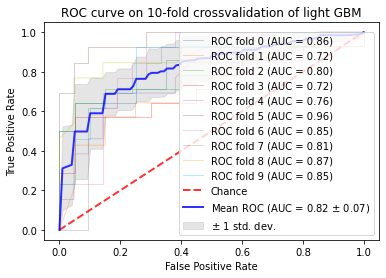

Out-of-fold accuracy: 0.7876106194690266
Out-of-fold F1 score: 0.7096774193548386
Test accuracy:        0.7764705882352941
Test F1 score:        0.6545454545454545


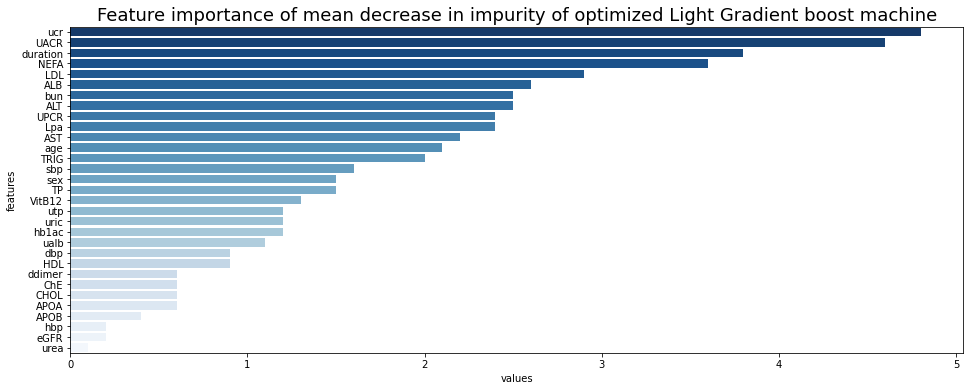

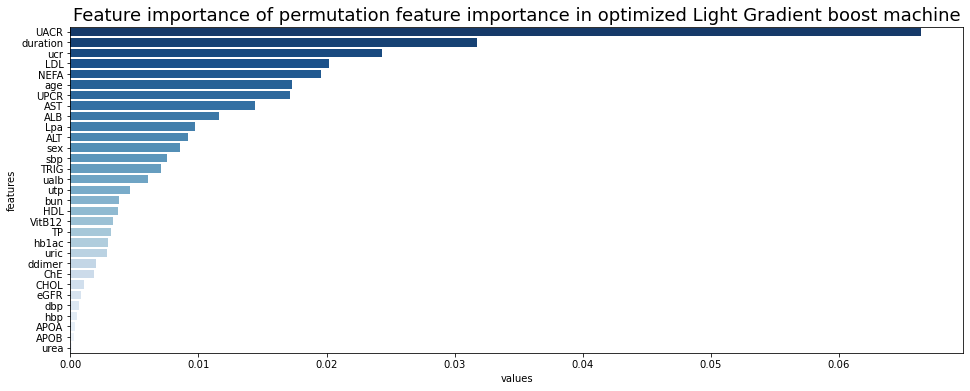

In [93]:
NFOLD = 10
skf = StratifiedKFold(n_splits=NFOLD)
models = []
imp = np.zeros((NFOLD, len(features)))
perimp = np.zeros((31))
oof = np.zeros((len(X_train), ))
y_preds = np.zeros((len(X_test), NFOLD))
#roc curve
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

for fold_id, (tr_idx, va_idx) in enumerate(skf.split(X_train, y_train)):
    # print(f"FOLD {fold_id+1}")
    X_tr, X_va = X_train[features].iloc[tr_idx], X_train[features].iloc[va_idx]
    y_tr, y_va = y_train.iloc[tr_idx], y_train.iloc[va_idx]
    
    
    clf = lgb.LGBMClassifier(random_state = 42,objective="binary",
                             metric="binary_logloss",
                            **study.best_params)
    clf.fit(X_tr, y_tr, eval_set = [(X_va, y_va)],
            early_stopping_rounds=10,
            verbose=-1)
    oof[va_idx] = clf.predict(X_va)
    models.append(clf)
    imp[fold_id] = clf.feature_importances_
    result = permutation_importance(clf, X_tr, y_tr,n_repeats=10,
                                
                                random_state=42, n_jobs=2)
    perimp += result.importances_mean
    # for roc curve
    viz = plot_roc_curve(clf, X_va, y_va,
                         name='ROC fold {}'.format(fold_id),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve on 10-fold crossvalidation of light GBM")
ax.legend(loc="lower right")
plt.show()
    
for fold_id, clf in enumerate(models):
    pred_ = clf.predict(X_test[features])
    y_preds[:, fold_id] = pred_
y_pred = np.rint(np.mean(y_preds, axis=1))

print(f"Out-of-fold accuracy: {accuracy_score(y_train, oof)}")
print(f"Out-of-fold F1 score: {f1_score(y_train, oof)}")
print(f"Test accuracy:        {accuracy_score(y_test, y_pred)}")
print(f"Test F1 score:        {f1_score(y_test, y_pred)}")

feature_imp = pd.DataFrame(sorted(zip(np.mean(imp, axis=0), features), reverse=True), columns=["values", "features"])


fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(x="values", y="features", data=feature_imp, palette="Blues_r")
plt.title("Feature importance of mean decrease in impurity of optimized Light Gradient boost machine", fontsize=18);

feature_perimp = pd.DataFrame(sorted(zip(perimp/10, features), reverse=True), columns=["values", "features"])
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(x="values", y="features", data=feature_perimp, palette="Blues_r")
plt.title("Feature importance of permutation feature importance in optimized Light Gradient boost machine", fontsize=18);

In [94]:
lGBM = models


In [95]:
feature_imp_lGBM = feature_imp

print(feature_perimp)
feature_imp_lGBM

      values  features
0   0.066374      UACR
1   0.031729  duration
2   0.024356       ucr
3   0.020187       LDL
4   0.019566      NEFA
5   0.017275       age
6   0.017112      UPCR
7   0.014420       AST
8   0.011636       ALB
9   0.009735       Lpa
10  0.009179       ALT
11  0.008525       sex
12  0.007541       sbp
13  0.007079      TRIG
14  0.006099      ualb
15  0.004621       utp
16  0.003802       bun
17  0.003704       HDL
18  0.003344    VitB12
19  0.003142        TP
20  0.002951     hb1ac
21  0.002854      uric
22  0.001968    ddimer
23  0.001836       ChE
24  0.001049      CHOL
25  0.000852      eGFR
26  0.000688       dbp
27  0.000524       hbp
28  0.000328      APOA
29  0.000263      APOB
30  0.000098      urea


,values,features
0,4.8,ucr
1,4.6,UACR
2,3.8,duration
3,3.6,NEFA
4,2.9,LDL
5,2.6,ALB
6,2.5,bun
7,2.5,ALT
8,2.4,UPCR
9,2.4,Lpa


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


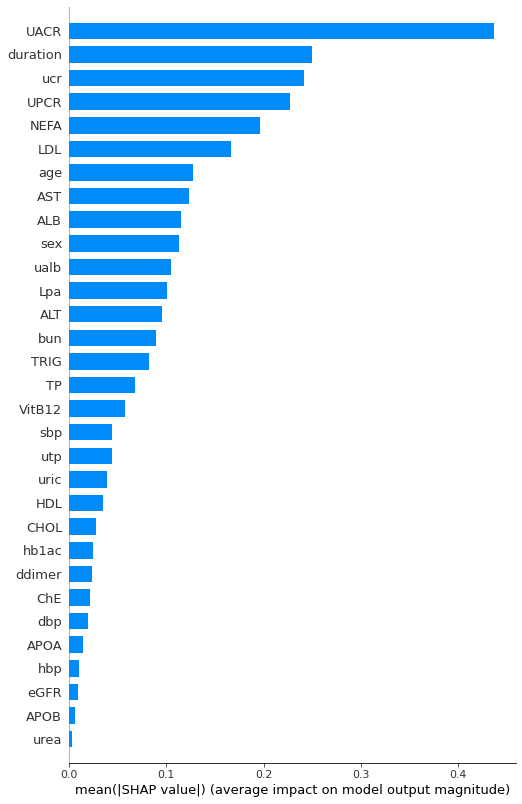

In [96]:
for i in range(10):
    if i == 0:
        explainer = shap.TreeExplainer(lGBM[0])
        shap_values0 = explainer.shap_values(X_train)
        shap_values = shap_values0[0]
    else:
        explainer = shap.TreeExplainer(lGBM[i])
        shap_values0 = explainer.shap_values(X_train)
        shap_values += shap_values0[0]
shap_values = shap_values / 10.0
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar',max_display=32)

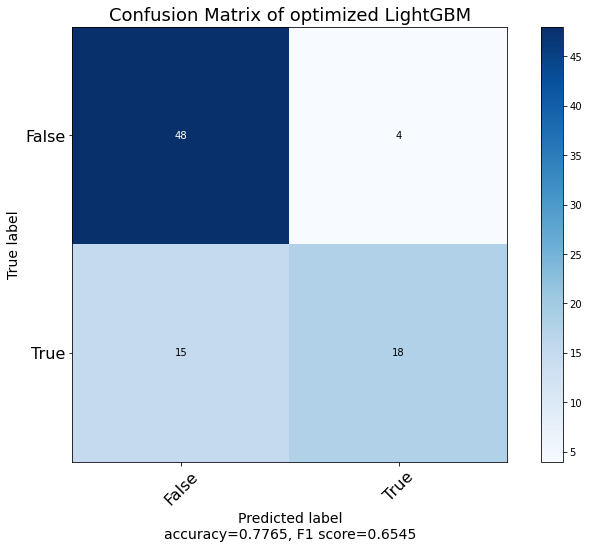

In [97]:
fig, ax = plot_confusion_matrix(confusion_matrix(y_test, y_pred), figsize=(12,8), hide_ticks=True, colorbar=True, class_names=["true", "false"])

plt.title("Confusion Matrix of optimized LightGBM", fontsize=18)
plt.ylabel("True label", fontsize=14)
plt.xlabel("Predicted label\naccuracy={:0.4f}, F1 score={:0.4f}".format(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)), fontsize=14)
plt.xticks(np.arange(2), [False, True], fontsize=16)
plt.yticks(np.arange(2), [False, True], fontsize=16);


# Logistic regression

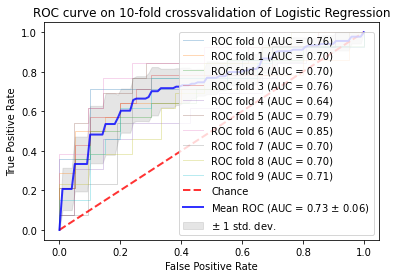

Out-of-fold accuracy: 0.7286135693215339
Out-of-fold F1 score: 0.6101694915254238
Test accuracy:        0.7411764705882353
Test F1 score:        0.6071428571428571


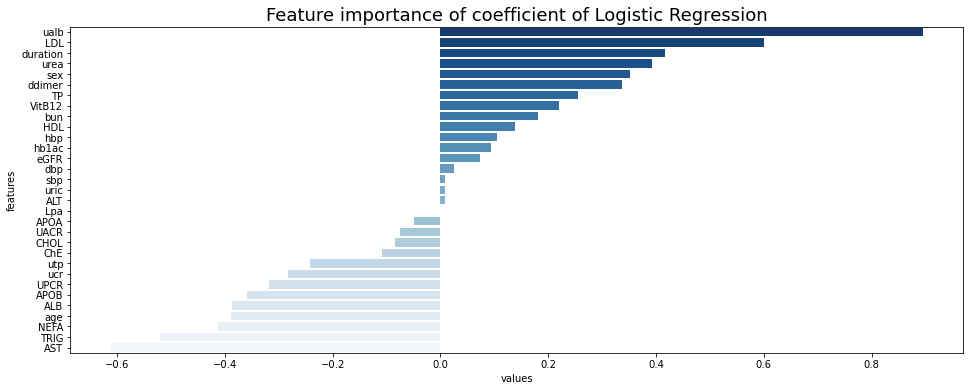

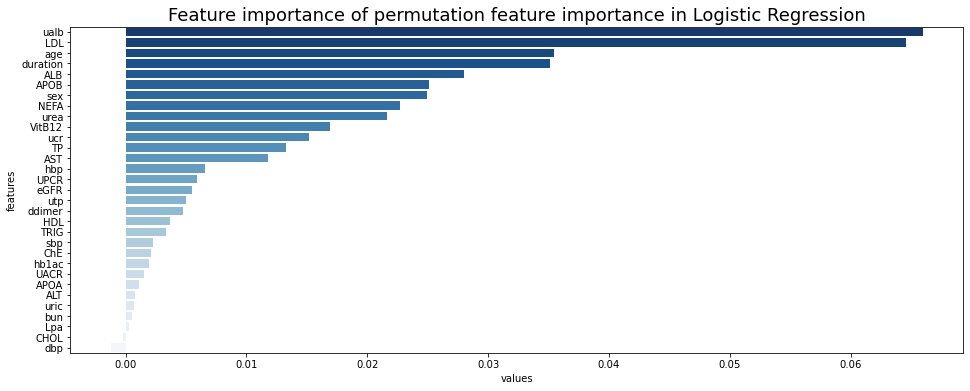

In [98]:

from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
NFOLD = 10
skf = StratifiedKFold(n_splits=NFOLD)
models = []
imp = np.zeros((NFOLD, len(features)))
perimp = np.zeros((31))
oof = np.zeros((len(X_train), ))
y_preds = np.zeros((len(X_test), NFOLD))
#roc curve
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

transfer = StandardScaler()
X_train = transfer.fit_transform(X_train)
X_test = transfer.transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
for i in range(32):
    X_train.rename(columns={i:df.columns[i]},inplace=True)
    X_test.rename(columns={i:df.columns[i]},inplace=True)

    
for fold_id, (tr_idx, va_idx) in enumerate(skf.split(X_train, y_train)):
    # print(f"FOLD {fold_id+1}")
    X_tr, X_va = X_train[features].iloc[tr_idx], X_train[features].iloc[va_idx]
    y_tr, y_va = y_train.iloc[tr_idx], y_train.iloc[va_idx]
    
    
    clf = LogisticRegression(random_state = 42)
    clf.fit(X_tr, y_tr)
    oof[va_idx] = clf.predict(X_va)
    models.append(clf)
    imp[fold_id] = clf.coef_
    
    result = permutation_importance(clf, X_tr, y_tr,n_repeats=10,
                                
                                random_state=42, n_jobs=2)
    perimp += result.importances_mean

    # for roc curve
    viz = plot_roc_curve(clf, X_va, y_va,
                         name='ROC fold {}'.format(fold_id),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve on 10-fold crossvalidation of Logistic Regression")
ax.legend(loc="lower right")
plt.show()
    
for fold_id, clf in enumerate(models):
    pred_ = clf.predict(X_test[features])
    y_preds[:, fold_id] = pred_
y_pred = np.rint(np.mean(y_preds, axis=1))

print(f"Out-of-fold accuracy: {accuracy_score(y_train, oof)}")
print(f"Out-of-fold F1 score: {f1_score(y_train, oof)}")
print(f"Test accuracy:        {accuracy_score(y_test, y_pred)}")
print(f"Test F1 score:        {f1_score(y_test, y_pred)}")

feature_imp = pd.DataFrame(sorted(zip(np.mean(imp, axis=0), features), reverse=True), columns=["values", "features"])


fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(x="values", y="features", data=feature_imp, palette="Blues_r")
plt.title("Feature importance of coefficient of Logistic Regression", fontsize=18);

feature_perimp = pd.DataFrame(sorted(zip(perimp/10, features), reverse=True), columns=["values", "features"])
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(x="values", y="features", data=feature_perimp, palette="Blues_r")
plt.title("Feature importance of permutation feature importance in Logistic Regression", fontsize=18);

In [99]:

def objective(trial):
    skf = StratifiedKFold(n_splits=NFOLD)
    models = []
    imp = np.zeros((NFOLD, len(features)))
    oof = np.zeros((len(X_train), ))
    y_preds = np.zeros((len(X_test), NFOLD))

    for fold_id, (tr_idx, va_idx) in enumerate(skf.split(X_train, y_train)):
        # print(f"FOLD {fold_id+1}")
        X_tr, X_va = X_train[features].iloc[tr_idx], X_train[features].iloc[va_idx]
        y_tr, y_va = y_train.iloc[tr_idx], y_train.iloc[va_idx]

        clf = LogisticRegression(random_state=0,
                                 C = trial.suggest_uniform("C", 0.1, 10.0),
                                 intercept_scaling = trial.suggest_uniform("intercept_scaling", 0.1, 2.0),
                                 max_iter = trial.suggest_int("max_iter", 100, 1000)
                                 )
        clf.fit(X_tr, y_tr)
        oof[va_idx] = clf.predict(X_va)
        
    score = accuracy_score(y_train, oof)
    return score

study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=400)


[I 2021-04-14 02:54:33,243] A new study created in memory with name: no-name-6d8ffd77-9294-4346-9196-487a9089f144
[I 2021-04-14 02:54:33,504] Trial 0 finished with value: 0.7286135693215339 and parameters: {'C': 5.533253688880515, 'intercept_scaling': 1.458859796107597, 'max_iter': 935}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:54:33,761] Trial 1 finished with value: 0.7256637168141593 and parameters: {'C': 8.593661614465292, 'intercept_scaling': 1.7097783036898382, 'max_iter': 823}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:54:34,100] Trial 2 finished with value: 0.7256637168141593 and parameters: {'C': 6.494351719359895, 'intercept_scaling': 0.9314157013991157, 'max_iter': 170}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:54:34,264] Trial 3 finished with value: 0.7286135693215339 and parameters: {'C': 0.6614584754426874, 'intercept_scaling': 0.618046959702215, 'max_iter': 805}. Best is trial 0 with value: 0.728613569

[I 2021-04-14 02:54:43,667] Trial 34 finished with value: 0.7256637168141593 and parameters: {'C': 4.673403331459122, 'intercept_scaling': 1.7673858707521182, 'max_iter': 932}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:54:44,052] Trial 35 finished with value: 0.7256637168141593 and parameters: {'C': 3.509384851175218, 'intercept_scaling': 1.2126061586866224, 'max_iter': 305}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:54:44,313] Trial 36 finished with value: 0.7256637168141593 and parameters: {'C': 7.079661555377576, 'intercept_scaling': 0.9996983455647848, 'max_iter': 496}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:54:44,532] Trial 37 finished with value: 0.7256637168141593 and parameters: {'C': 5.019486245771352, 'intercept_scaling': 1.1442808160115865, 'max_iter': 581}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:54:44,736] Trial 38 finished with value: 0.7079646017699115 and parameters: {'C': 0

[I 2021-04-14 02:54:54,080] Trial 69 finished with value: 0.7256637168141593 and parameters: {'C': 5.116914659143195, 'intercept_scaling': 1.5198265707003953, 'max_iter': 128}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:54:54,385] Trial 70 finished with value: 0.7286135693215339 and parameters: {'C': 5.557925520985058, 'intercept_scaling': 1.2793699931880402, 'max_iter': 129}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:54:54,689] Trial 71 finished with value: 0.7286135693215339 and parameters: {'C': 5.756835905953643, 'intercept_scaling': 1.4422133358925848, 'max_iter': 229}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:54:55,020] Trial 72 finished with value: 0.7256637168141593 and parameters: {'C': 4.942869684213882, 'intercept_scaling': 1.245384109811463, 'max_iter': 225}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:54:55,403] Trial 73 finished with value: 0.7286135693215339 and parameters: {'C': 5.

[I 2021-04-14 02:55:04,118] Trial 104 finished with value: 0.7286135693215339 and parameters: {'C': 5.453287656489948, 'intercept_scaling': 1.0629778595281278, 'max_iter': 379}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:04,394] Trial 105 finished with value: 0.7256637168141593 and parameters: {'C': 7.215953507737145, 'intercept_scaling': 1.2442388464783716, 'max_iter': 598}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:04,647] Trial 106 finished with value: 0.7286135693215339 and parameters: {'C': 5.565741939354673, 'intercept_scaling': 1.0937186592605859, 'max_iter': 648}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:04,871] Trial 107 finished with value: 0.7286135693215339 and parameters: {'C': 5.797829999522993, 'intercept_scaling': 1.1472457325526844, 'max_iter': 338}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:05,118] Trial 108 finished with value: 0.7256637168141593 and parameters: {'

[I 2021-04-14 02:55:13,595] Trial 139 finished with value: 0.7256637168141593 and parameters: {'C': 5.132916979789976, 'intercept_scaling': 0.1381970869197312, 'max_iter': 272}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:13,865] Trial 140 finished with value: 0.7256637168141593 and parameters: {'C': 6.639277834908198, 'intercept_scaling': 1.1831234684717509, 'max_iter': 378}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:14,187] Trial 141 finished with value: 0.7286135693215339 and parameters: {'C': 5.888378325829681, 'intercept_scaling': 1.7378168590816476, 'max_iter': 288}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:14,427] Trial 142 finished with value: 0.7286135693215339 and parameters: {'C': 5.885955320777734, 'intercept_scaling': 1.5463666595877759, 'max_iter': 348}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:14,723] Trial 143 finished with value: 0.7256637168141593 and parameters: {'

[I 2021-04-14 02:55:23,831] Trial 174 finished with value: 0.7286135693215339 and parameters: {'C': 5.574277583956377, 'intercept_scaling': 1.4020623979935454, 'max_iter': 615}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:24,385] Trial 175 finished with value: 0.7286135693215339 and parameters: {'C': 6.063645113386323, 'intercept_scaling': 1.4516365077103932, 'max_iter': 635}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:24,615] Trial 176 finished with value: 0.7286135693215339 and parameters: {'C': 6.145513684323271, 'intercept_scaling': 1.07031667654378, 'max_iter': 690}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:24,897] Trial 177 finished with value: 0.7286135693215339 and parameters: {'C': 5.724153115631206, 'intercept_scaling': 1.1516073202634272, 'max_iter': 557}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:25,123] Trial 178 finished with value: 0.7286135693215339 and parameters: {'C'

[I 2021-04-14 02:55:34,815] Trial 209 finished with value: 0.7286135693215339 and parameters: {'C': 5.715093186648941, 'intercept_scaling': 0.29931824686575037, 'max_iter': 437}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:35,080] Trial 210 finished with value: 0.7256637168141593 and parameters: {'C': 5.186328741310335, 'intercept_scaling': 0.1997798347138966, 'max_iter': 957}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:35,319] Trial 211 finished with value: 0.7256637168141593 and parameters: {'C': 4.919007803725859, 'intercept_scaling': 1.2758380373678688, 'max_iter': 402}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:35,552] Trial 212 finished with value: 0.7256637168141593 and parameters: {'C': 5.1989351915017155, 'intercept_scaling': 0.6271058804150931, 'max_iter': 309}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:35,796] Trial 213 finished with value: 0.7286135693215339 and parameters: 

[I 2021-04-14 02:55:44,421] Trial 244 finished with value: 0.7286135693215339 and parameters: {'C': 5.995944989208171, 'intercept_scaling': 0.9592582613939897, 'max_iter': 608}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:44,944] Trial 245 finished with value: 0.7256637168141593 and parameters: {'C': 6.4594469022319405, 'intercept_scaling': 1.101868824363717, 'max_iter': 650}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:45,552] Trial 246 finished with value: 0.7286135693215339 and parameters: {'C': 6.198667278335749, 'intercept_scaling': 1.2118900325439432, 'max_iter': 633}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:45,825] Trial 247 finished with value: 0.7286135693215339 and parameters: {'C': 5.777000583823483, 'intercept_scaling': 0.404706919321446, 'max_iter': 528}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:46,174] Trial 248 finished with value: 0.7286135693215339 and parameters: {'C

[I 2021-04-14 02:55:54,832] Trial 279 finished with value: 0.7286135693215339 and parameters: {'C': 5.7588222397855136, 'intercept_scaling': 1.8135469452017718, 'max_iter': 218}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:55,223] Trial 280 finished with value: 0.7286135693215339 and parameters: {'C': 5.327150350789209, 'intercept_scaling': 1.8441121521950328, 'max_iter': 621}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:55,504] Trial 281 finished with value: 0.7256637168141593 and parameters: {'C': 5.000775065153369, 'intercept_scaling': 1.5110343025675645, 'max_iter': 260}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:55,755] Trial 282 finished with value: 0.7286135693215339 and parameters: {'C': 5.4004360971155325, 'intercept_scaling': 0.41095110258432865, 'max_iter': 151}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:55:56,384] Trial 283 finished with value: 0.7286135693215339 and parameters:

[I 2021-04-14 02:56:06,955] Trial 314 finished with value: 0.7286135693215339 and parameters: {'C': 5.823976037846942, 'intercept_scaling': 0.33755479006970357, 'max_iter': 971}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:56:07,215] Trial 315 finished with value: 0.7286135693215339 and parameters: {'C': 5.6651866196200755, 'intercept_scaling': 0.2681100363093241, 'max_iter': 437}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:56:07,475] Trial 316 finished with value: 0.7286135693215339 and parameters: {'C': 5.746453013376231, 'intercept_scaling': 0.30597914728374903, 'max_iter': 472}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:56:07,737] Trial 317 finished with value: 0.7286135693215339 and parameters: {'C': 5.801952782160024, 'intercept_scaling': 0.3696847878665296, 'max_iter': 132}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:56:08,017] Trial 318 finished with value: 0.7286135693215339 and parameters:

[I 2021-04-14 02:56:17,927] Trial 349 finished with value: 0.7286135693215339 and parameters: {'C': 6.093449225089759, 'intercept_scaling': 1.1267941470389098, 'max_iter': 370}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:56:18,193] Trial 350 finished with value: 0.7286135693215339 and parameters: {'C': 5.994740551083697, 'intercept_scaling': 1.1155597333544873, 'max_iter': 406}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:56:18,447] Trial 351 finished with value: 0.7286135693215339 and parameters: {'C': 6.02412698463942, 'intercept_scaling': 1.1629168338686457, 'max_iter': 369}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:56:18,710] Trial 352 finished with value: 0.7256637168141593 and parameters: {'C': 6.376930613500512, 'intercept_scaling': 0.950406648922664, 'max_iter': 391}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:56:18,950] Trial 353 finished with value: 0.7256637168141593 and parameters: {'C'

[I 2021-04-14 02:56:27,311] Trial 384 finished with value: 0.7286135693215339 and parameters: {'C': 6.0976264404849605, 'intercept_scaling': 1.948467108161082, 'max_iter': 671}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:56:27,552] Trial 385 finished with value: 0.7256637168141593 and parameters: {'C': 6.499548957958213, 'intercept_scaling': 1.0838441792474252, 'max_iter': 704}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:56:27,802] Trial 386 finished with value: 0.7286135693215339 and parameters: {'C': 6.254216349308454, 'intercept_scaling': 1.1309179560181633, 'max_iter': 683}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:56:28,174] Trial 387 finished with value: 0.7286135693215339 and parameters: {'C': 5.768326973001593, 'intercept_scaling': 1.3110548871335472, 'max_iter': 675}. Best is trial 0 with value: 0.7286135693215339.
[I 2021-04-14 02:56:28,540] Trial 388 finished with value: 0.7286135693215339 and parameters: {'

In [100]:
study.best_params

{'C': 5.533253688880515,
 'intercept_scaling': 1.458859796107597,
 'max_iter': 935}

In [101]:
optuna.importance.get_param_importances(study)

OrderedDict([('C', 0.9932460916173587),
             ('max_iter', 0.004061611177001108),
             ('intercept_scaling', 0.002692297205640222)])

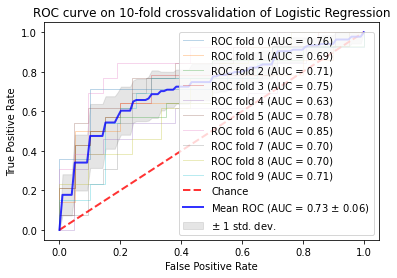

Out-of-fold accuracy: 0.7286135693215339
Out-of-fold F1 score: 0.6068376068376068
Test accuracy:        0.7411764705882353
Test F1 score:        0.6071428571428571


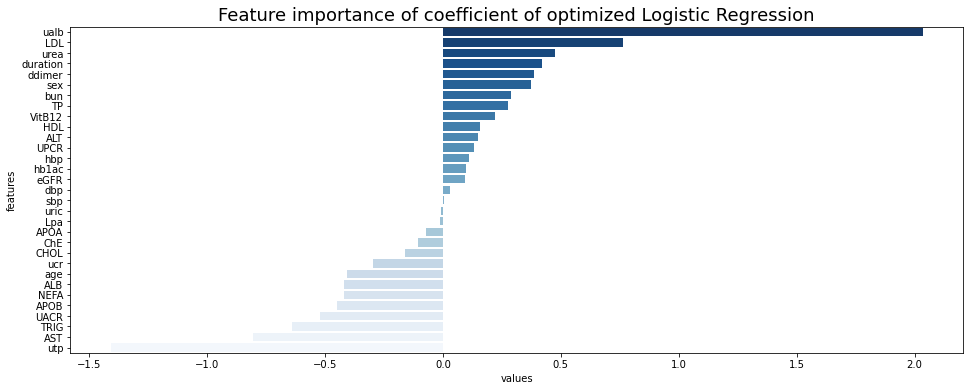

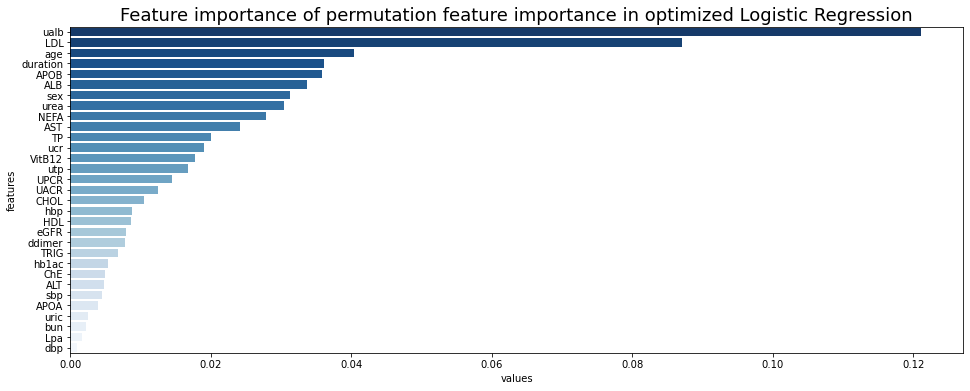

In [102]:
NFOLD = 10
skf = StratifiedKFold(n_splits=NFOLD)
models = []
imp = np.zeros((NFOLD, len(features)))
perimp = np.zeros((31))
oof = np.zeros((len(X_train), ))
y_preds = np.zeros((len(X_test), NFOLD))
#roc curve
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

transfer = StandardScaler()
X_train = transfer.fit_transform(X_train)
X_test = transfer.transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
for i in range(32):
    X_train.rename(columns={i:df.columns[i]},inplace=True)
    X_test.rename(columns={i:df.columns[i]},inplace=True)

    
for fold_id, (tr_idx, va_idx) in enumerate(skf.split(X_train, y_train)):
    # print(f"FOLD {fold_id+1}")
    X_tr, X_va = X_train[features].iloc[tr_idx], X_train[features].iloc[va_idx]
    y_tr, y_va = y_train.iloc[tr_idx], y_train.iloc[va_idx]
    
    
    clf = LogisticRegression(random_state=0,
                             **study.best_params)
    clf.fit(X_tr, y_tr)
    oof[va_idx] = clf.predict(X_va)
    models.append(clf)
    imp[fold_id] = clf.coef_
    
    result = permutation_importance(clf, X_tr, y_tr,n_repeats=10,
                                
                                random_state=42, n_jobs=2)
    perimp += result.importances_mean

    # for roc curve
    viz = plot_roc_curve(clf, X_va, y_va,
                         name='ROC fold {}'.format(fold_id),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC curve on 10-fold crossvalidation of Logistic Regression")
ax.legend(loc="lower right")
plt.show()
    
for fold_id, clf in enumerate(models):
    pred_ = clf.predict(X_test[features])
    y_preds[:, fold_id] = pred_
y_pred = np.rint(np.mean(y_preds, axis=1))

print(f"Out-of-fold accuracy: {accuracy_score(y_train, oof)}")
print(f"Out-of-fold F1 score: {f1_score(y_train, oof)}")
print(f"Test accuracy:        {accuracy_score(y_test, y_pred)}")
print(f"Test F1 score:        {f1_score(y_test, y_pred)}")

feature_imp = pd.DataFrame(sorted(zip(np.mean(imp, axis=0), features), reverse=True), columns=["values", "features"])


fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(x="values", y="features", data=feature_imp, palette="Blues_r")
plt.title("Feature importance of coefficient of optimized Logistic Regression", fontsize=18);

feature_perimp = pd.DataFrame(sorted(zip(perimp/10, features), reverse=True), columns=["values", "features"])
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(x="values", y="features", data=feature_perimp, palette="Blues_r")
plt.title("Feature importance of permutation feature importance in optimized Logistic Regression", fontsize=18);

feature_perimp = pd.DataFrame(sorted(zip(perimp/10, features), reverse=True), columns=["values", "features"])
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(x="values", y="features", data=feature_perimp, palette="Blues_r")
plt.title("Feature importance of permutation feature importance in LogisticRegression", fontsize=18);
perimp/10

In [405]:
print(feature_perimp)
feature_imp


      values  features
0   0.089448      ualb
1   0.046604      CHOL
2   0.033032       ALB
3   0.031854      NEFA
4   0.031750       LDL
5   0.030671       sex
6   0.025987       age
7   0.017465    VitB12
8   0.015467  duration
9   0.014021       AST
10  0.012880      urea
11  0.012219      APOB
12  0.009306      uric
13  0.006978    ddimer
14  0.006522       ucr
15  0.005901      eGFR
16  0.005015       utp
17  0.003668        TP
18  0.003145      TRIG
19  0.002815     hb1ac
20  0.002623       HDL
21  0.002326      UPCR
22  0.002262       ALT
23  0.002230       Lpa
24  0.000096      UACR
25 -0.000296       sbp
26 -0.000527       bun
27 -0.000591       hbp
28 -0.000984       ChE
29 -0.001902      APOA
30 -0.002295       dbp


,values,features
0,1.340197,ualb
1,0.577467,ddimer
2,0.524434,CHOL
3,0.441536,sex
4,0.381545,urea
5,0.348916,duration
6,0.317705,VitB12
7,0.214541,TP
8,0.204837,uric
9,0.148345,APOB


In [407]:
Logs = models
Logs

[LogisticRegression(C=2.3359639054500443, intercept_scaling=0.7469146183431316,
                    max_iter=419, random_state=0),
 LogisticRegression(C=2.3359639054500443, intercept_scaling=0.7469146183431316,
                    max_iter=419, random_state=0),
 LogisticRegression(C=2.3359639054500443, intercept_scaling=0.7469146183431316,
                    max_iter=419, random_state=0),
 LogisticRegression(C=2.3359639054500443, intercept_scaling=0.7469146183431316,
                    max_iter=419, random_state=0),
 LogisticRegression(C=2.3359639054500443, intercept_scaling=0.7469146183431316,
                    max_iter=419, random_state=0),
 LogisticRegression(C=2.3359639054500443, intercept_scaling=0.7469146183431316,
                    max_iter=419, random_state=0),
 LogisticRegression(C=2.3359639054500443, intercept_scaling=0.7469146183431316,
                    max_iter=419, random_state=0),
 LogisticRegression(C=2.3359639054500443, intercept_scaling=0.7469146183431316,
   

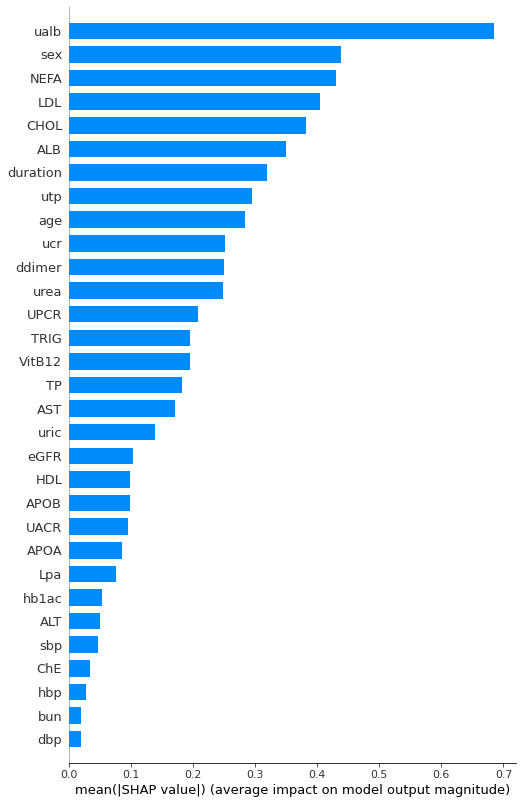

In [409]:
for i in range(10):
    if i == 0:
        explainer = shap.LinearExplainer(Logs[1], X_train, feature_perturbation="interventional")
        shap_values0 = explainer.shap_values(X_test)
        
        shap_values = shap_values0
    else:
        explainer = shap.LinearExplainer(Logs[i], X_train, feature_perturbation="interventional")
        shap_values0 = explainer.shap_values(X_test)
        
        shap_values += shap_values0
shap_values = shap_values / 10.0
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar',max_display=32)

In [410]:
shap_values

array([[-0.45187439,  0.14855696, -0.38103705, ...,  0.06045173,
         0.12318022, -0.06254383],
       [ 0.41711482,  0.25299068, -0.09913541, ...,  0.06235568,
         0.11837629,  0.09416002],
       [ 0.41711482, -0.13863576,  0.04181541, ..., -0.84595552,
        -1.38012239, -0.07407316],
       ...,
       [ 0.41711482, -0.11252733,  0.13578262, ...,  0.0622831 ,
         0.12197581, -0.00471526],
       [ 0.41711482,  0.54018341, -0.33405344, ...,  0.06073608,
         0.11062286,  0.13828315],
       [-0.45187439,  0.33131597, -0.38103705, ...,  0.05819951,
         0.11682505,  0.09223713]])

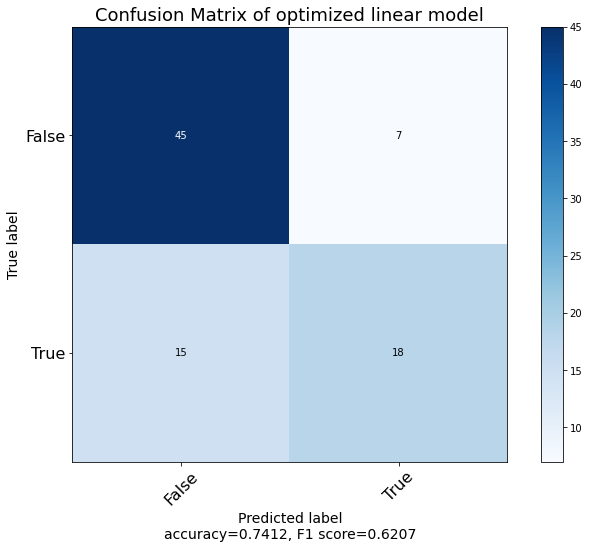

In [413]:
fig, ax = plot_confusion_matrix(confusion_matrix(y_test, y_pred), figsize=(12,8), hide_ticks=True, colorbar=True, class_names=["true", "false"])

plt.title("Confusion Matrix of optimized linear model", fontsize=18)
plt.ylabel("True label", fontsize=14)
plt.xlabel("Predicted label\naccuracy={:0.4f}, F1 score={:0.4f}".format(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)), fontsize=14)
plt.xticks(np.arange(2), [False, True], fontsize=16)
plt.yticks(np.arange(2), [False, True], fontsize=16);